## **Project Title : Cardiovascular Risk Prediction**

**Project Type - Supervised Machine Learning Classification**

**Contribution - Individual**

## **GitHub Link -**

## **Project Summary**



The Cardiovascular Risk Prediction project aims to develop a robust and accurate machine learning model to classify patients into two different cardiovascular risk categories based on their health and lifestyle attributes. Cardiovascular diseases (CVDs) remain a leading cause of mortality worldwide, making early risk assessment and intervention crucial for reducing their impact on public health.

**Objective:**
*   The primary objective of this project is to create a predictive model that can accurately categorize patients into one of the following cardiovascular risk groups:
1.  1 - Patient has 10-year risk of coronary heart disease.
2.  0-  Patient doesn't have 10-year risk of coronary heart disease.
*   This classification will be based on a diverse set of input features, including demographic data, medical history, lifestyle choices, and clinical measurements.

**Methodology:**

**Data Collection:** A comprehensive dataset containing information on a diverse group of individuals will be collected. This dataset will include variables such as age, gender, blood pressure, cholesterol levels, smoking status, family history of CVD, and more.

**EDA:**
*   The insights gained during EDA will inform subsequent steps in the project, including feature selection, data preprocessing, and model development. EDA is crucial for selecting the most relevant features, understanding the data's underlying patterns, and ensuring the machine learning model's robustness and accuracy.
*   Moreover, EDA findings can be used to create informative visualizations and reports that convey the dataset's characteristics and provide healthcare professionals and stakeholders with a better understanding of the data, which can be useful for decision-making and model interpretation.

**Data Preprocessing:** Data preprocessing will involve cleaning and transforming the dataset, handling missing values, encoding categorical variables, and scaling numerical features. Special attention will be given to ensure data privacy and compliance with ethical standards.

**Feature Selection:** Feature selection techniques will be applied to identify the most relevant features for predicting cardiovascular risk. This step will help reduce model complexity and improve interpretability.

**Model Selection:** Below supervised machine learning classification algorithms will be evaluated.We will use total 10 algorithms.

1.   Logistic regression
2.   Decision Tree
3.   KNeighbors Classifier
4.   Random Forest Classifier
5.   Support vector Machine
6.   Naive-Bayes
7.   Voting Classifier
8.   AdaBoost Classifier
9.   GredientBoosting classifier
10.  XGB Classifier




**Model Evaluation:** The performance of the selected model(s) will be assessed using appropriate evaluation metrics such as accuracy, precision, recall, F1-score, and area under the receiver operating characteristic curve (AUC-ROC).

**Cross-validation & Hyper Parameter Tuning:** Hyperparameter tuning and cross-validation will be used to optimize model performance.

**Interpretability:** Interpretability techniques, such as feature importance analysis and SHAP (SHapley Additive exPlanations) values, will be applied to make the model's predictions more transparent and explainable to healthcare professionals and patients.

**Expected Outcomes**:

A highly accurate machine learning model for cardiovascular risk classification.
Insights into the most influential factors contributing to cardiovascular risk.
A user-friendly interface for healthcare practitioners to input patient data and receive risk assessments.
Recommendations for personalized interventions to mitigate cardiovascular risk for individuals.
Impact:
This project has the potential to significantly impact public health by providing a tool that can assist healthcare professionals in identifying individuals at higher risk of cardiovascular diseases earlier. Early intervention and lifestyle changes can help reduce the burden of cardiovascular diseases on both individuals and healthcare systems.

**Ethical Considerations:**
Data privacy and ethical concerns related to healthcare data will be a top priority throughout the project. All data handling and model development will strictly adhere to legal and ethical standards, ensuring the confidentiality and security of patient information.

By leveraging the power of machine learning, this project aims to enhance cardiovascular risk assessment, ultimately contributing to better preventive care and improved health outcomes for individuals at risk of heart diseases.

## **Problem Statement**
Cardiovascular diseases (CVDs) continue to pose a significant global health challenge, and the need for effective risk assessment and prevention has become even more critical in the current healthcare landscape. With the advent of advanced data collection technologies and an increased focus on personalized medicine, there is an opportunity to enhance cardiovascular risk prediction using supervised machine learning classification.

## **Knowing Our Data**

In [1]:
#importing some important libraries to visualiz,preprocessing,and modeling our data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.impute import KNNImputer
import scipy.stats as stats
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix,roc_curve,auc,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [2]:
#copying path of csv file and storing it into path variable.
path = '/content/drive/MyDrive/CSV files/dat-20230302T130046Z-001/other_csv/data_cardiovascular_risk.csv'

In [3]:
#making dataframe of csv file
df = pd.read_csv(path)

In [4]:
#checking our dataframe
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [5]:
#checking how many rows and columns are in our dataset
df.shape

(3390, 17)

In [6]:
#checking columns
df.columns


Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

### **Variable Description**

**Demographic:**

*   **Sex :** male or female ("M" or "F")
*   **Age :** Age of the patient (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Education: The level of education of the patient (categorical values - 1,2,3,4)

**Behavioral:**

*   **is_smoking :** whether or not the patient is a current smoker ("YES" or "NO")
*   **Cigs Per Day :** the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical (history):**

*   **BP Meds :** whether or not the patient was on blood pressure medication (Nominal)
*   **Prevalent Stroke :** whether or not the patient had previously had a stroke (Nominal)
*   **Prevalent Hyp :** whether or not the patient was hypertensive (Nominal)
*   **Diabetes :** whether or not the patient had diabetes (Nominal)

**Medical (current):**

*   **Tot Chol :** total cholesterol level (Continuous)
*   **Sys BP :** systolic blood pressure (Continuous)
*   **Dia BP :** diastolic blood pressure (Continuous)
*   **BMI :** Body Mass Index (Continuous)
*   **Heart Rate :** heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
*   **Glucose :** glucose level (Continuous)

**Predict variable (desired target):**

10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)

### **Blood Pressure**

*   **A blood pressure reading considered normal for most healthy adults is usually below 120/80, which is reported as “120 over 80.”  The systolic pressure is 120 and the diastolic pressure is 80. Children and teens may have slightly lower normal blood pressure. Older adults may also have higher or lower blood pressures that are considered normal.**

*   **Systolic blood pressure is the top number and refers to the amount of pressure experienced by the arteries while the heart is beating.**

*   **Systolic blood pressure is considered normal when the reading is below 120 mmHg (millimeters of mercury) while a person is sitting quietly at rest.**

*   **Since your blood pressure can go up when you're active, it's important to take your blood pressure during periods of quiet rest to accurately diagnose high blood pressure (hypertension)**

*   **Systolic pressure can also be too low. When the reading is below 90 mmHg, it's called hypotension.**

*   **Diastolic blood pressure is the bottom number and refers to the amount of pressure in the arteries while the heart is resting in between heartbeats.**

*   **Normal diastolic blood pressure during quiet rest is below 80 mmHg.3 If you have high blood pressure, the diastolic number is often higher even during quiet rest. Diastolic blood pressure is considered dangerously low when it is 60 mmHg or lower and dangerously high when it is 110 mmHg or over. If you receive multiple readings with these numbers, you should call your healthcare provider.**



### **Cholesterol**

*   **Cholesterol is a waxy substance that is found in all of our cells. This substance has several useful functions including helping build our body's cells. Cholesterol comes from two sources: your liver and the foods you consume. Cholesterol travels throughout your body in your blood.**

### **High-density lipoprotein cholesterol, or HDL**
*   **HDL cholesterol is often referred to as "good" cholesterol. HDL picks up excess cholesterol in your blood and takes it back to your liver, where it is broken down and removed from your body.**

### **Low-density lipoprotein cholesterol, or LDL**
*   **LDL is the type of cholesterol that can eventually build up within the walls of your arteries, leading to a heart attack or stroke. This is why LDL is often referred to as "bad" cholesterol.**

In [7]:
#checking our dataset's information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [8]:
#checking null values of our dataset
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<Axes: >

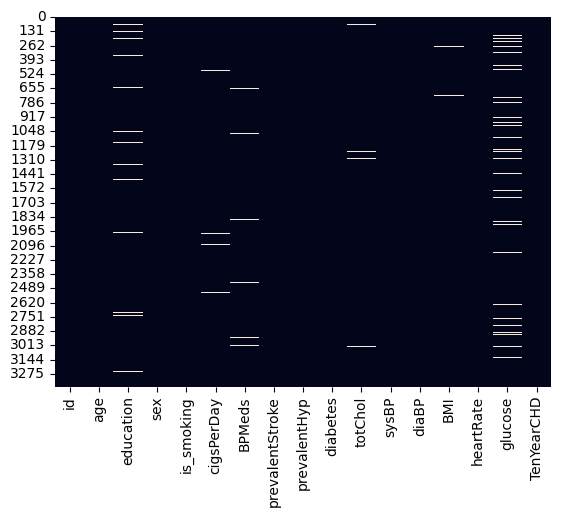

In [9]:
#heatmap for checking null values
sns.heatmap(df.isnull(),cbar=False)

### **Observation**
*   **Our dataset has 3390 rows and 17 columns.**
*   **There are four types of variables in our dataset.Demographic,Behavioral,Medical (history),Medical (current).**
*   **The classification goal is to predict whether the patient has a 10-year risk of coronary heart disease CHD.**
*   **We have 87 null values in education,22 null values in cigsPerDay,44 null values in BPMeds,38 null values in totchol,14 null values in BMI and 304 null values in glucose.**
*  **Here id is similar to index.Therefor we will remove id column.**         


In [10]:
#making a copy file of our dataset
data = df.copy()

In [11]:
#removing id column
data.drop(columns='id',inplace=True)

In [12]:
#new dataframe after dropping id column
data.head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   64        2.0   F        YES         3.0     0.0                0   
1   36        4.0   M         NO         0.0     0.0                0   
2   46        1.0   F        YES        10.0     0.0                0   
3   50        1.0   M        YES        20.0     0.0                0   
4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [13]:
# Check Unique Values for each variable using a for loop
for i in data.columns.tolist():
  print("No. of unique values in",i,"is",data[i].nunique())

No. of unique values in age is 39
No. of unique values in education is 4
No. of unique values in sex is 2
No. of unique values in is_smoking is 2
No. of unique values in cigsPerDay is 32
No. of unique values in BPMeds is 2
No. of unique values in prevalentStroke is 2
No. of unique values in prevalentHyp is 2
No. of unique values in diabetes is 2
No. of unique values in totChol is 240
No. of unique values in sysBP is 226
No. of unique values in diaBP is 142
No. of unique values in BMI is 1259
No. of unique values in heartRate is 68
No. of unique values in glucose is 132
No. of unique values in TenYearCHD is 2


In [14]:
#checking value_count of #checking value_count of is_smoking
data['education'].value_counts()

1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

In [15]:
#checking value_count of is_smoking
data['is_smoking'].value_counts()

NO     1703
YES    1687
Name: is_smoking, dtype: int64

In [16]:
#checking value_count of prevalentStroke
data['prevalentStroke'].value_counts()

0    3368
1      22
Name: prevalentStroke, dtype: int64

In [17]:
#checking value_count of prevalentHyp
data['prevalentHyp'].value_counts()

0    2321
1    1069
Name: prevalentHyp, dtype: int64

In [18]:
#checking value_count of TenYearCHD
data['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

### **Data Wrangling**

In [19]:
#creating copy of data before any data wrangling
data_2 = data.copy()

In [20]:
# Renaming the columns
data_2.rename(columns={'cigsPerDay':'cigs_per_day','BPMeds':'bp_meds',
                   'prevalentStroke':'prevalent_stroke','prevalentHyp':'prevalent_hyp',
                   'totChol':'total_cholesterol','sysBP':'systolic_bp','diaBP':'diastolic_bp',
                   'BMI':'bmi','heartRate':'heart_rate','TenYearCHD':'ten_year_CHD'},
          inplace = True)

In [21]:
data_2.select_dtypes(include='object').columns

Index(['sex', 'is_smoking'], dtype='object')

*   **We have removed ID column.**
*   **We have renamed our columns.**
*   **Our data is ready for exploration.**

## **EDA - Exploratory Data Analysis**

## **Univariate Analysis**

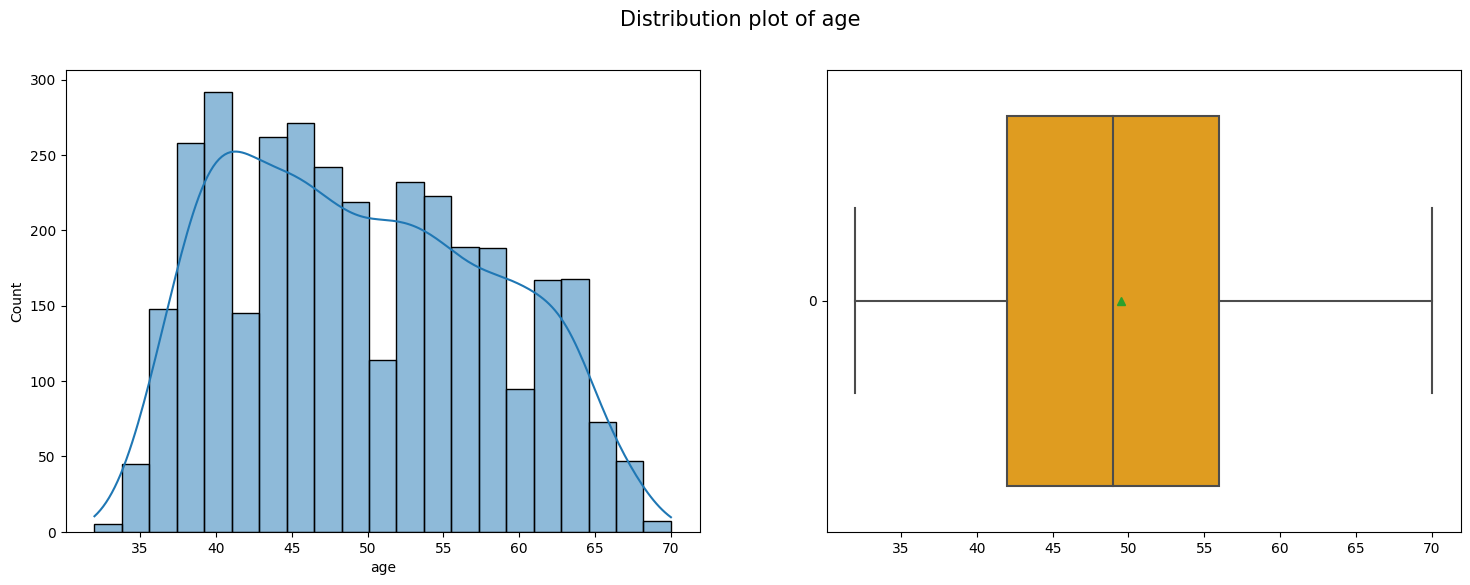

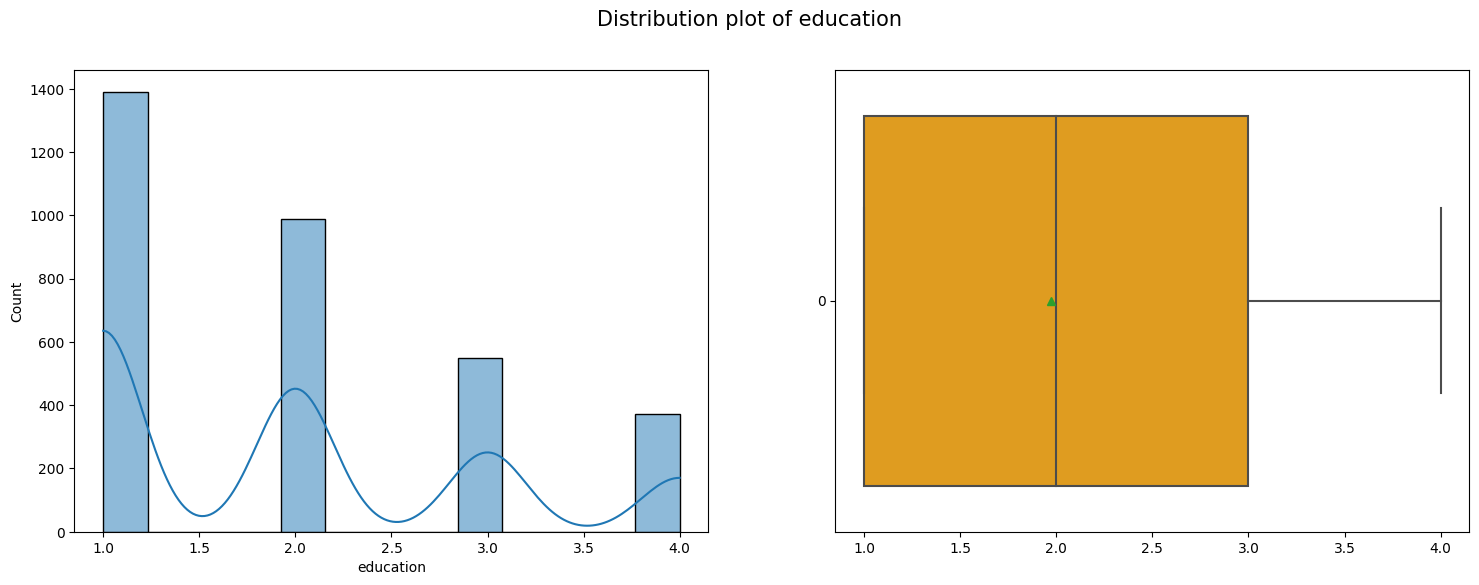

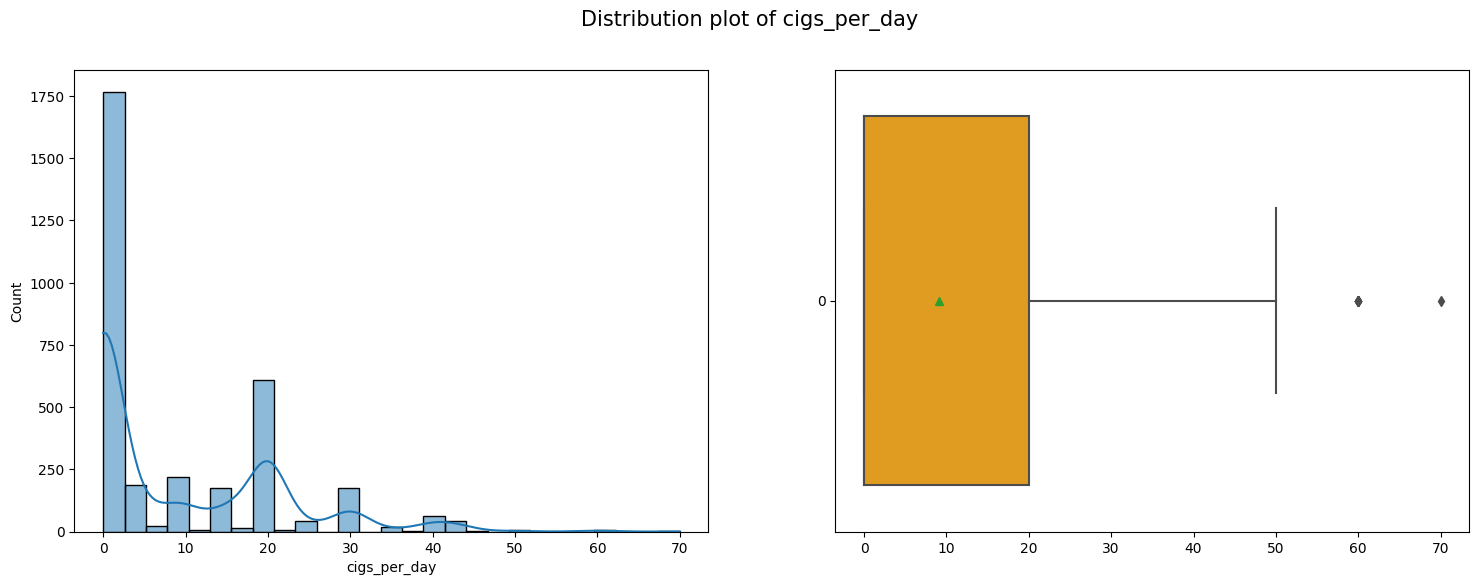

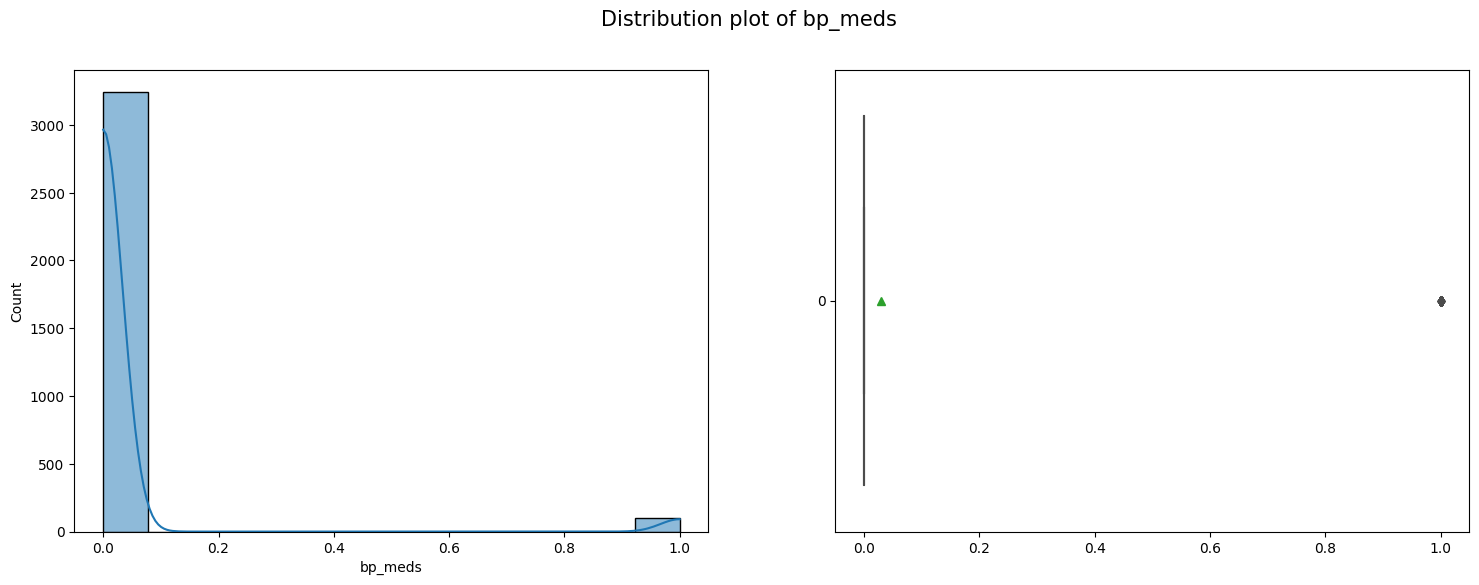

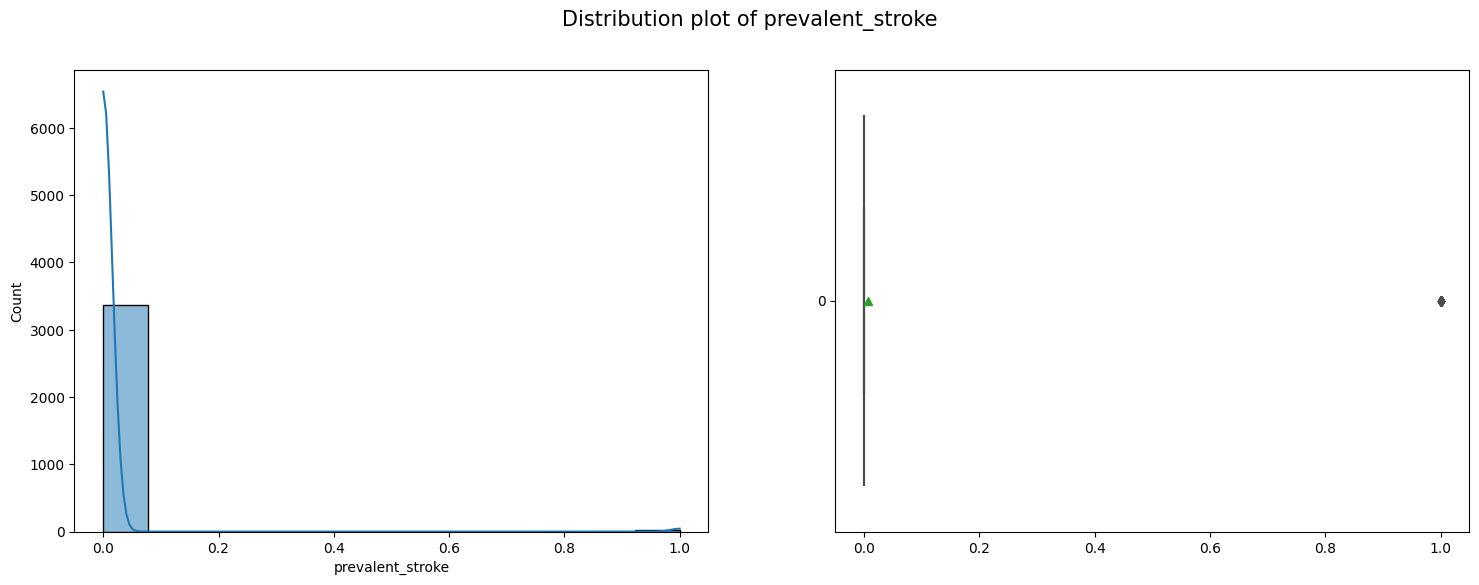

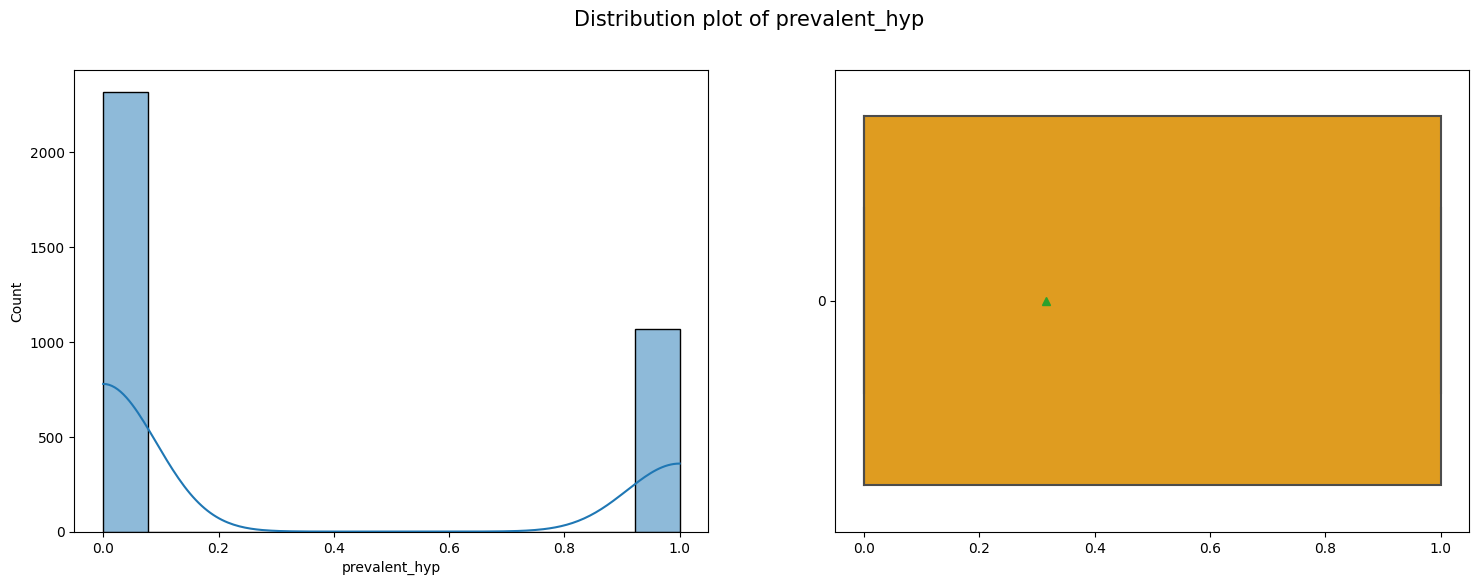

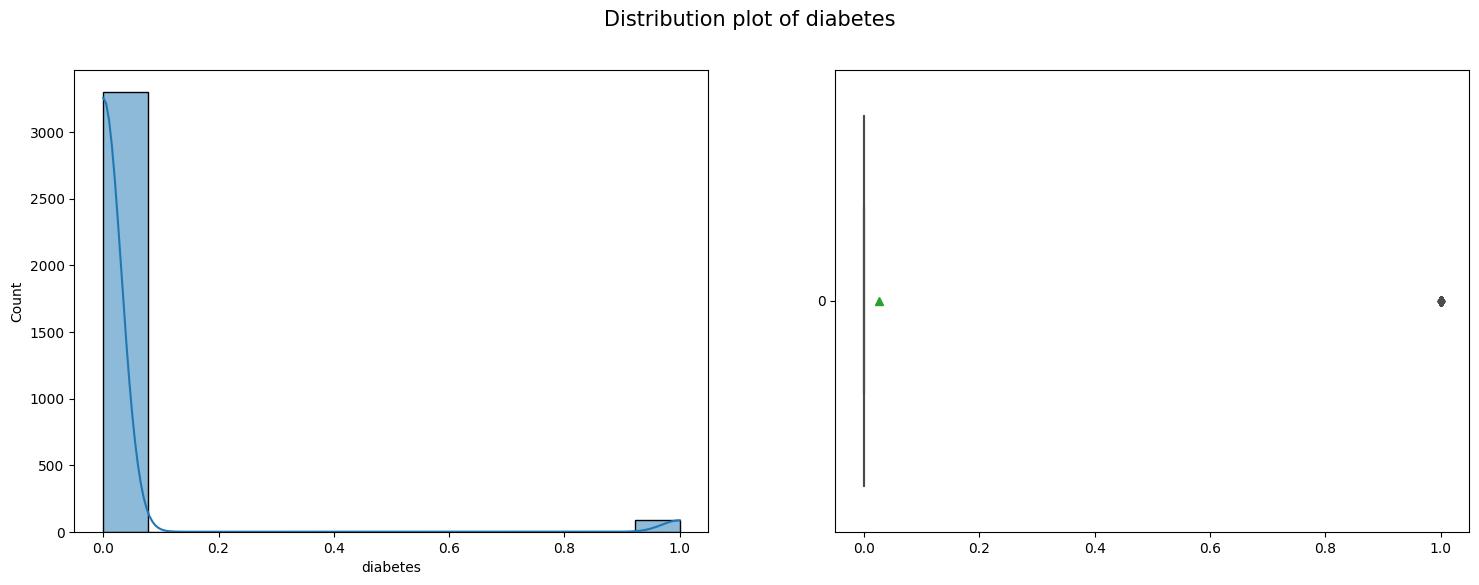

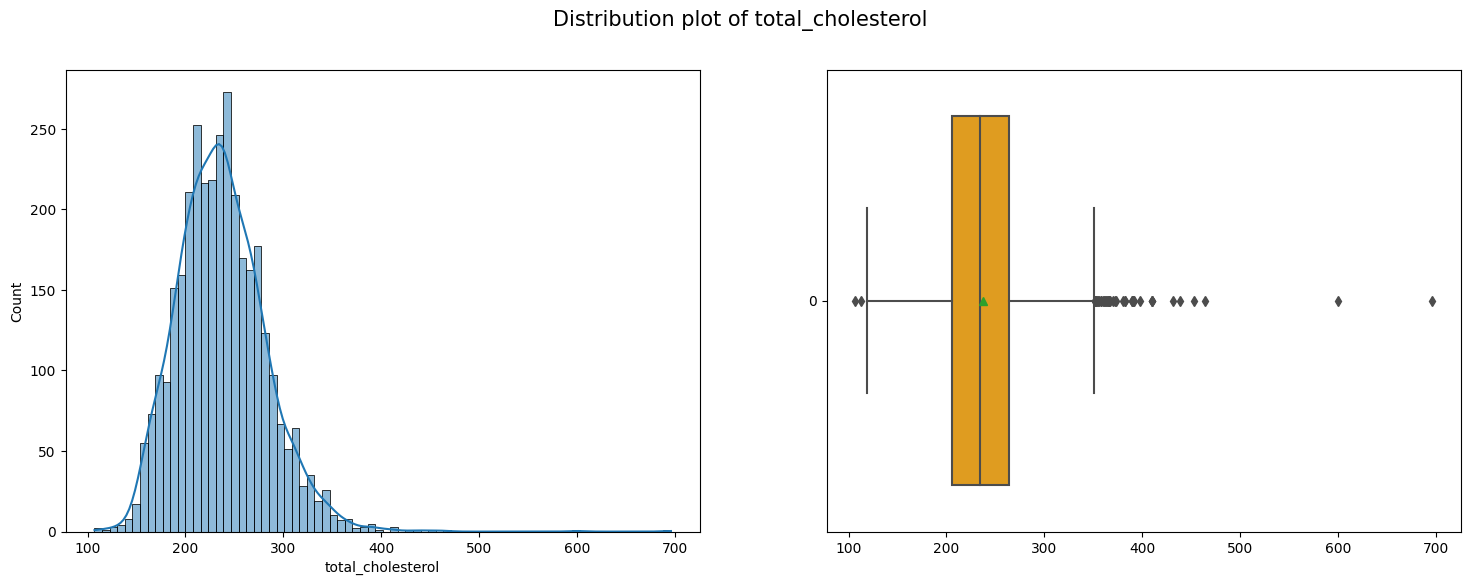

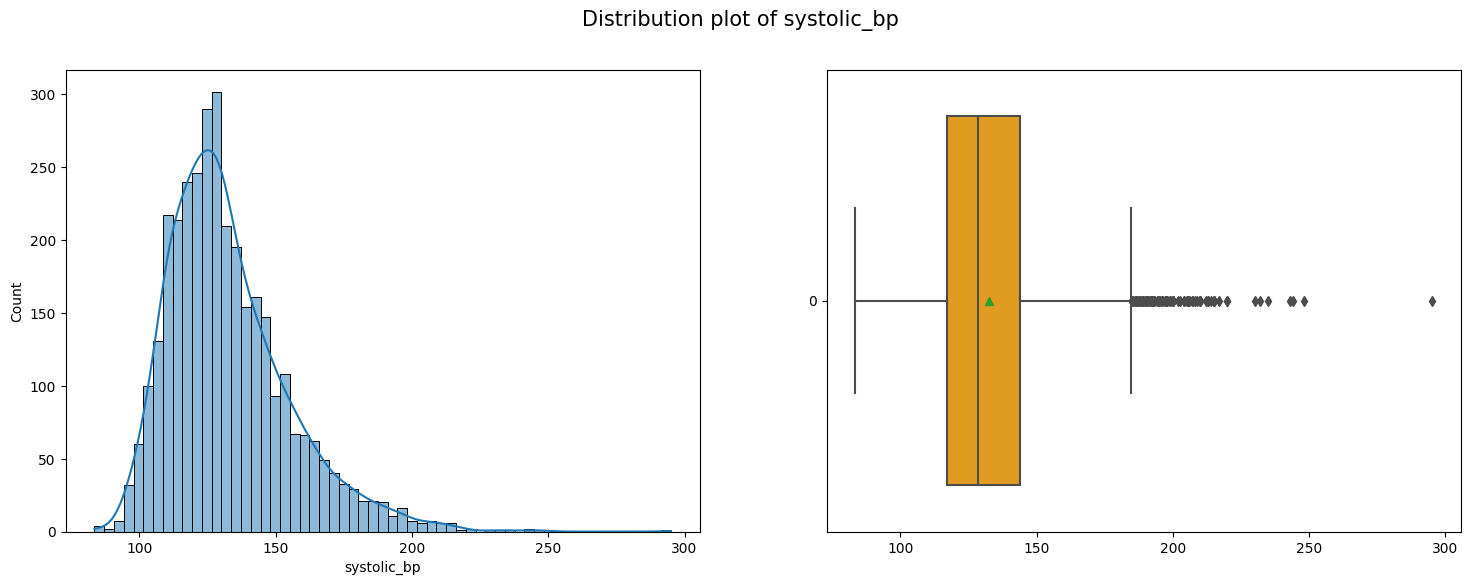

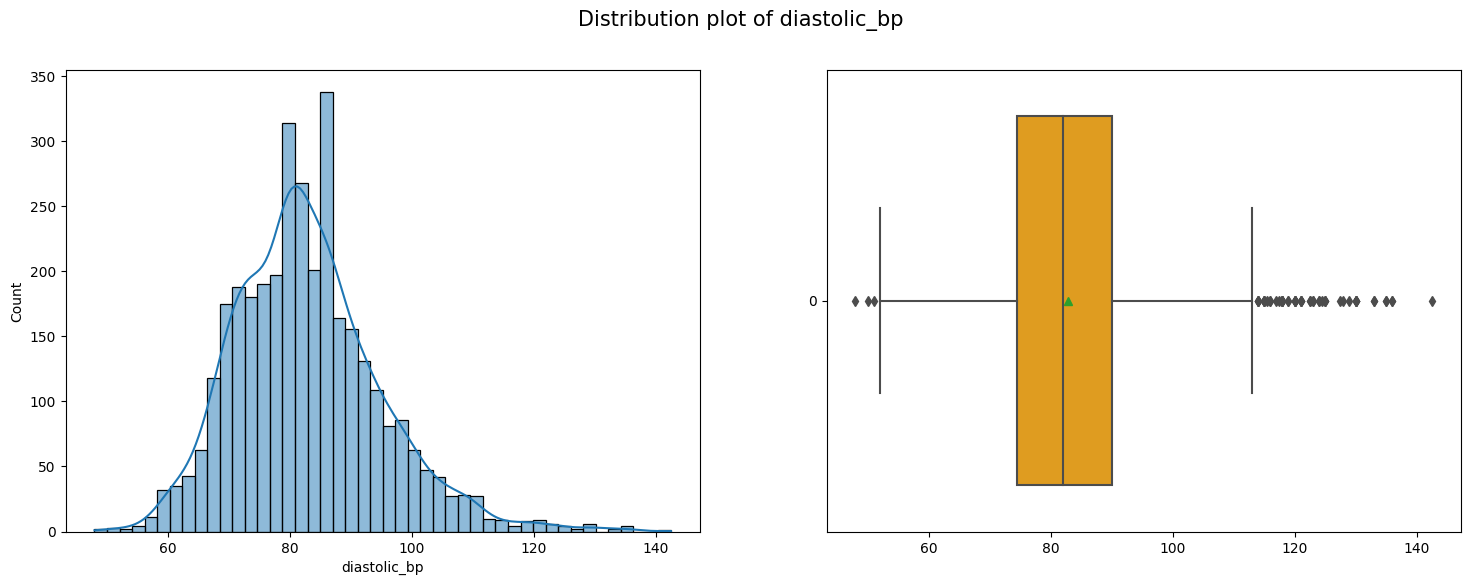

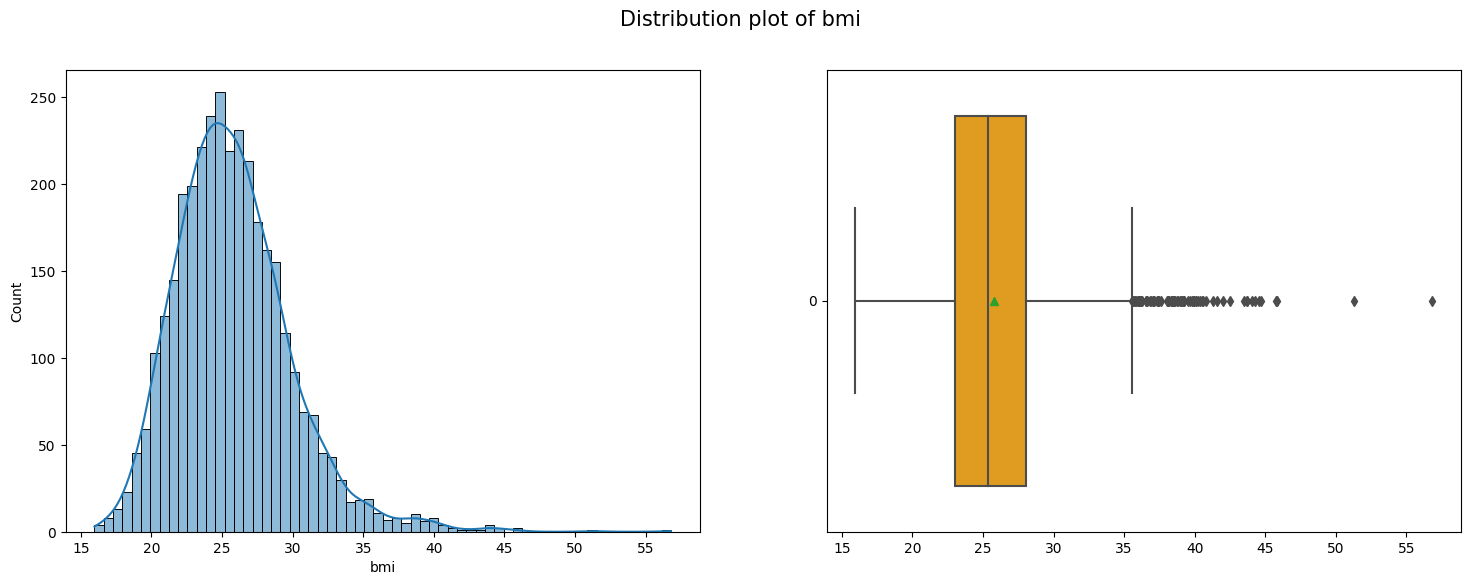

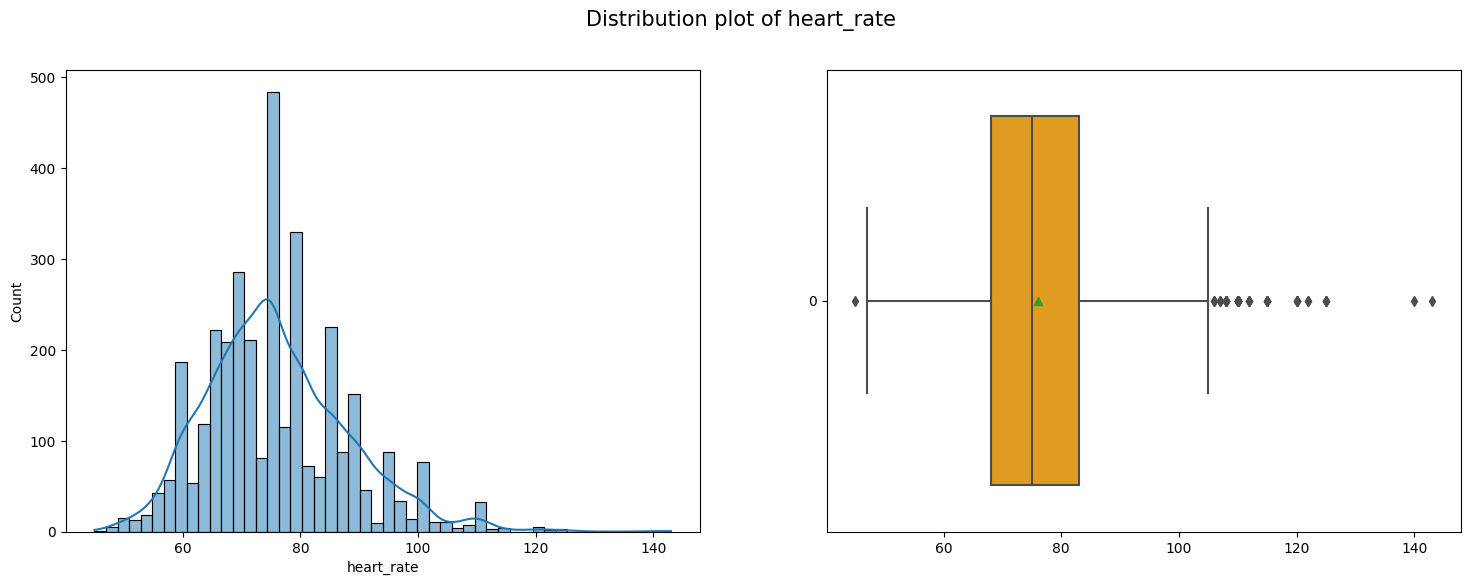

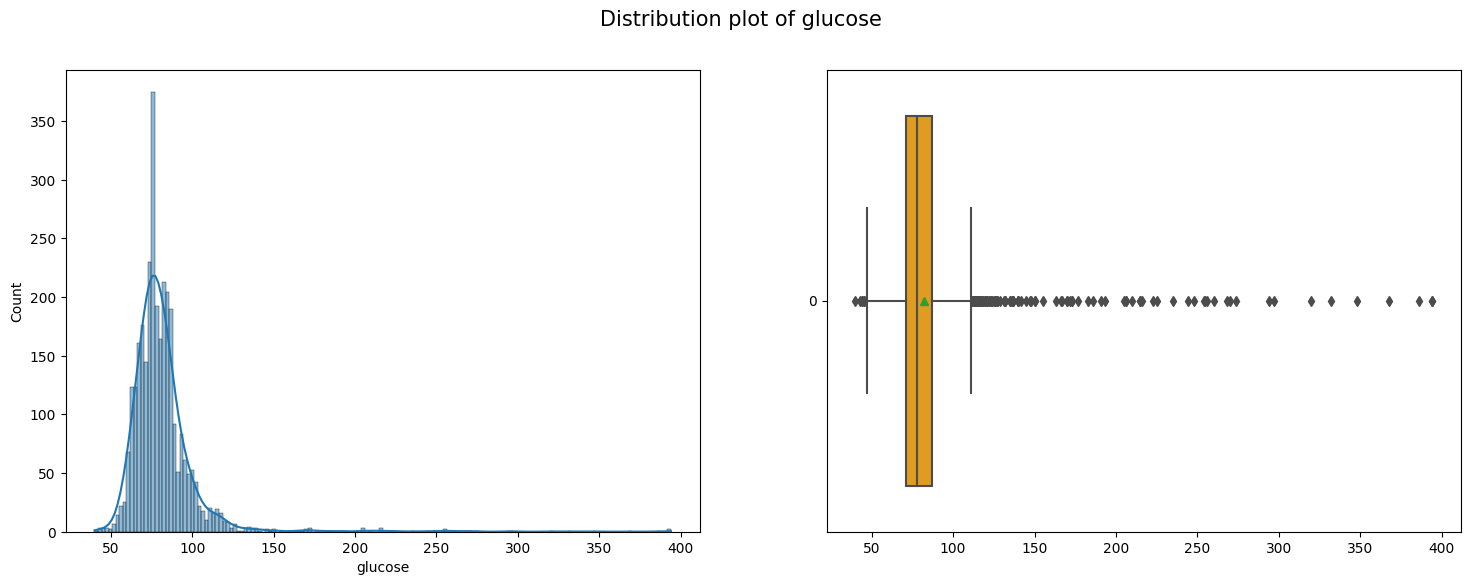

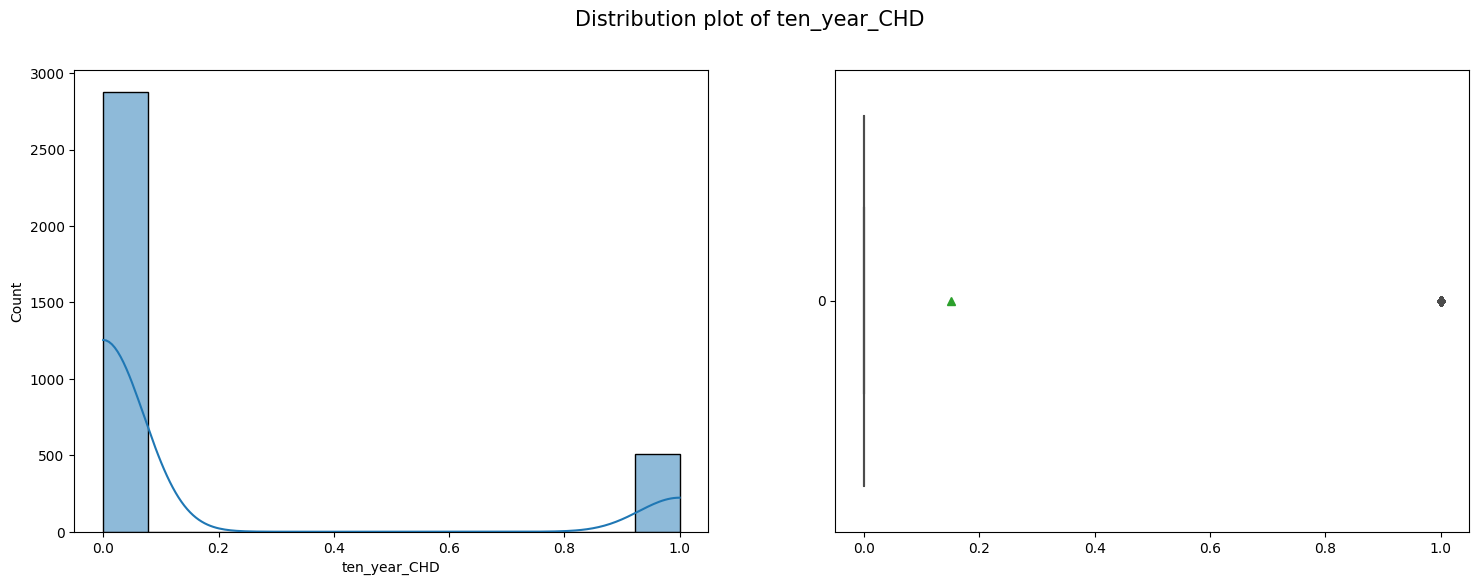

In [22]:
#distribution and boxplot of numerical features
for col in data_2.describe().columns:

  fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
  sns.histplot(data_2[col],ax=ax[0],kde=True)
  sns.boxplot(data_2[col],ax=ax[1],orient='h',showmeans=True,color='orange')
  fig.suptitle("Distribution plot of "+ col, fontsize = 15)
  plt.show()

**Observation**
*   **We can seen from histogram that most of the columns either normally distibuted or right skewed.**
*   **From box-plot we can see there are some outliers in our columns.**
*   **We will deal with outliers later.**

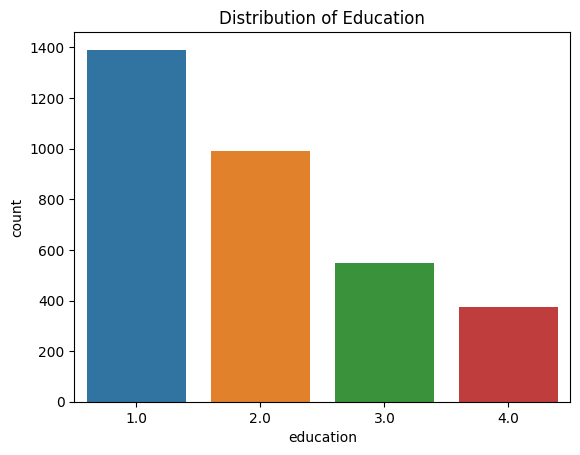

In [23]:
#countplot for education
sns.countplot(x=data_2['education'],data=data_2)
plt.title('Distribution of Education')
plt.show()

**Observation:**
*   **From chart, 1 category has highest count following 2,3,4**

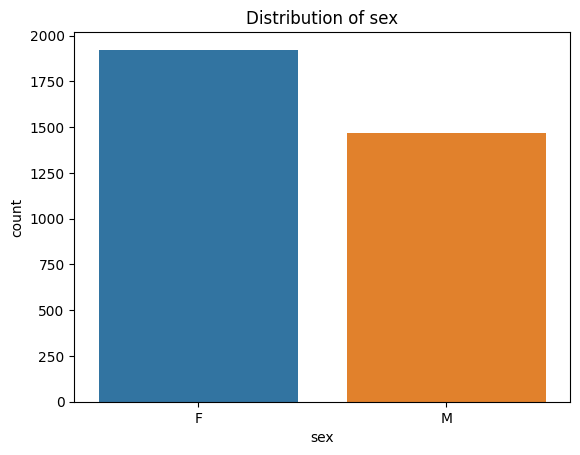

In [24]:
#countplot for sex
sns.countplot(x=data_2['sex'],data=data_2)
plt.title('Distribution of sex')
plt.show()

**Observation:**
*   **From chart we can seen that female patient is more than male patients.**

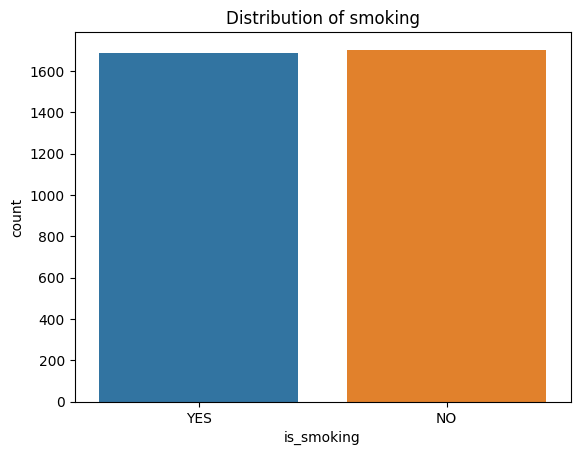

In [25]:
#countplot for sex
sns.countplot(x='is_smoking',data=data_2)
plt.title('Distribution of smoking')
plt.show()

**observation:**
*   **Count for  smoker and non-smoker is almost similar.**


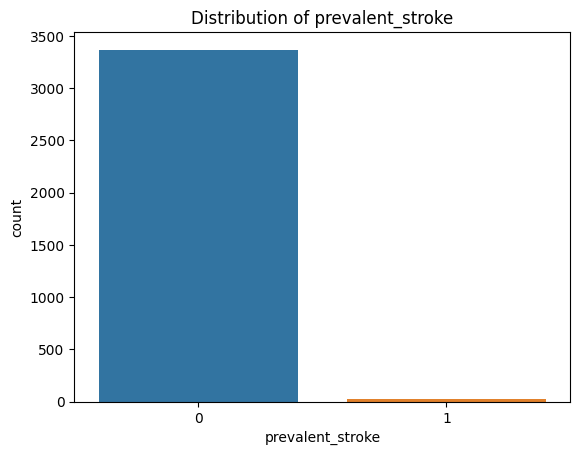

In [26]:
#countplot for prevalent_stroke
sns.countplot(x='prevalent_stroke',data=data_2)
plt.title('Distribution of prevalent_stroke')
plt.show()

**Observation:**
*   **Only a handful of patients have a history of having experienced a stroke before.**

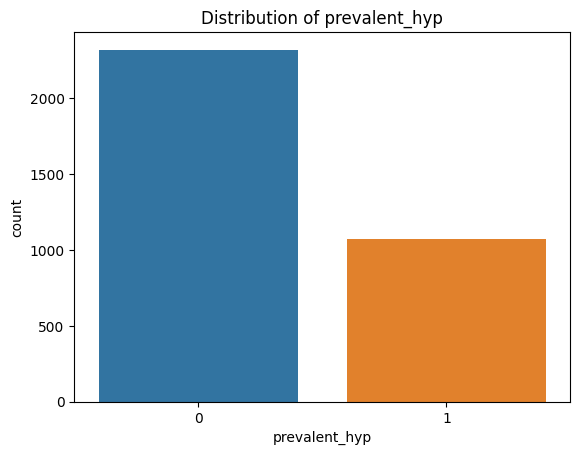

In [27]:
#countplot for prevalent_hyp
sns.countplot(x='prevalent_hyp',data=data_2)
plt.title('Distribution of prevalent_hyp')
plt.show()

**Observation:**
*   **Count for hypertensive patients is less.**
*   **Count for patients who hadn't hypertensive problem is more.**

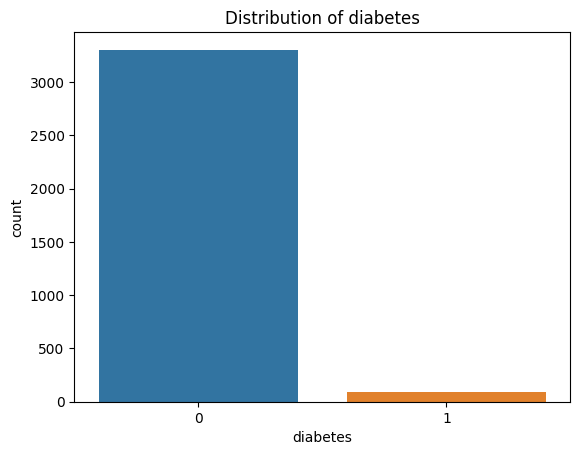

In [28]:
#countplot for diabetes
sns.countplot(x='diabetes',data=data_2)
plt.title('Distribution of diabetes')
plt.show()

**Observation:**
*   **Only a handful of patients have a diabetes as we can seen from graph.**
*   **Non Diabetes count is much more.**

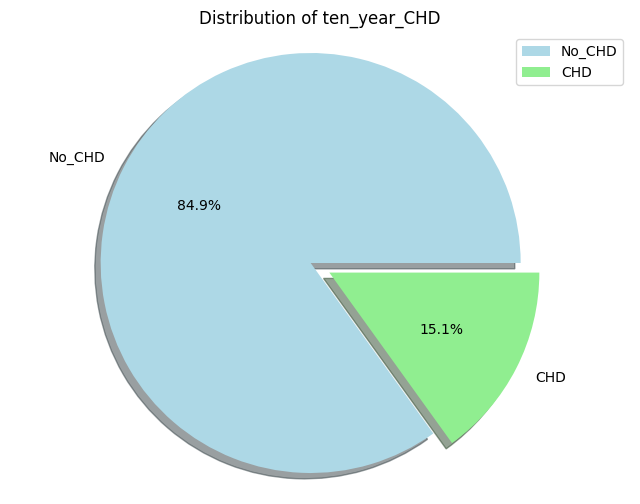

In [29]:
#Pie-chart for 10-year risk of coronary heart disease CHD
plt.figure(figsize=(8, 6))
plt.pie(data_2['ten_year_CHD'].value_counts(),labels=['No_CHD','CHD'],autopct='%1.1f%%',
        colors = ['lightblue', 'lightgreen'],explode = [0,0.1],shadow=True)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
# Title and legend
plt.title("Distribution of ten_year_CHD")
plt.legend(loc="best")
plt.show()

**Observation:**
*   **From above pie-chart,15.1% patients are classified positive for 10 year risk of coronary heart disease CHD.**
*   **Remaining 84.9% patients are classified negative for 10 year risk of coronary heart disease CHD.**
*   **It's clearly seen that our dataset is imbalance.**


## **Bivariate and Multivariate analysis**

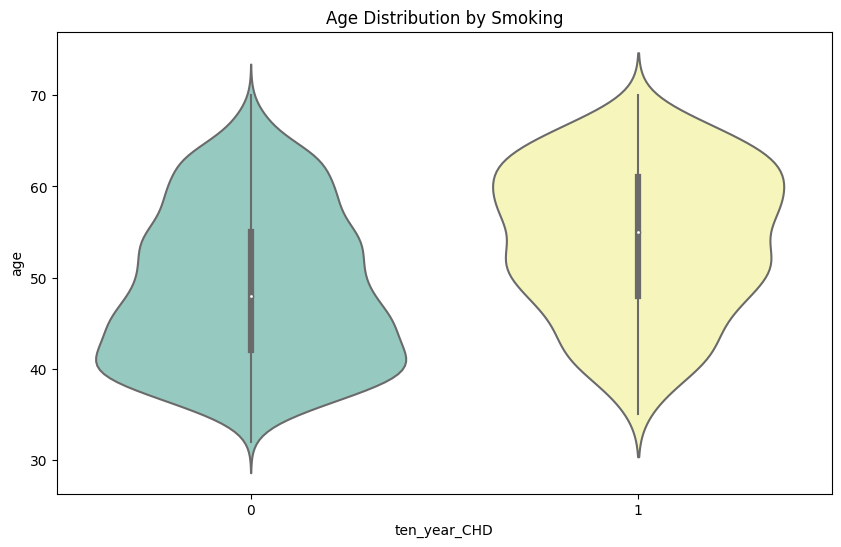

In [30]:
plt.figure(figsize=(10, 6))

sns.violinplot(x="ten_year_CHD", y="age",data=data_2, palette="Set3")

plt.title("Age Distribution by Smoking")
plt.show()


**Observation:**
*  **From above violine plot,we can see distribution for positive and negative case.**
*   **Positive case density is higher at higher age as compared to lower age.**
*   **positive case are higher in older people.**

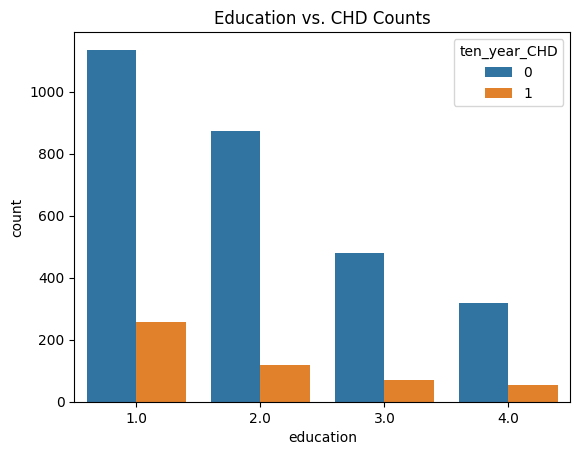

In [31]:
#barplot for education vs CHD counts
education_positive_negative = data_2.groupby('education')['ten_year_CHD'].value_counts().rename('count').reset_index()
sns.barplot(x='education',y='count',hue='ten_year_CHD',data=education_positive_negative)
plt.title("Education vs. CHD Counts")
plt.show()

**Observation:**
*   **For category 1,positive cases are higher following categories 2,3 and 4.**
*   **negative cases are also higher for category 1 following categories 2,3 and 4.**

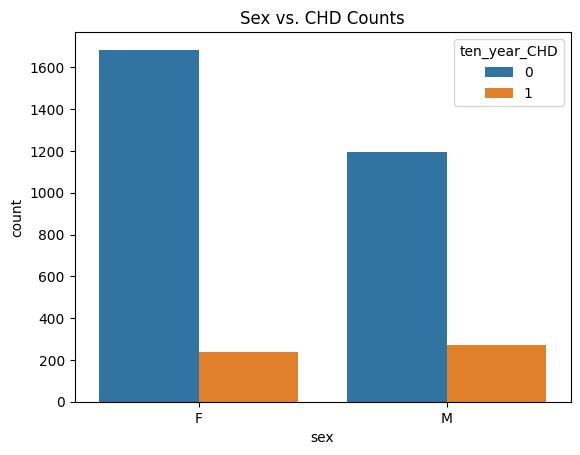

In [32]:

sex_positive_negative= data_2.groupby('sex')['ten_year_CHD'].value_counts().rename('count').reset_index()
sns.barplot(x='sex',y='count',hue='ten_year_CHD',data=sex_positive_negative)
plt.title("Sex vs. CHD Counts")
plt.show()

**Observation:**
*   **Positive cases are higher in male as compared to female.But as we can see the difference between male and female positive cases is low.**
*   **Negative cases are higher in female.**

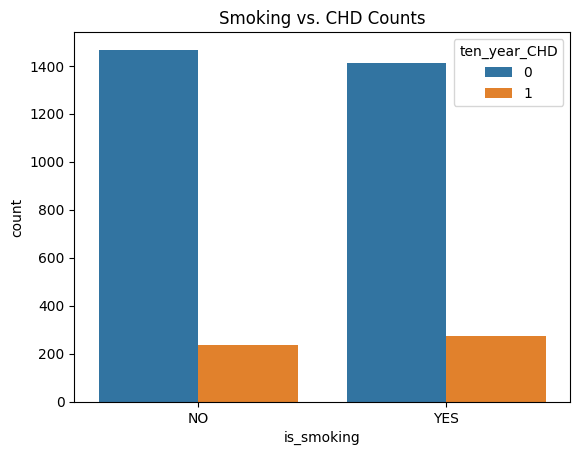

In [33]:
smoking_positive_negative= data_2.groupby('is_smoking')['ten_year_CHD'].value_counts().rename('count').reset_index()
sns.barplot(x='is_smoking',y='count',hue='ten_year_CHD',data=smoking_positive_negative)
plt.title("Smoking vs. CHD Counts")
plt.show()

**Observation:**
*   **Positive cases for smoker is higher than non smoker.**
*   **Negative cases are higher for non smoker.**
*   **For both positive and negative cases,the difference between smoker and non smoker is low.**

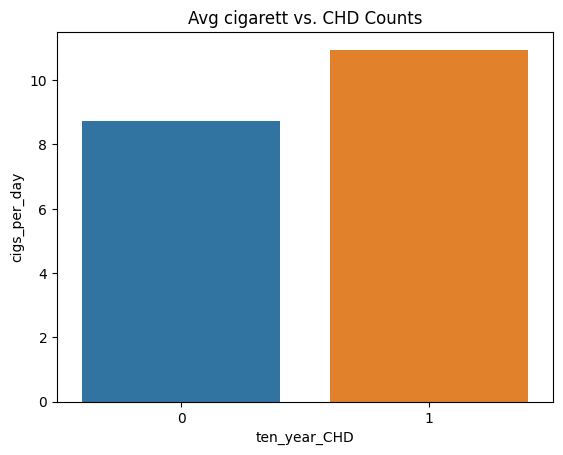

In [34]:
cig_positive_negative=data_2.groupby('ten_year_CHD')['cigs_per_day'].mean().reset_index()
sns.barplot(x='ten_year_CHD',y='cigs_per_day',data=cig_positive_negative)
plt.title("Avg cigarett vs. CHD Counts")
plt.show()


**Observation:**
*   **Patients with positive cases would smoke average 11 cigarettes per day.**
*   **Negative case patients would smoke 9 cigarettes daily.**

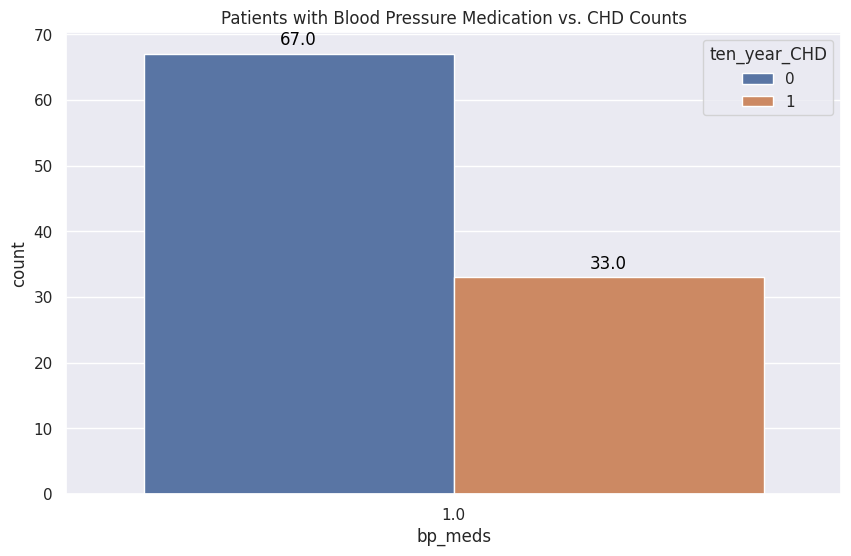

In [35]:
bp_med_CHD = data_2.groupby('ten_year_CHD')['bp_meds'].value_counts().rename('count').reset_index()
bp_med_CHD_new = bp_med_CHD[bp_med_CHD['bp_meds']==1.0]
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='bp_meds',y='count',hue='ten_year_CHD',data=bp_med_CHD_new)
# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.title("Patients with Blood Pressure Medication vs. CHD Counts")
plt.show()

**Observation:**
*   **From above graph we can see that total 100 patients were on blood pressure medication out of which 33 Patients had positive case while 67 patients had negative case.**
  

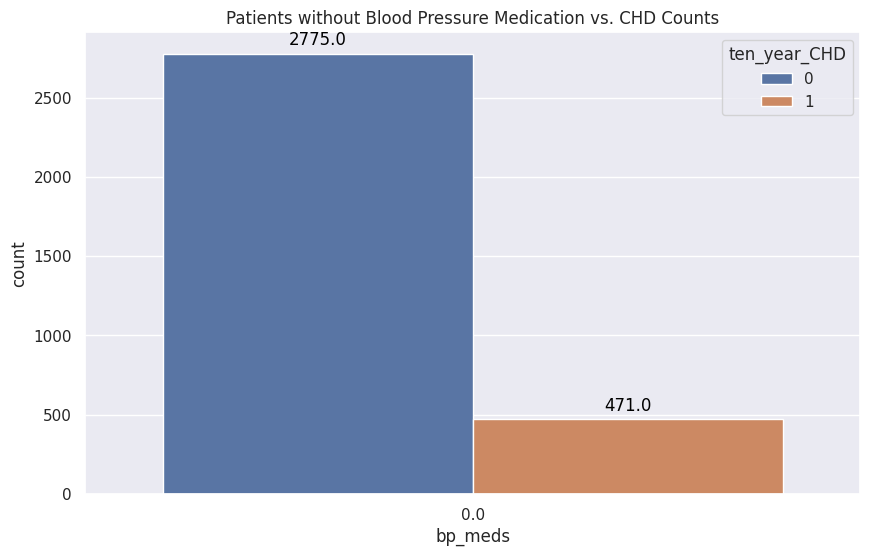

In [36]:
bp_med_CHD_new_2 = bp_med_CHD[bp_med_CHD['bp_meds']==0.0]
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='bp_meds',y='count',hue='ten_year_CHD',data=bp_med_CHD_new_2)
# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.title("Patients without Blood Pressure Medication vs. CHD Counts")
plt.show()

**Observation:**
*   **From above graph we can see that total 3246 patients were not on blood pressure medication out of which 471 Patients had positive case while 2775 patients had negative case.**

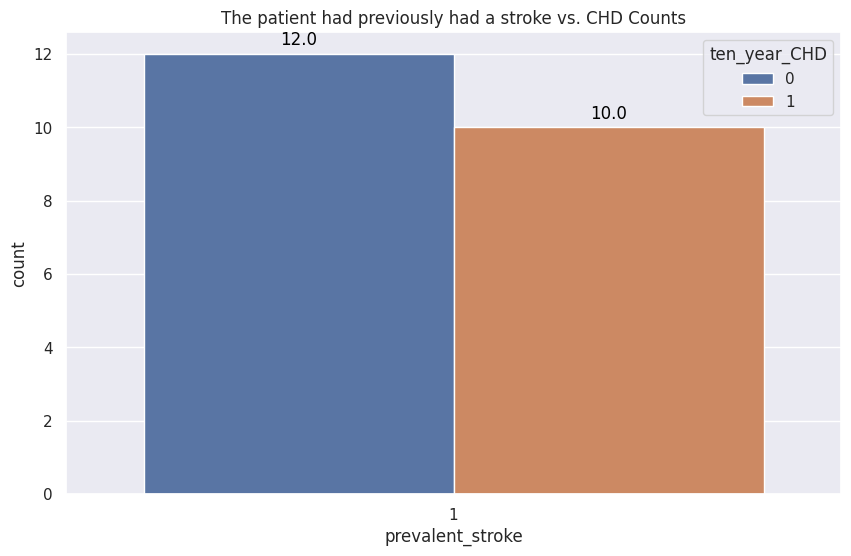

In [37]:
prevalent_stroke_ = data_2.groupby('ten_year_CHD')['prevalent_stroke'].value_counts().rename('count').reset_index()
prevalent_stroke_1 = prevalent_stroke_[prevalent_stroke_['prevalent_stroke']==1.0]
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='prevalent_stroke',y='count',hue='ten_year_CHD',data=prevalent_stroke_1)
# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.title("The patient had previously had a stroke vs. CHD Counts")
plt.show()

**Observation:**
*   **From above graph we can see that total 22 patients had previously had a stroke out of which 10 Patients had positive case while 12 patients had negative case.**

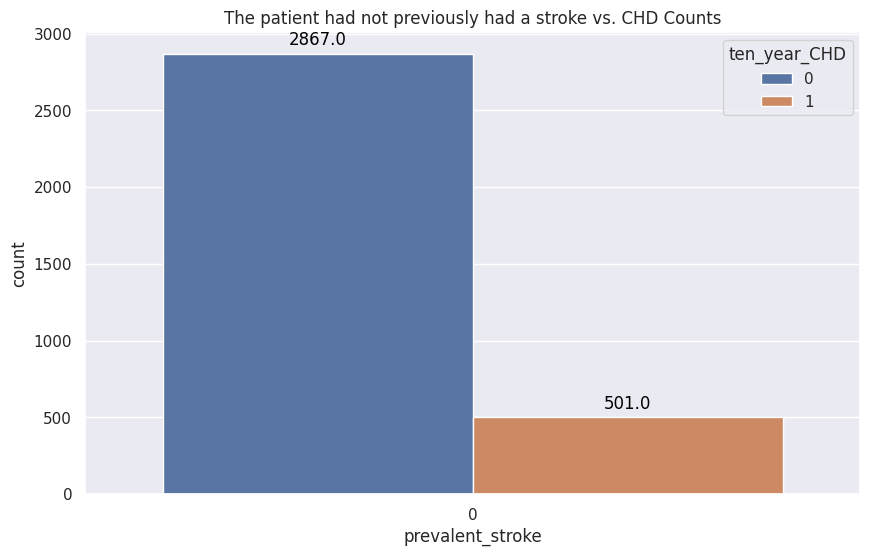

In [38]:
prevalent_stroke_2 = prevalent_stroke_[prevalent_stroke_['prevalent_stroke']==0.0]
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='prevalent_stroke',y='count',hue='ten_year_CHD',data=prevalent_stroke_2)
# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.title("The patient had not previously had a stroke vs. CHD Counts")
plt.show()

**Observation:**
*   **From above graph we can see that total 3368 patients had not previously had a stroke out of which 501 Patients had positive case while 2867 patients had negative case.**

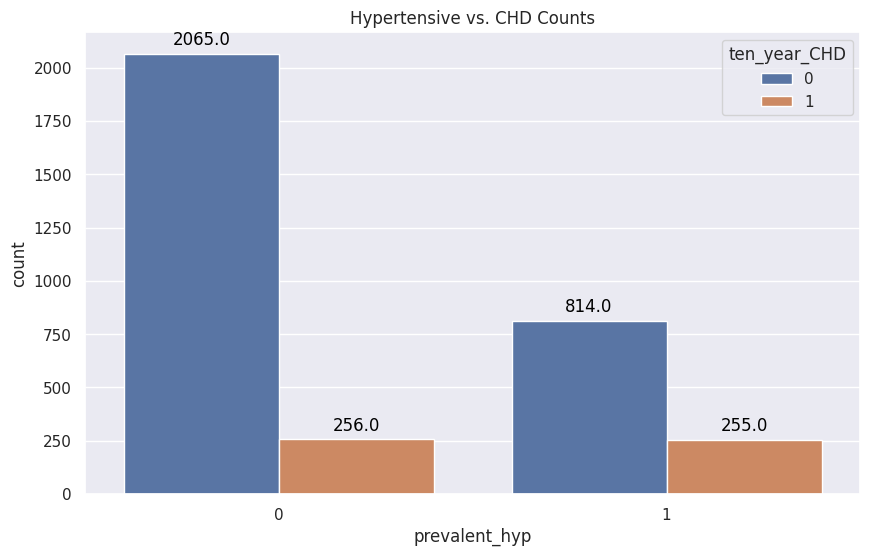

In [39]:
prevalent_hyp_df = data_2.groupby('ten_year_CHD')['prevalent_hyp'].value_counts().rename('count').reset_index()
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='prevalent_hyp',y='count',hue = 'ten_year_CHD',data=prevalent_hyp_df)
# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.title("Hypertensive vs. CHD Counts")
plt.show()


**Observation:**
*   **From above graph we can see that total 1069 patients were hypertensive out of which 255 Patients had positive case while 814 patients had negative case.**

*  **2321 patients were not hypertensive out of which 256 patients had positive and 2065 patients had negative case.**

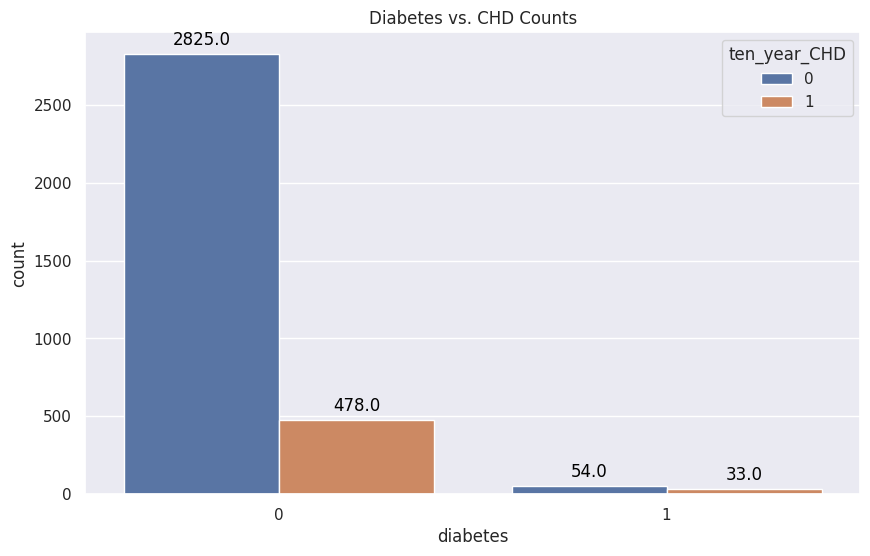

In [40]:
diabetes_df = data_2.groupby('ten_year_CHD')['diabetes'].value_counts().rename('count').reset_index()
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='diabetes',y='count',hue = 'ten_year_CHD',data=diabetes_df)
# Add count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.title("Diabetes vs. CHD Counts")
plt.show()

**Observation:**
*   **Total 87 patients had diabetes out of which 33 patients had positive case while 54 patients had negative case.**

*   **Total 3303 patients had no diabetes out of which 478 patients had positive case while 2825 patients had negative case.**

*   **Patients with no diabetes had more positive case.**

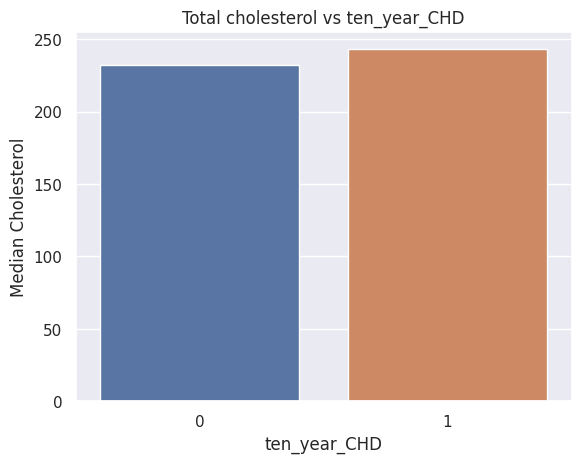

In [41]:
#plotting 'Median total_cholesterol systolic_bp'barplotplot
cholesterol = data_2.groupby('ten_year_CHD')['total_cholesterol'].median().reset_index()
sns.barplot(data=cholesterol,x='ten_year_CHD',y='total_cholesterol')
plt.title('Total cholesterol vs ten_year_CHD')
plt.ylabel('Median Cholesterol')
plt.show()

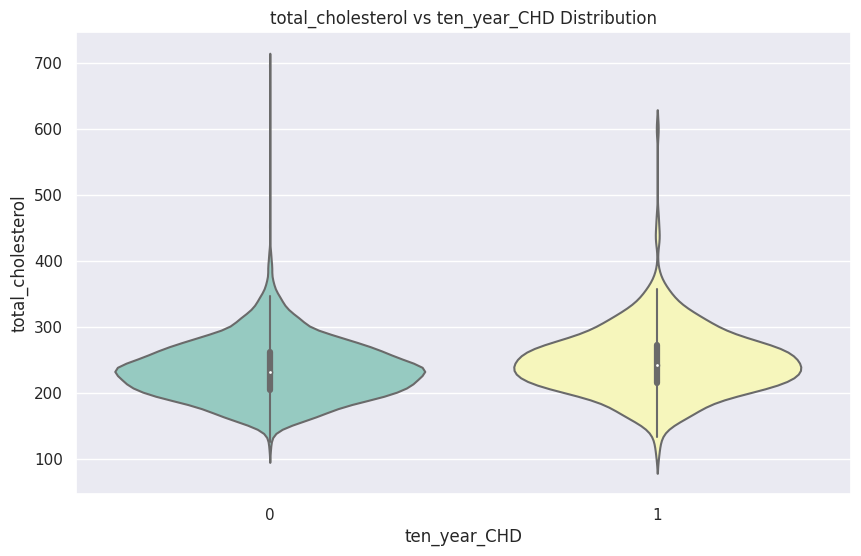

In [42]:
#plotting 'total_cholesterol vs ten_year_CHD Distribution'violinplot
plt.figure(figsize=(10, 6))

sns.violinplot(x="ten_year_CHD", y="total_cholesterol",data=data_2, palette="Set3")

plt.title("total_cholesterol vs ten_year_CHD Distribution")
plt.show()

**Observation:**
*   **From Violin plot we can see that distribution for positive and negative cases with respect to cholesterol is almost similar.negative distribution had more outliers.**

*   **From barplot median cholesterol level for positive case is higher than negative case.**

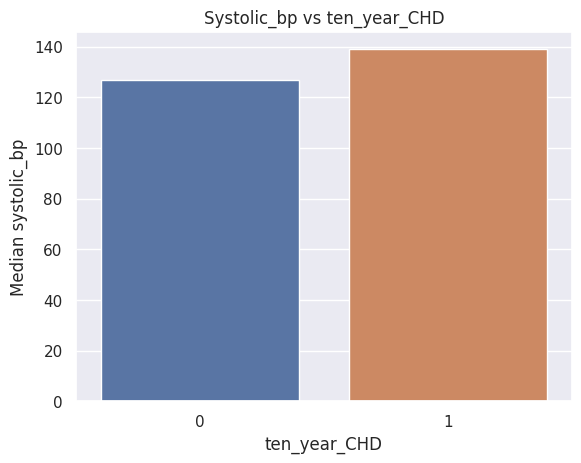

In [43]:
#plotting 'Median systolic_bp'barplotplot
systolic_bp_df = data_2.groupby('ten_year_CHD')['systolic_bp'].median().reset_index()
sns.barplot(data=systolic_bp_df,x='ten_year_CHD',y='systolic_bp')
plt.title('Systolic_bp vs ten_year_CHD')
plt.ylabel('Median systolic_bp')
plt.show()

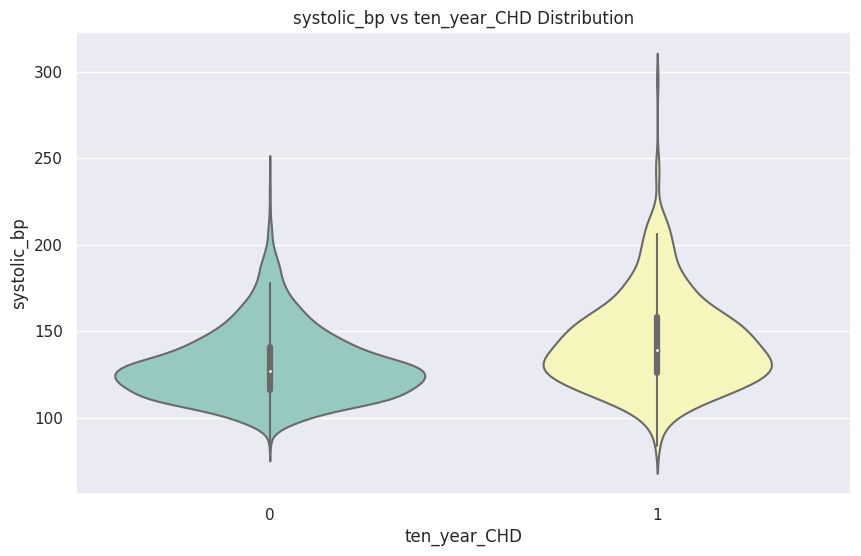

In [44]:
#plotting 'systolic_bp vs ten_year_CHD Distribution'violinplot
plt.figure(figsize=(10, 6))

sns.violinplot(x="ten_year_CHD", y="systolic_bp",data=data_2, palette="Set3")

plt.title('systolic_bp vs ten_year_CHD Distribution')
plt.show()

**Observation:**
*   **From violin plot as the systolic_bp increases,density of positive cases also increses.**
*   **Median systolic blood pressure is higher for positive case.**

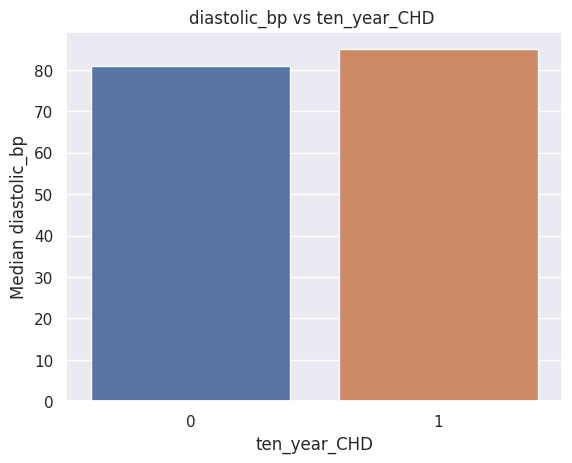

In [45]:
#plotting 'diastolic_bp vs ten_year_CHD'barplotplot
diastolic_bp_df = data_2.groupby('ten_year_CHD')['diastolic_bp'].median().reset_index()
sns.barplot(data=diastolic_bp_df,x='ten_year_CHD',y='diastolic_bp')
plt.ylabel('Median diastolic_bp')
plt.title('diastolic_bp vs ten_year_CHD ')
plt.show()

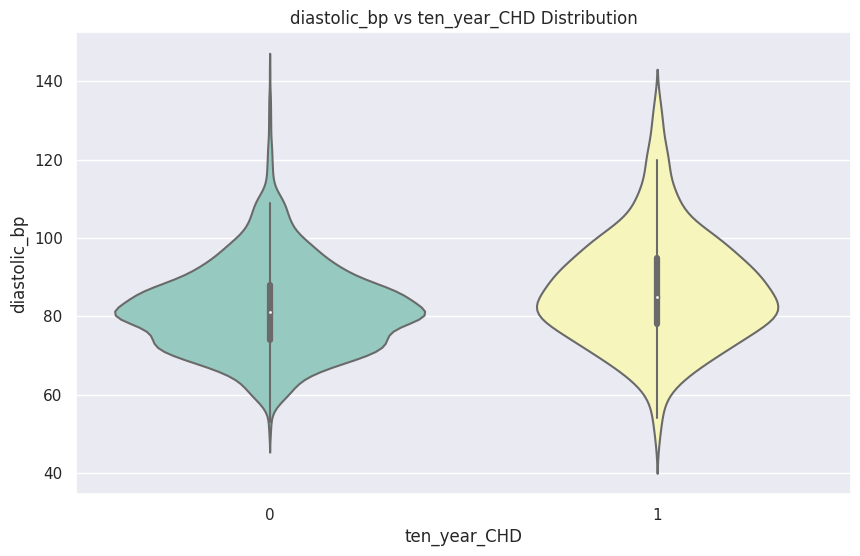

In [46]:
#plotting 'diastolic_bp vs ten_year_CHD Distribution'violinplot
plt.figure(figsize=(10, 6))

sns.violinplot(x="ten_year_CHD", y="diastolic_bp",data=data_2, palette="Set3")

plt.title('diastolic_bp vs ten_year_CHD Distribution')
plt.show()

**Observation:**
*   **Density of positive case is more at higher diastolic blood pressure.**

*   **At higher diastolic pressure density of negative cases decreasing.**

*   **Median systolic blood pressure is higher for positive case.**

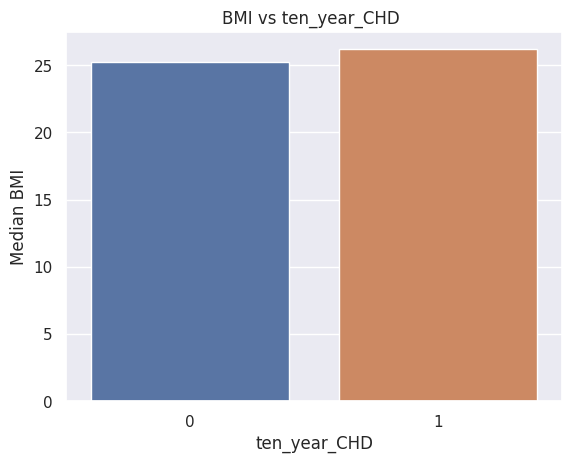

In [47]:
#plotting 'BMI vs ten_year_CHD' barplot
bmi_df = data_2.groupby('ten_year_CHD')['bmi'].median().reset_index()
sns.barplot(data=bmi_df,x='ten_year_CHD',y='bmi')
plt.ylabel('Median BMI')
plt.title('BMI vs ten_year_CHD ')
plt.show()

**Observation**:

*   **From graph we can see that there is no much difference between patient's BMI of Positive and Negative cases.**

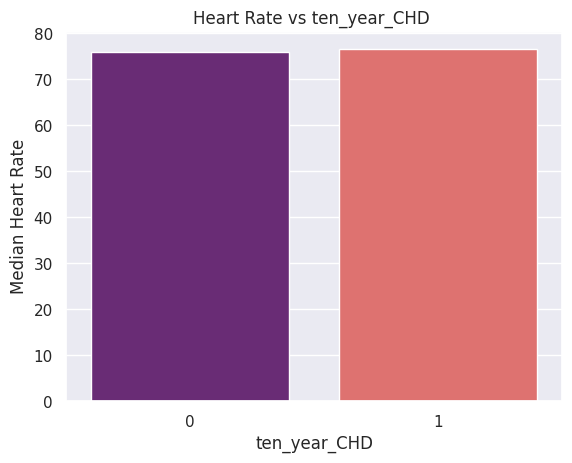

In [48]:
#plotting 'Heart Rate vs ten_year_CHD ' barplot
heart_rate_df = data_2.groupby('ten_year_CHD')['heart_rate'].mean().reset_index()
sns.barplot(data=heart_rate_df,x='ten_year_CHD',y='heart_rate',palette='magma')
plt.ylabel('Median Heart Rate')
plt.title('Heart Rate vs ten_year_CHD ')
plt.show()

**Observation:**

*   **From graph we can see that there is no much difference between patient's heart rate of Positive and Negative cases.**

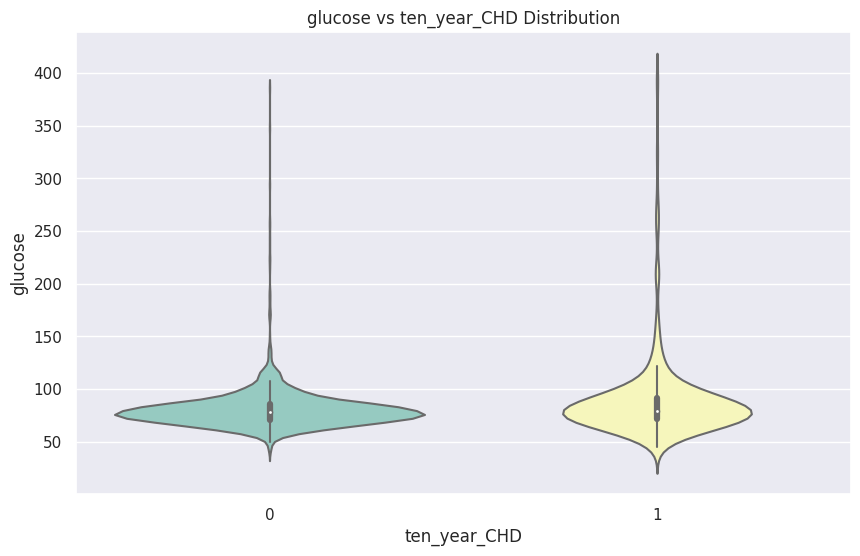

In [49]:
#plotting 'glucose vs ten_year_CHD Distribution'violinplot
plt.figure(figsize=(10, 6))

sns.violinplot(x="ten_year_CHD", y="glucose",data=data_2, palette="Set3")

plt.title('glucose vs ten_year_CHD Distribution')
plt.show()

**Observation:**

*   **from violin plot,density of postive cases is more than negative cases for higher value of glucose**

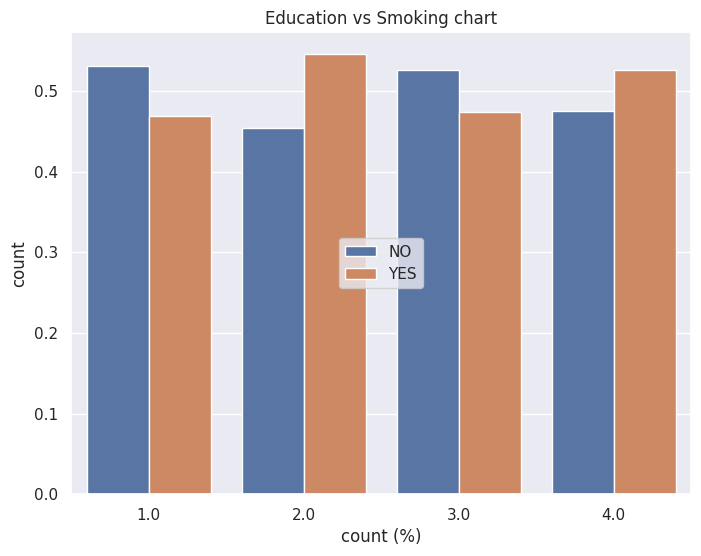

In [50]:
#plotting 'Education vs Smoking chart' barplot
plt.figure(figsize=(8,6))
education_smoking_df = data_2.groupby('education')['is_smoking'].value_counts(normalize=True).rename('count').reset_index()
sns.barplot(data=education_smoking_df,x='education',y='count',hue='is_smoking')
plt.xlabel('count (%)')
plt.title('Education vs Smoking chart')
plt.legend(loc='center')
plt.show()

**Observation:**
*  **There seems no relationship between education and smoking.**

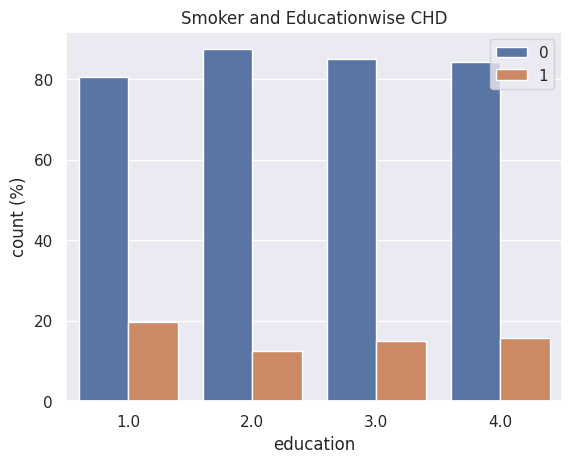

In [51]:
#plotting 'Smoker and Educationwise CHD' barplot
education_smoking_CHD_df = data_2.groupby(['education','is_smoking'])['ten_year_CHD'].value_counts(normalize=True).rename('count').reset_index()
education_smoking_CHD_df['count (%)'] = education_smoking_CHD_df['count']*100
education_smoking_yes_CHD_df = education_smoking_CHD_df[education_smoking_CHD_df['is_smoking']=='YES']
sns.barplot(data=education_smoking_yes_CHD_df,x='education',y='count (%)',hue='ten_year_CHD')
plt.title('Smoker and Educationwise CHD')
plt.legend(loc='best')
plt.show()


**Observation**:
*  **Smokers with high and low level of education has no relationship with coronary heart disease(CHD).**

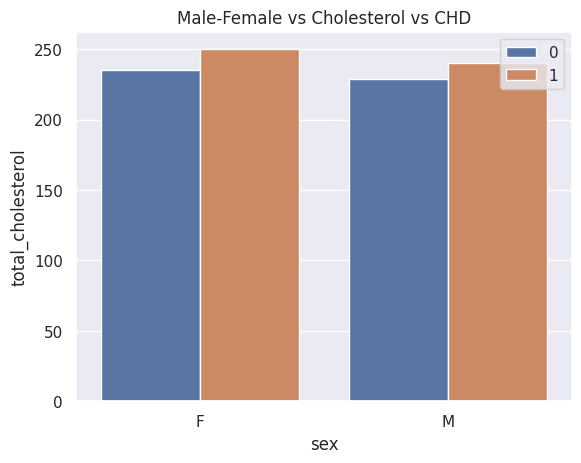

In [52]:
#plotting 'Male-Female vs Cholesterol vs CHD' barplot
sex_cholesterol_CHD = data_2.groupby(['sex','ten_year_CHD'])['total_cholesterol'].median().reset_index()
sns.barplot(data=sex_cholesterol_CHD,x='sex',y='total_cholesterol',hue='ten_year_CHD')
plt.title('Male-Female vs Cholesterol vs CHD')
plt.legend(loc='best')
plt.show()


**observation:**
*   **Female with positive cases has higher cholesterol level than male with positive cases.**
*   **Also for negative cases female has higher cholesterol level.**

<ipython-input-53-922330822a33>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_2.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


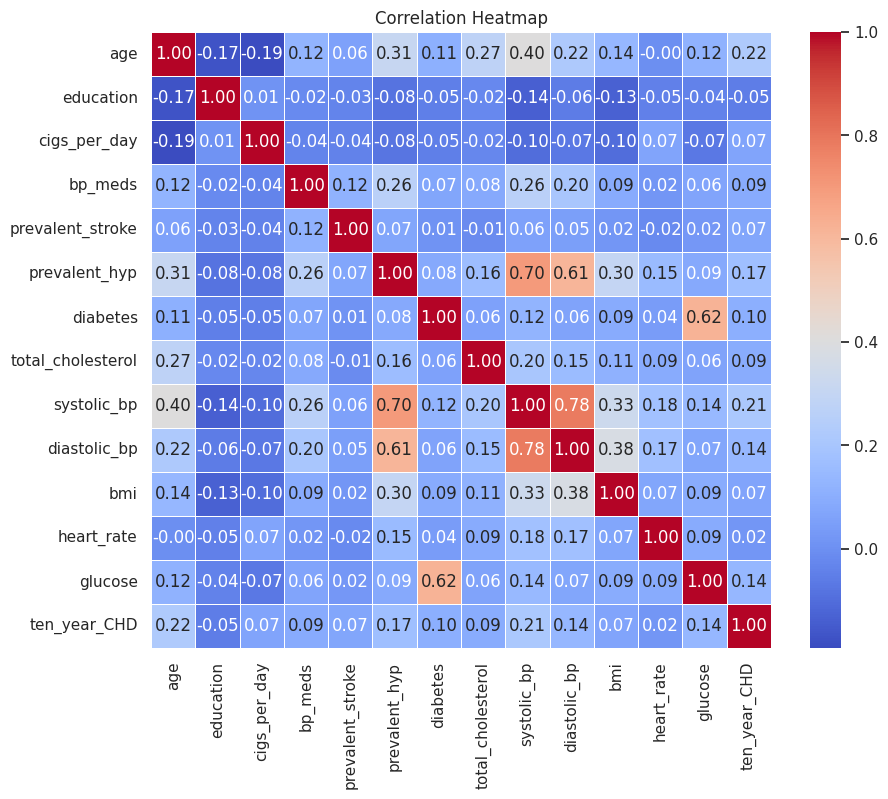

In [53]:
#plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_2.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


**Observation:**
*   **Prevalent_hyp and systolic_bp are highly positively correlated.**
*   **Prevalent_hyp and diastolic_bp are also  highly positively correlated.**
*   **Diabetes and glucose are highly positively correlated.**
*   **Systolic_bp and diastolic_bp are highly positively correlatd.**
*   **Education has no correlation with output variable ten_year_CHD**.

## **Hypothesis Testing**

To perform hypothesis testing to determine whether there is a statistically significant relationship between the 'education' variable and the 'ten_year_CHD' variable, we can use statistical tests such as the Chi-squared test for independence or a logistic regression analysis.

First we will define Null and alternate hypothesis.

*   ***Null Hypothesis*** : There is no association between education level and CHD outcome.

*   ***Alternate hypothesis*** : There is an association between education level and CHD outcome.

If the p-value is less than chosen significance level (e.g., 0.05), we can reject the null hypothesis, indicating that there is a statistically significant relationship between 'education' and 'ten_year_CHD.'

If the p-value is greater than significance level, we do not have enough evidence to reject the null hypothesis, suggesting that there may not be a statistically significant relationship.

In [54]:
#applying chi-square on education column and getting p-value
ct = pd.crosstab(data_2['education'],data_2['ten_year_CHD'])
chi2, p, _, _ = chi2_contingency(ct)
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")


Chi-squared statistic: 22.16105229004903
P-value: 6.038646749234552e-05


**conclusion:**
   
*   **A p-value of 6.04e-05 (approximately 0.0000604) is extremely small, much less than a typical significance level of 0.05. This suggests strong evidence against the null hypothesis, indicating that there is a statistically significant relationship between the 'education' variable and the 'ten_year_CHD' variable in your dataset.**

*   **Remember that while statistical significance indicates an association, it doesn't imply causation. Further analysis and domain knowledge are essential to interpret the direction and strength of the relationship and to understand the potential factors involved.**

## **Feature Engineering**

### **Handling Missing Values**

In [55]:
#checking missing values
data_2.isnull().sum()

age                    0
education             87
sex                    0
is_smoking             0
cigs_per_day          22
bp_meds               44
prevalent_stroke       0
prevalent_hyp          0
diabetes               0
total_cholesterol     38
systolic_bp            0
diastolic_bp           0
bmi                   14
heart_rate             1
glucose              304
ten_year_CHD           0
dtype: int64

**cigs_per_day**

In [56]:
#checking  cigs_per_day column where is_smoking is 'YES'
data_2[data_2['cigs_per_day'].isnull()]

age  education sex is_smoking  cigs_per_day  bp_meds  prevalent_stroke  \
422    55        1.0   F        YES           NaN      0.0                 0   
466    45        3.0   M        YES           NaN      0.0                 0   
469    42        1.0   M        YES           NaN      0.0                 0   
491    61        1.0   F        YES           NaN      0.0                 0   
538    41        1.0   F        YES           NaN      0.0                 0   
767    54        1.0   M        YES           NaN      0.0                 0   
1461   47        2.0   F        YES           NaN      0.0                 0   
1467   49        1.0   F        YES           NaN      0.0                 0   
1597   57        NaN   F        YES           NaN      0.0                 0   
1986   49        2.0   F        YES           NaN      0.0                 0   
2031   58        4.0   F        YES           NaN      0.0                 0   
2087   49        4.0   M        YES           NaN      0.0                 0   
2240   47        3.0   F        YES           NaN      0.0                 0   
2284   45        2.0   M        YES           NaN      0.0                 0   
2527   58        2.0   M        YES           NaN      0.0                 0   
2638   57        NaN   M        YES           NaN      0.0                 0   
2648   39        2.0   M        YES           NaN      0.0                 0   
2723   43        4.0   M        YES           NaN      0.0                 0   
2879   42        1.0   M        YES           NaN      0.0                 0   
2945   53        2.0   M        YES           NaN      0.0                 0   
3301   55        1.0   M        YES           NaN      0.0                 0   
3378   39        3.0   F        YES           NaN      0.0                 0   

      prevalent_hyp  diabetes  total_cholesterol  systolic_bp  diastolic_bp  \
422               1         0              213.0        163.0          91.0   
466               1         0              170.0        145.5          99.0   
469               0         0              196.0        123.0          73.0   
491               1         0              356.0        168.0          98.0   
538               0         0              171.0        135.0          82.5   
767               0         0              219.0        110.0          72.0   
1461              0         0              365.0        127.0          76.0   
1467              0         0              252.0        123.0          69.0   
1597              0         0              229.0        115.0          69.0   
1986              1         0              233.0        158.0         102.0   
2031              1         0              270.0        195.0         117.5   
2087              0         0              256.0        127.5          81.5   
2240              0         0              321.0        132.0          88.0   
2284              0         0              248.0        121.0          72.0   
2527              0         0              235.0        127.5          76.0   
2638              0         0              223.0        107.5          72.5   
2648              0         0              285.0        121.0          82.0   
2723              0         0              222.0        109.5          69.0   
2879              0         0              226.0        119.0          80.0   
2945              0         0              276.0        130.0          86.0   
3301              0         0              214.0        132.5          85.5   
3378              0         0              197.0        126.5          76.5   

        bmi  heart_rate  glucose  ten_year_CHD  
422   28.66        69.0     66.0             0  
466   26.74        83.0     85.0             0  
469   22.06        66.0      NaN             0  
491   27.30       103.0    106.0             0  
538   24.35        79.0     82.0             0  
767   26.05        95.0     86.0             0  
1461

**Observation:**

*   **For all the missing values of cigs_per_day,category of is_smoking is 'YES'.Therefor we can fill missing values by mean or median of cigs_per_day.**

In [57]:
#cigs_per_day' mean and median before filling missing values
data_2['cigs_per_day'].mean(),data_2['cigs_per_day'].median()

(9.069477434679335, 0.0)

In [58]:
#checking mean and median for smokers
data_2[data_2['is_smoking']=='YES']['cigs_per_day'].mean(),data_2[data_2['is_smoking']=='YES']['cigs_per_day'].median()


(18.345945945945946, 20.0)

In [59]:
#replacing null values with median
data_2['cigs_per_day'] = data_2['cigs_per_day'].fillna(data_2[data_2['is_smoking']=='YES']['cigs_per_day'].median())


**education and bp_meds**

In [60]:
#filling education and bp_meds with mode value
data_2['education'] = data_2['education'].fillna(data_2['education'].mode()[0])
data_2['bp_meds'] = data_2['bp_meds'].fillna(data_2['bp_meds'].mode()[0])

**total_cholesterol,bmi and heart_rate**

In [61]:
# mean and median of total_cholesterol before filling missing values
data_2['total_cholesterol'].mean(),data_2['total_cholesterol'].median()

(237.07428400954655, 234.0)

In [62]:
# mean and median of bmi before filling missing values
data_2['bmi'].mean(),data_2['bmi'].median()

(25.7949644549763, 25.38)

In [63]:
# mean and median of heart_rate before filling missing values
data_2['heart_rate'].mean(),data_2['heart_rate'].median()

(75.97727943346119, 75.0)

In [64]:
data_2['total_cholesterol'] = data_2['total_cholesterol'].fillna(data_2['total_cholesterol'].median())
data_2['bmi'] = data_2['bmi'].fillna(data_2['bmi'].median())
data_2['heart_rate'] = data_2['heart_rate'].fillna(data_2['heart_rate'].median())

In [65]:
# mean and median of total_cholesterol after filling missing values
data_2['total_cholesterol'].mean(),data_2['total_cholesterol'].median()

(237.03982300884957, 234.0)

In [66]:
# mean and median of bmi after filling missing values
data_2['bmi'].mean(),data_2['bmi'].median()

(25.793250737463126, 25.38)

In [67]:
# mean and median of heart_rate after filling missing values
data_2['heart_rate'].mean(),data_2['heart_rate'].median()

(75.97699115044247, 75.0)

**glucose**

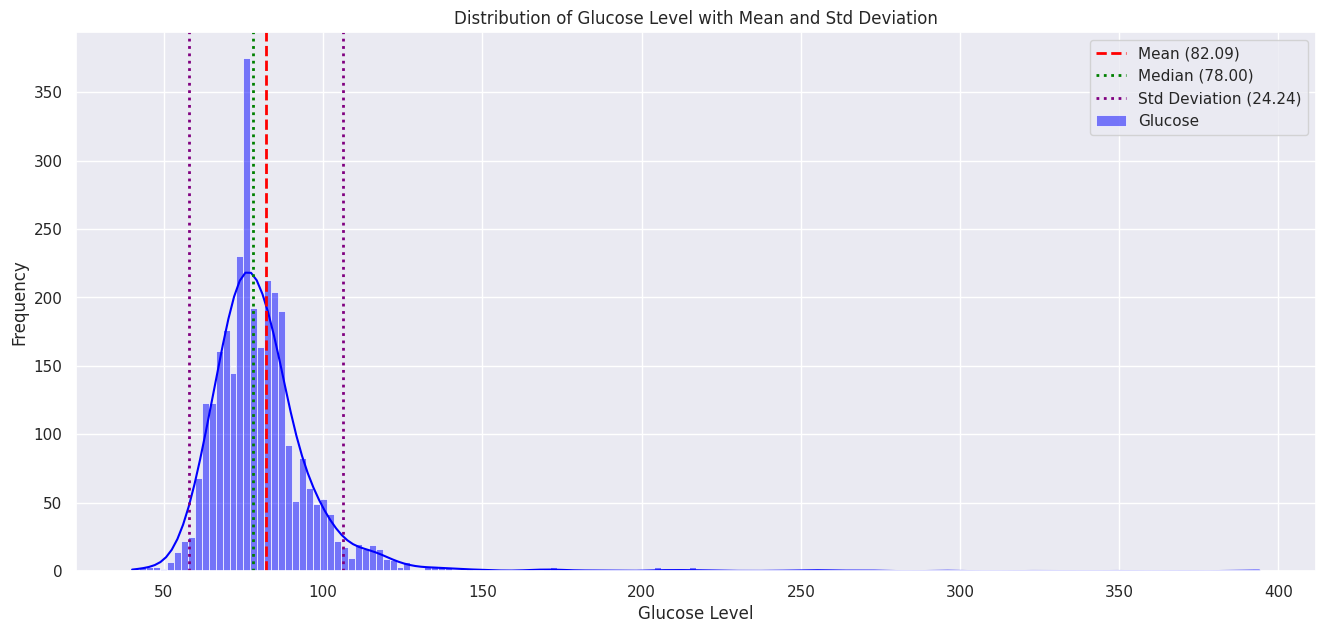

In [68]:
#  mean and standard deviation for 'glucose' before filling missing values
mean_glucose = data_2['glucose'].mean()
median_glucose = data_2['glucose'].median()
std_glucose = data_2['glucose'].std()

# Creating the displot
plt.figure(figsize=(16, 7))
sns.histplot(data_2['glucose'], kde=True, color='blue', label='Glucose')


# Adding vertical lines for mean, median, and standard deviation
plt.axvline(mean_glucose, color='red', linestyle='dashed', linewidth=2, label=f'Mean ({mean_glucose:.2f})')
plt.axvline(median_glucose, color='green', linestyle='dotted', linewidth=2, label=f'Median ({median_glucose:.2f})')
plt.axvline(mean_glucose - std_glucose, color='purple', linestyle='dotted', linewidth=2, label=f'Std Deviation ({std_glucose:.2f})')
plt.axvline(mean_glucose + std_glucose, color='purple', linestyle='dotted', linewidth=2)

# Adding legend
plt.legend()

# labels and title
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.title('Distribution of Glucose Level with Mean and Std Deviation')

plt.show()


**observation:**
*   **Before filling missing values,mean and standard deviation of glucose is 82.09 and 24.24 respectively.**

*   **The distribution of glucose is right skewed.**

In [69]:
#making copy of data_2
data_3 = data_2.copy()

In [70]:
#making object of knnimputer and fit_transform on glucose
knn = KNNImputer(n_neighbors=10,weights='distance')
data_3['glucose'] = knn.fit_transform(data_3['glucose'].values.reshape(-1,1))

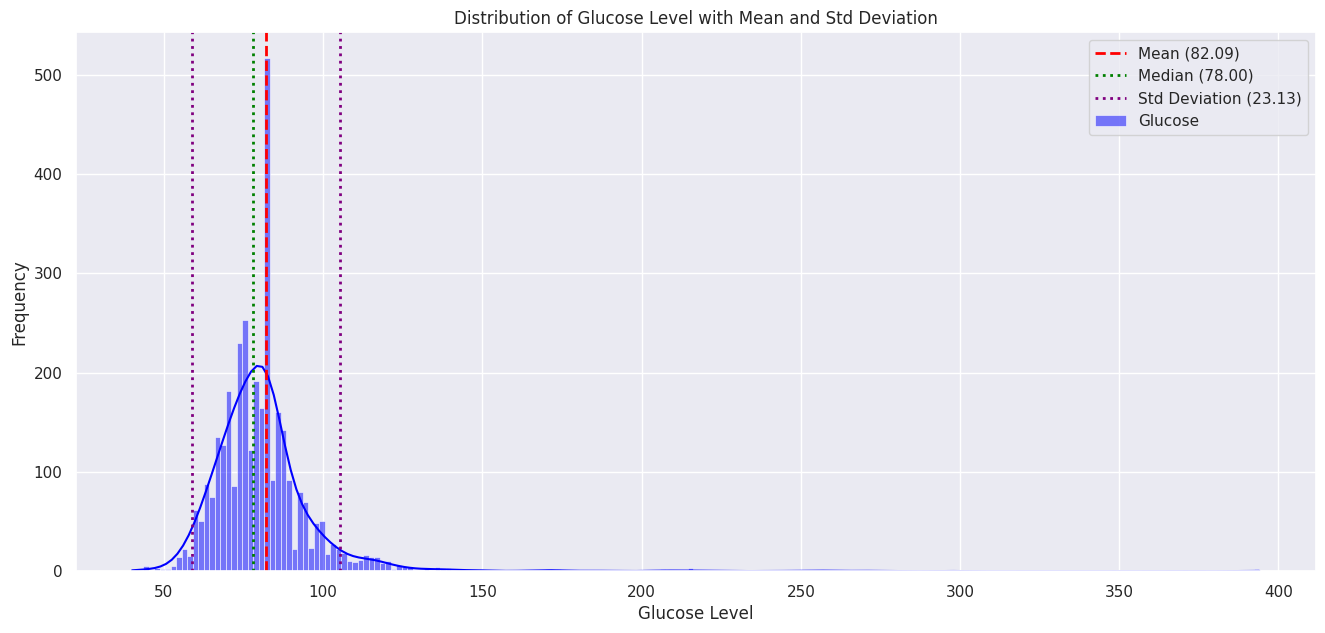

In [71]:
# mean and standard deviation for 'glucose'after filling missing values
mean_glucose = data_3['glucose'].mean()
std_glucose = data_3['glucose'].std()

# Creating the displot
plt.figure(figsize=(16, 7))
sns.histplot(data_3['glucose'], kde=True, color='blue', label='Glucose')

# Adding vertical lines for mean and standard deviation
plt.axvline(mean_glucose, color='red', linestyle='dashed', linewidth=2, label=f'Mean ({mean_glucose:.2f})')
plt.axvline(median_glucose, color='green', linestyle='dotted', linewidth=2, label=f'Median ({median_glucose:.2f})')
plt.axvline(mean_glucose - std_glucose, color='purple', linestyle='dotted', linewidth=2, label=f'Std Deviation ({std_glucose:.2f})')
plt.axvline(mean_glucose + std_glucose, color='purple', linestyle='dotted', linewidth=2)


# Adding legend
plt.legend()

#labels and title
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.title('Distribution of Glucose Level with Mean and Std Deviation')

plt.show()

**observation:**
*   **After filling missing values,mean and standard deviation of glucose is 82.09 and 23.13 respectively.**

In [72]:
#checking null values for data_3
data_3.isnull().sum()

age                  0
education            0
sex                  0
is_smoking           0
cigs_per_day         0
bp_meds              0
prevalent_stroke     0
prevalent_hyp        0
diabetes             0
total_cholesterol    0
systolic_bp          0
diastolic_bp         0
bmi                  0
heart_rate           0
glucose              0
ten_year_CHD         0
dtype: int64

In [73]:
#checking info of data_3
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3390 non-null   int64  
 1   education          3390 non-null   float64
 2   sex                3390 non-null   object 
 3   is_smoking         3390 non-null   object 
 4   cigs_per_day       3390 non-null   float64
 5   bp_meds            3390 non-null   float64
 6   prevalent_stroke   3390 non-null   int64  
 7   prevalent_hyp      3390 non-null   int64  
 8   diabetes           3390 non-null   int64  
 9   total_cholesterol  3390 non-null   float64
 10  systolic_bp        3390 non-null   float64
 11  diastolic_bp       3390 non-null   float64
 12  bmi                3390 non-null   float64
 13  heart_rate         3390 non-null   float64
 14  glucose            3390 non-null   float64
 15  ten_year_CHD       3390 non-null   int64  
dtypes: float64(9), int64(5),

In [74]:
#replacing string value with binary values 0 and 1
data_3['is_smoking'] = data_3['is_smoking'].map({'YES':1,'NO':0})

In [75]:
#getting dummy values for sex colum
df_encoded = pd.get_dummies(data_3, columns=['sex','education'], prefix=['sex','education'],drop_first=True)

In [76]:
#checking information of new df_encoded
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3390 non-null   int64  
 1   is_smoking         3390 non-null   int64  
 2   cigs_per_day       3390 non-null   float64
 3   bp_meds            3390 non-null   float64
 4   prevalent_stroke   3390 non-null   int64  
 5   prevalent_hyp      3390 non-null   int64  
 6   diabetes           3390 non-null   int64  
 7   total_cholesterol  3390 non-null   float64
 8   systolic_bp        3390 non-null   float64
 9   diastolic_bp       3390 non-null   float64
 10  bmi                3390 non-null   float64
 11  heart_rate         3390 non-null   float64
 12  glucose            3390 non-null   float64
 13  ten_year_CHD       3390 non-null   int64  
 14  sex_M              3390 non-null   uint8  
 15  education_2.0      3390 non-null   uint8  
 16  education_3.0      3390 

**Conclusion:**
*   **We have successfully imputed all missing values.now there is no null values in our new dataframe.**
*   **Also made dummy variables of sex column.**
*   **Now there is no object type column in new dataframe.**

### **Feature construction**

In [77]:
#creating new variable
df_encoded['pulse_pressure'] = df_encoded['systolic_bp'] - df_encoded['diastolic_bp']

In [78]:
#creating bins of total_cholesterol,bmi and hear_rate
df_encoded['total_cholesterol_bins']= pd.cut(df_encoded['total_cholesterol'],bins=[0,201,241,700],labels=['Low','Normal','High'],right=False)
df_encoded['bmi_bins']= pd.cut(df_encoded['bmi'],bins=[0,18.62,25.01,30.0,60.0],labels=['Under_Weight','Normal_Weight','Over_Weight','Obese'],right=False)
df_encoded['heart_rate_bins']= pd.cut(df_encoded['heart_rate'],bins=[0,60,102.0,150.0],labels=['Bradycardia','Normal_Rate','Tachycardia'],right=False)
df_encoded['glucose_bins'] = pd.cut(df_encoded['glucose'],bins = [0,71,141,200,400],labels=['Low_Sugar','Normal_Sugar','Prediabetes_sugar','Diabetes_sugar'],right=False)
df_encoded['pulse_pressure_bins'] = pd.cut(df_encoded['pulse_pressure'],bins = [0,30,60,170],labels=['Low_Pulse_Pressure','Normal_Pulse_Pressure','High_Pulse_Pressure'],right=False)

***Here i made new features from given columns:***

*   **difference between systolic and diastolic blood pressure is pulse pressure.so we have made pulse_pressure feature from systolic and diastolic blood pressure.we'll remove systolic and diastolic blood pressure.**

*   **We have categorized bmi in 4 categories.Under weight,Normal weight,Over weight and obese.we made new feature bmi_bins.we'll remove bmi column later.**

**1.   *Underweight*: BMI less than 18.5**

**2.   *Normal Weight*: BMI between 18.5 and 24.9**

**3.   *Overweight*: BMI between 25.0 and 29.9**

**4.   *Obese*: BMI of 30.0 or greater**

*   **We have categorized Total cholesterol in 3 categories.Low,Normal ,and High.we made new feature Total_cholesterol_bins.we'll remove total_cholesterol column later.**

**1.   *Low Cholesterol*: Typically, total cholesterol levels below 200 milligrams per deciliter (mg/dL) are considered low.**

**2.   *Normal Cholesterol*: Total cholesterol levels between 200 mg/dL and 239 mg/dL are often considered normal.**

**3.   *High Cholesterol*: Total cholesterol levels equal to or above 240 mg/dL are often considered high.**

*   **We have categorized heart rate in 3 categories.Bradycardia,Normal  and otachycardia.**


**1.   *Bradycardia*: Resting heart rate below 60 beats per minute (BPM). Bradycardia is a slower-than-normal heart rate.**

**2.   *Normal Resting Heart Rate*: Resting heart rate between 60 BPM and 100 BPM. This is considered the normal range for adults.**

**3.   *Tachycardia*: Resting heart rate above 100 BPM. Tachycardia is a faster-than-normal heart rate.**




In [79]:
#dropping columns
df_encoded_new = df_encoded.drop(columns=['is_smoking','total_cholesterol','systolic_bp','diastolic_bp','bmi','heart_rate','glucose','pulse_pressure'])

In [80]:
# making copy of df_encoded_new
df_final = df_encoded_new.copy()

In [81]:
# making an object of ordinal encoding
oe = OrdinalEncoder(categories=[['Low','Normal','High'],['Under_Weight','Normal_Weight','Over_Weight','Obese'],
 ['Bradycardia','Normal_Rate','Tachycardia'],['Low_Sugar','Normal_Sugar','Prediabetes_sugar','Diabetes_sugar'],
                                ['Low_Pulse_Pressure','Normal_Pulse_Pressure','High_Pulse_Pressure']])

In [82]:
# transforming 'total_cholesterol_bins','bmi_bins','heart_rate_bins'columns by applying ordinal encoding
df_final[['total_cholesterol_bins','bmi_bins','heart_rate_bins','glucose_bins','pulse_pressure_bins']] = oe.fit_transform(df_final[['total_cholesterol_bins','bmi_bins','heart_rate_bins','glucose_bins','pulse_pressure_bins']])


### **Correlation and VIF**

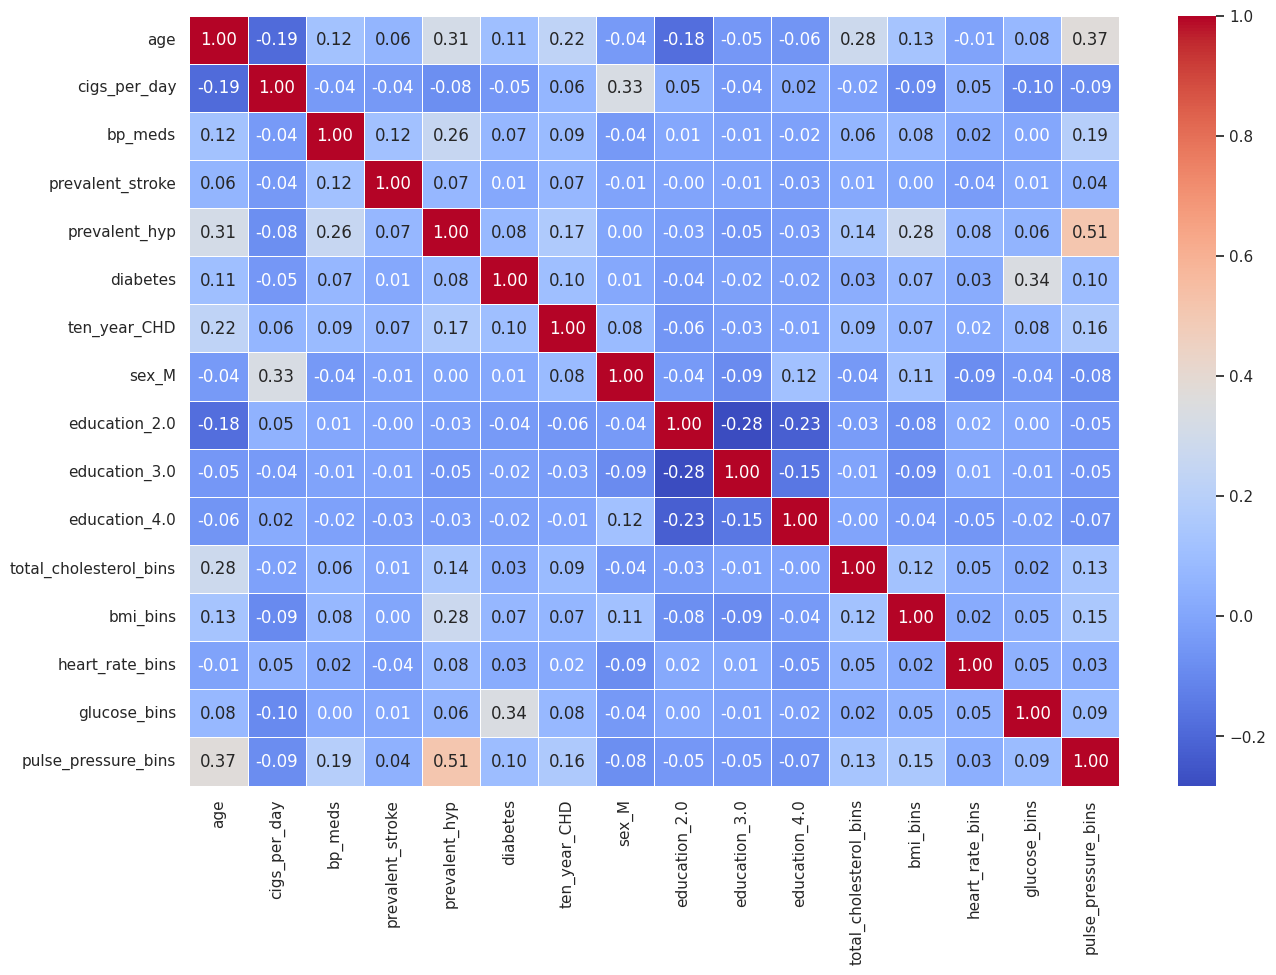

In [83]:
#ploting correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df_final.corr(),annot=True,cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

In [84]:
#calculating VIF for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(df_final.shape[1]):
    vif.append(variance_inflation_factor(df_final, i))

In [85]:
#makin dataframe of VIF
vif_df = pd.DataFrame({'vif': vif}, index=df_final.columns)
vif_df

vif
age                     23.667720
cigs_per_day             1.861131
bp_meds                  1.127579
prevalent_stroke         1.029838
prevalent_hyp            2.083564
diabetes                 1.171452
ten_year_CHD             1.272524
sex_M                    2.104515
education_2.0            1.626882
education_3.0            1.352744
education_4.0            1.242940
total_cholesterol_bins   3.905944
bmi_bins                 6.784270
heart_rate_bins         12.112414
glucose_bins             4.459056
pulse_pressure_bins     11.628265

### **Outlier Handling**

In [86]:
#defining numric column
numric_columns = df_final[['age','cigs_per_day']]

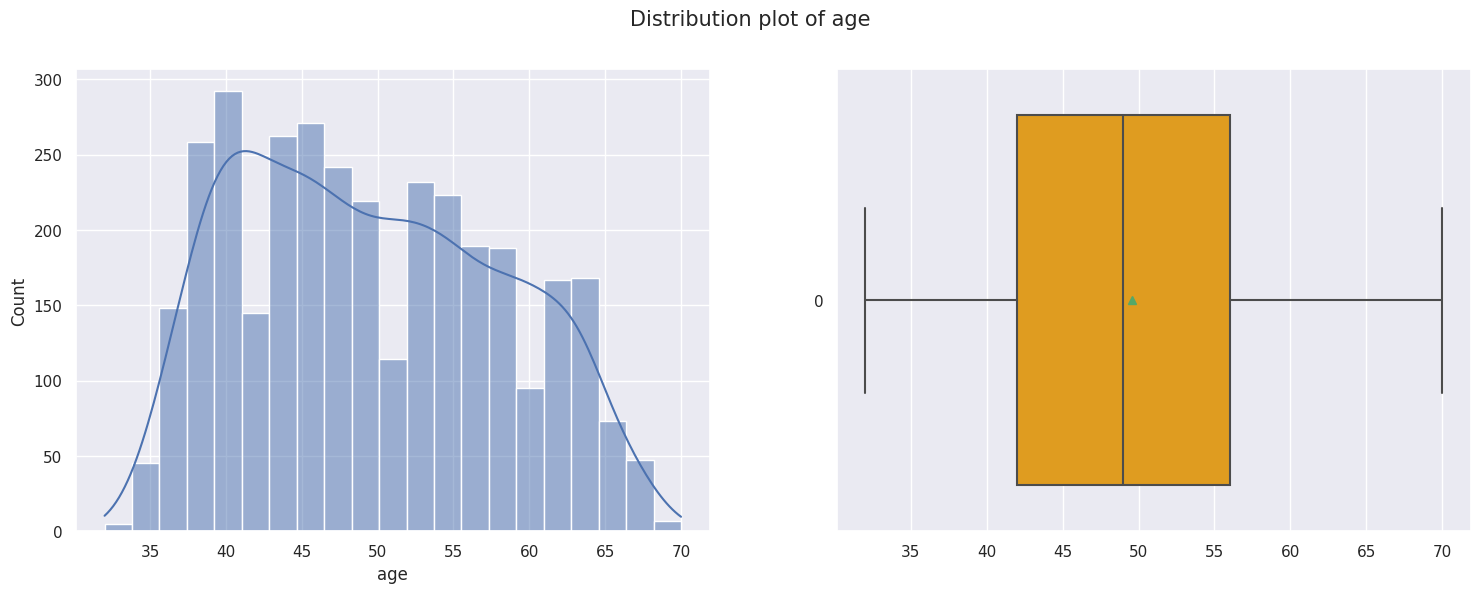

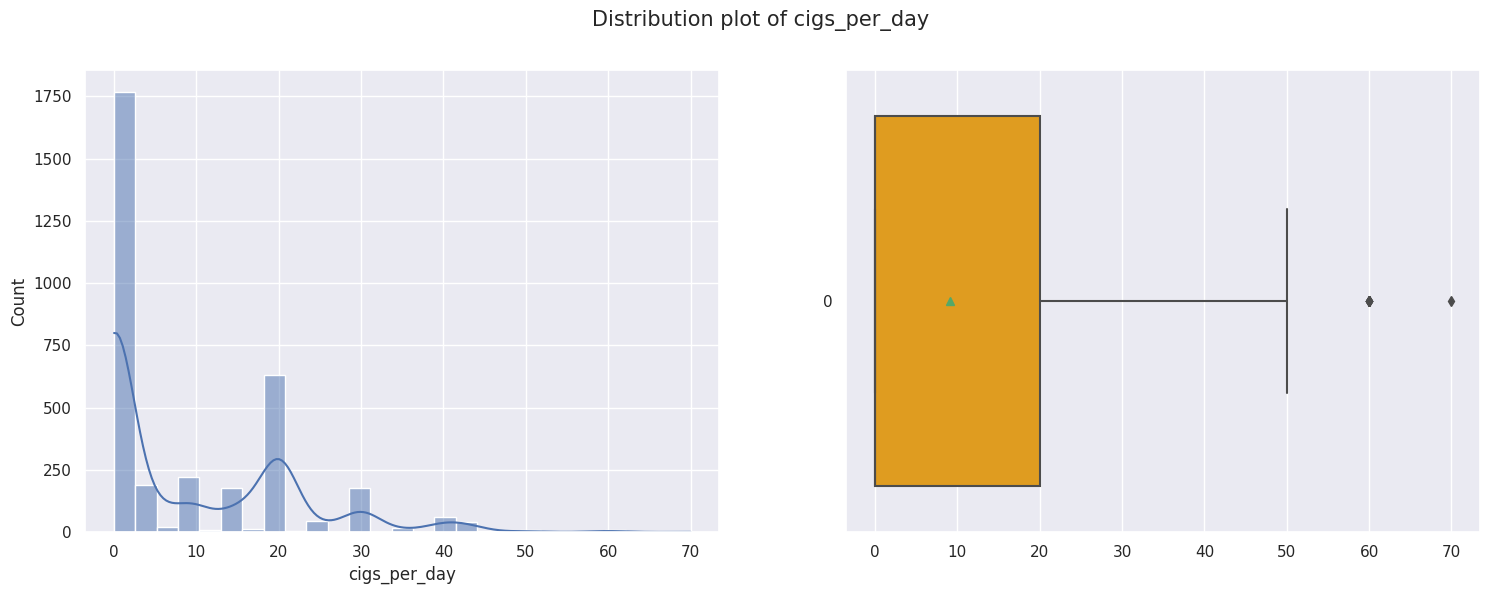

In [87]:
#plotting distribution and boxplot after removing outliers
for col in numric_columns:

  fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
  sns.histplot(df_final[col],ax=ax[0],kde=True)
  sns.boxplot(df_final[col],ax=ax[1],orient='h',showmeans=True,color='orange')
  fig.suptitle("Distribution plot of "+ col, fontsize = 15)
  plt.show()

In [88]:
#deefining inter quantile range and setting upper and lowet limit for outliers
for col in numric_columns:
  q1 = df_final[col].quantile(0.25)
  q3 = df_final[col].quantile(0.75)
  iqr = q3-q1
  lower_limit = q1-1.5*iqr
  upper_limit = q3+1.5*iqr

  df_final[col] = np.where(df_final[col]>upper_limit,upper_limit,np.where(df_final[col]<lower_limit,lower_limit,df_final[col]))

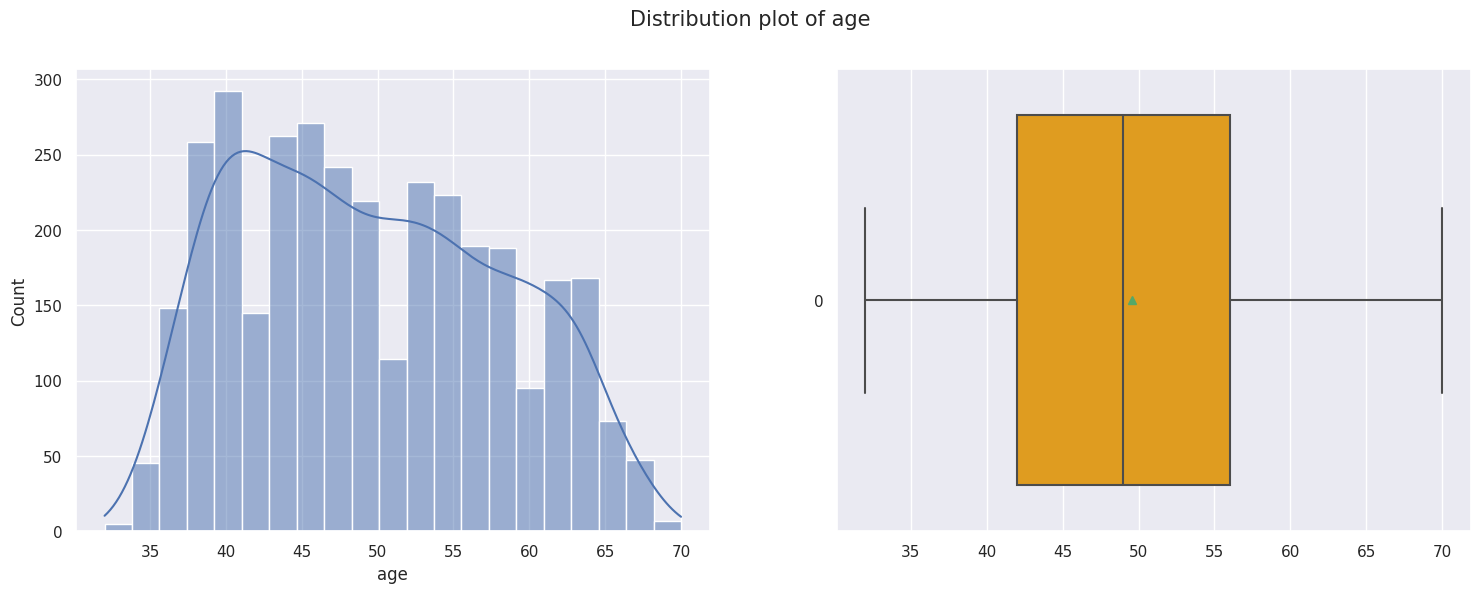

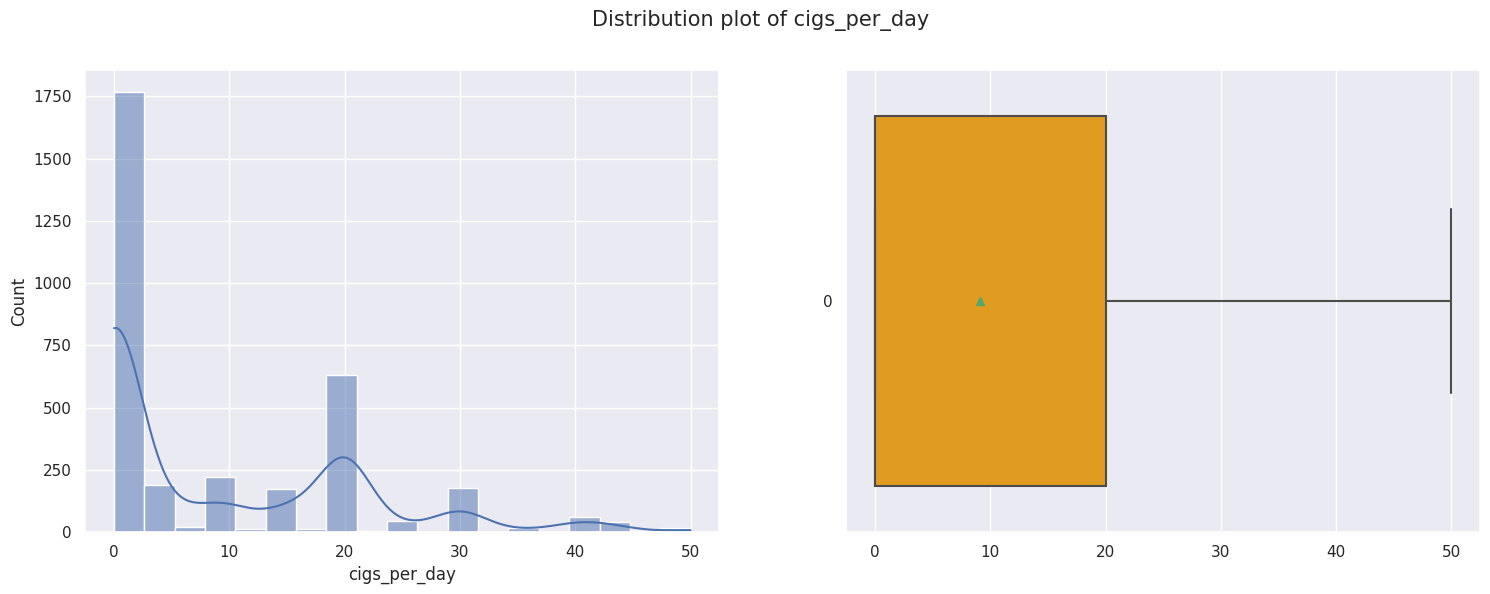

In [89]:
#plotting distribution and boxplot after removing outliers
for col in numric_columns:

  fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
  sns.histplot(df_final[col],ax=ax[0],kde=True)
  sns.boxplot(df_final[col],ax=ax[1],orient='h',showmeans=True,color='orange')
  fig.suptitle("Distribution plot of "+ col, fontsize = 15)
  plt.show()

*   **We have successfully removed outliers from continues columns.**
*   **IQR method used to deal with outliers**

### **Feature scaling**

In [90]:
#defining numerical datafram which contains continues variables
numerical = df_final[['age','cigs_per_day']]

In [91]:
#checking skewness of continues variables
numerical.skew()

age             0.225796
cigs_per_day    1.127284
dtype: float64

In [92]:
#checking skewness after log transformation on numerical columns
np.sqrt(numerical).skew(axis=0)

age             0.103528
cigs_per_day    0.449712
dtype: float64

In [93]:
#checking skewness after log transformation on numerical columns
np.log(numerical+1).skew(axis=0)

age            -0.015053
cigs_per_day    0.273181
dtype: float64

In [94]:
# Apply Box-Cox transformation to the selected numeric columns
box_cox_data = pd.DataFrame()
for col in numerical.columns:
  transformed_column,_ = stats.boxcox(numerical[col]+1)
  box_cox_data[col] = transformed_column

box_cox_data.skew()

age            -0.002964
cigs_per_day    0.193489
dtype: float64

In [95]:
# Apply yeo-johnson transformation to the selected numeric columns
yeo_johnson_data = pd.DataFrame()

for col in numerical.columns:
  transform_column,_ = stats.yeojohnson(numerical[col]+1)
  yeo_johnson_data[col] = transform_column

yeo_johnson_data.skew()


age            -0.002011
cigs_per_day    0.231158
dtype: float64

*   **We have applied different transformation on numerical columns to get normal distribution.**
*   **boxcox transformation giving best results**



In [96]:
#making copy of df_final
final_df = df_final.copy()

In [97]:
#applying boxcox transformation to all continues columns of dataframe
for col in numerical.columns:
  final_df[col],_ = stats.boxcox(final_df[col]+1)

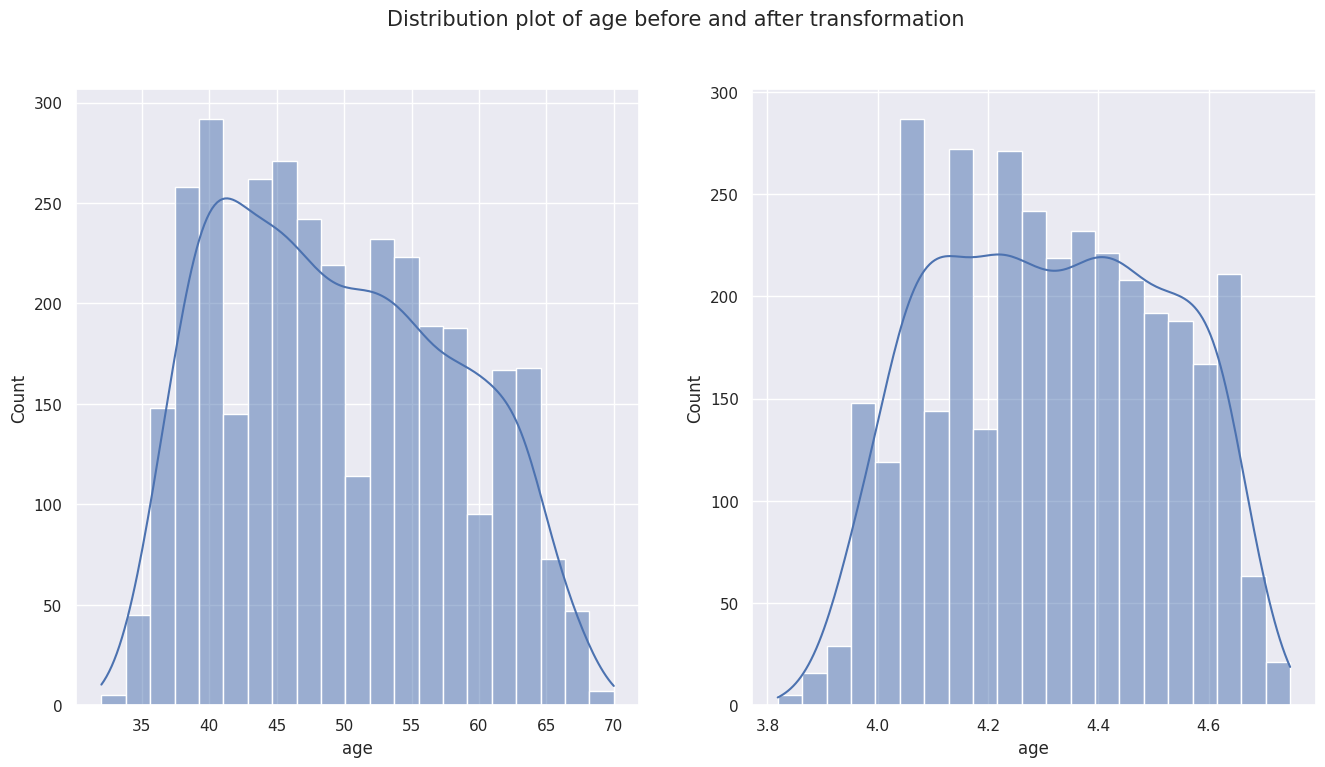

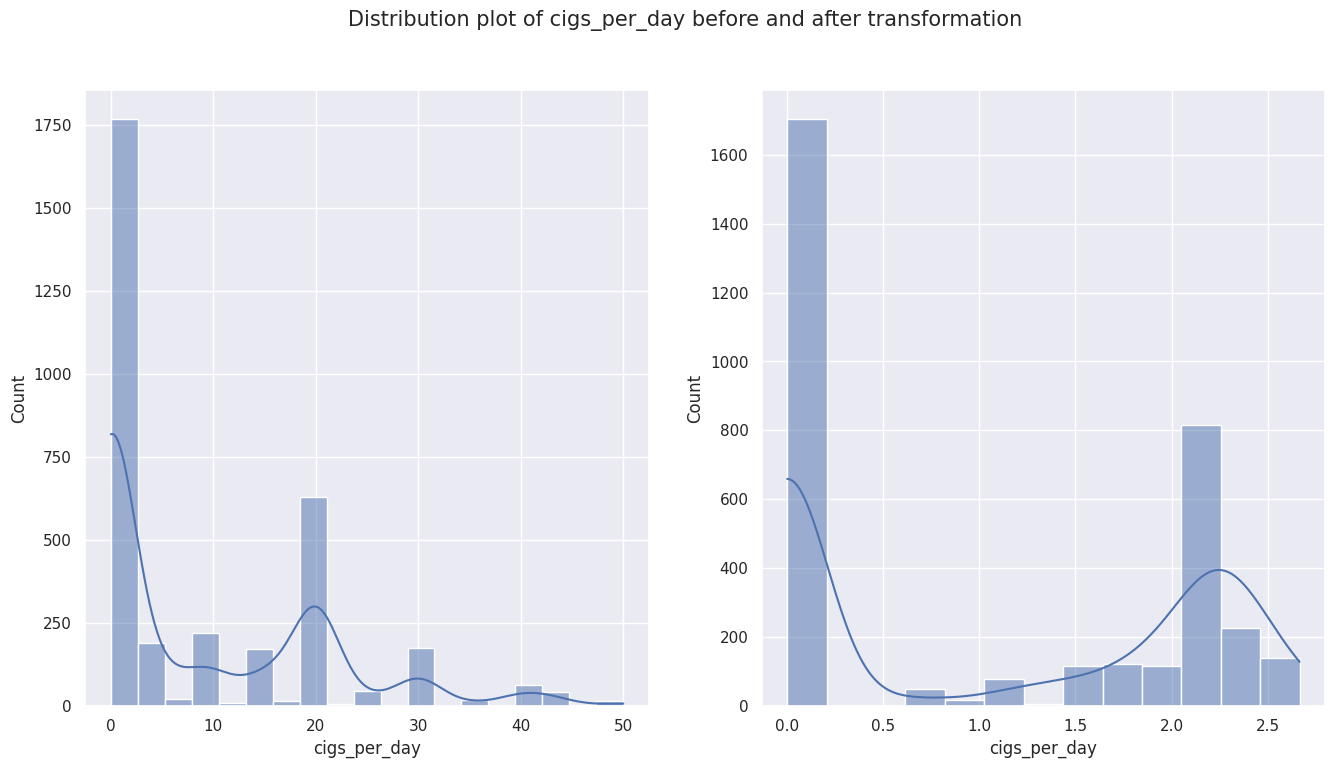

In [98]:
#plotting distribution before and after scaling
for col in numric_columns.columns:

  fig , ax = plt.subplots(nrows=1,ncols=2,figsize=(16,8))
  sns.histplot(df_final[col],kde=True,ax=ax[0])
  sns.histplot(final_df[col],kde=True,ax=ax[1])
  plt.suptitle('Distribution plot of ' + col + ' before and after transformation',fontsize=15)
  plt.show()

### **Handling Imbalanced dataset**

**Training and Testing set**

In [99]:
#defining independant and dependant variable
X = final_df.drop(columns='ten_year_CHD')
y = final_df['ten_year_CHD']

In [100]:
#making training and testing set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify = y,shuffle = True)


In [101]:
X_train.shape,X_test.shape

((2712, 15), (678, 15))

In [102]:
y_train.shape,y_test.shape

((2712,), (678,))

In [103]:
y_train.value_counts(normalize=True)

0    0.849189
1    0.150811
Name: ten_year_CHD, dtype: float64

**Observation:**
*   **it is clear that our dataset is imbalanced.**
*   **We can use SMOTE technique to balance our dataset.**

In [104]:
#making object of smote
smote = SMOTE(random_state=42)

In [105]:
#oversampling by using SMOTE
X_smote,y_smote = smote.fit_resample(X_train,y_train)

<Axes: title={'center': 'target variable before SMOTE'}>

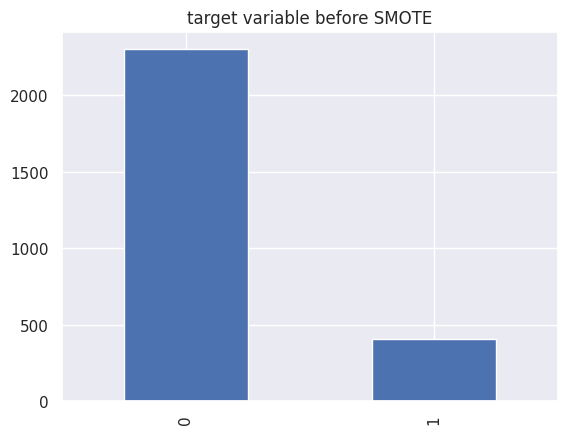

In [106]:
#visualize target variable befor smote
y_train.value_counts().plot(kind='bar',title = 'target variable before SMOTE')

<Axes: title={'center': 'target variable after SMOTE'}>

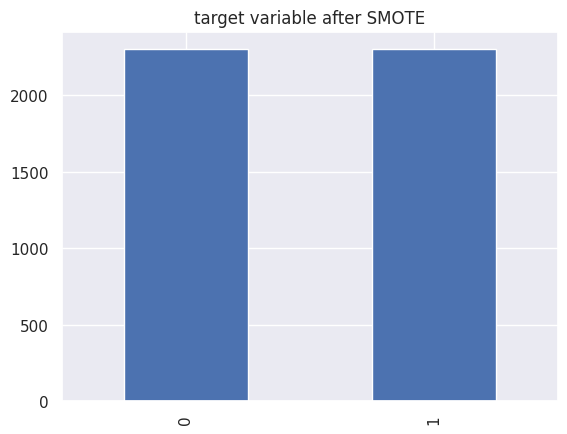

In [107]:
#visualize target variable after smote
y_smote.value_counts().plot(kind='bar',title = 'target variable after SMOTE')

*   **We have seen that our dataset was imbalanced.**
*   **We split our dataset in training and testing part.**
*   **We made smote object and fit X_train and y_train to get resample target variables.**
*   **We have successfully handled our imbalanced dataset.**
*   **Now we are ready to apply machine learning models on our dataset.**

## **Machinne Learning Model**

**Before modeling,we will keep following things in mind:**

*   **Since we are dealing with medical problem,we have to reduce false negative cases.If patient has cancer and if we predict no cancer,then it might be very dangerous for patients life.We have to be very careful about prediction.We can tolerate false positive but can't tolerate false negative cases.**

*   **Here we will focus on recall as main evaluation metrics because we don't want to classify positive cases as negative.it will be very dangerous for patients.**

*   **False negative is very crucial and dangerous in cardiovuscular risk prediction.**

*   **Recall, also known as sensitivity or true positive rate, is the ratio of true positive predictions to the total actual positives in the dataset. It is important when false negatives are costly or dangerous. In the context of cardiovascular risk prediction, recall is crucial to ensure that the model identifies as many at-risk individuals as possible, even if it means more false alarms.**

**We will make a function to ease our work.This function will return confusion matrix,ROC_AUC curve,Feature Importance horizontal barplot and  all metrics dataframe.**

In [108]:
#making a function

def get_matrics(model,X_train,y_train,X_test,y_test):
  model.fit(X_train,y_train)
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  train_accuracy = accuracy_score(y_train,y_train_pred)
  test_accuracy = accuracy_score(y_test,y_test_pred)
  precision = precision_score(y_test,y_test_pred)
  recall = recall_score(y_test,y_test_pred)
  f1 = f1_score(y_test,y_test_pred)
  train_ROC_AUC = roc_auc_score(y_train,y_train_pred)
  test_ROC_AUC = roc_auc_score(y_test,y_test_pred)
  conf_matrix_train = confusion_matrix(y_train,y_train_pred)
  conf_matrix_test = confusion_matrix(y_test,y_test_pred)

#confusion matrix plot
  plot = fig,ax = plt.subplots(1,2,figsize=(12,4))
  sns.set(font_scale=1.2)
  sns.heatmap(conf_matrix_train,fmt = 'd',cmap='magma',annot=True,xticklabels=['Negative', 'Positive'],yticklabels=['Negative', 'Positive'],ax=ax[0])
  ax[0].set_xlabel('Predicted')
  ax[0].set_ylabel('True')
  ax[0].set_title('Train Confusion Matrix')

  sns.heatmap(conf_matrix_test,fmt = 'd',cmap='magma',annot=True,xticklabels=['Negative', 'Positive'],yticklabels=['Negative', 'Positive'],ax=ax[1])
  ax[1].set_xlabel('Predicted')
  ax[1].set_ylabel('True')
  ax[1].set_title('Test Confusion Matrix')
  plt.show()


  # ROC-AUC curve
  try:

    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    roc = plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for ' + str(model))
    plt.legend(loc='lower right')
    plt.show()
  except Exception as e:
    print(f'Error while getting Roc Auc curve {e}')


  # feature importance
  try:
    try:
      feature_importance = model.feature_importances_
    except:
      feature_importance = model.coef_
    feature = np.abs(feature_importance)  #taking absolute values
    if len(feature) == len(X_train.columns): # for 1-d array
      pass
    else:
      feature = feature[0]  # for 2-D array
    series = pd.Series(feature,index=X_train.columns).sort_values(ascending=False)
    frame = pd.DataFrame({'Feature':series.index,'Important':series.values})

    importance_plot = sns.set_style("dark")
    plt.figure(figsize=(15, 6))
    sns.barplot(frame,y='Feature',x='Important',palette = 'magma')
    plt.xlabel('Importance',color='brown')
    plt.ylabel('Feature',color='brown')
    plt.yticks(color='blue')
    plt.xticks(color='blue')
    plt.title('Horizontal Bar Plot of Feature Importance for ' + str(model),color='black')
    plt.show()

  except Exception as e:
    print(f'Error while getting feature importance {e}')




  matric_dict = {'Model' : str(model),'train_accuracy' : round(train_accuracy,2),'test_accuracy' : round(test_accuracy,2),
                'precision':round(precision,2),'recall': round(recall,2),'f1_score':round(f1,2),'Train_ROC_AUC':round(train_ROC_AUC,2),
                'Test_ROC_AUC':round(test_ROC_AUC,2)}


  result = pd.DataFrame(matric_dict,index=[1])
    #conclusion_df = pd.DataFrame(result)

  return result
  return plot,roc,importance_plot



### **Logistic Regression**

In [109]:
#making an object for logistic regression
lor_model = LogisticRegression(fit_intercept=True,penalty='l1',C=0.2,solver = 'saga',max_iter=1000) #0.1  saga

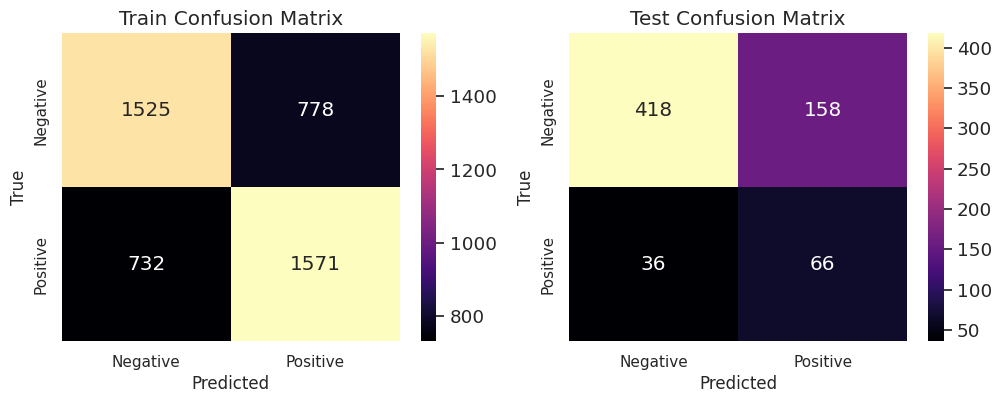

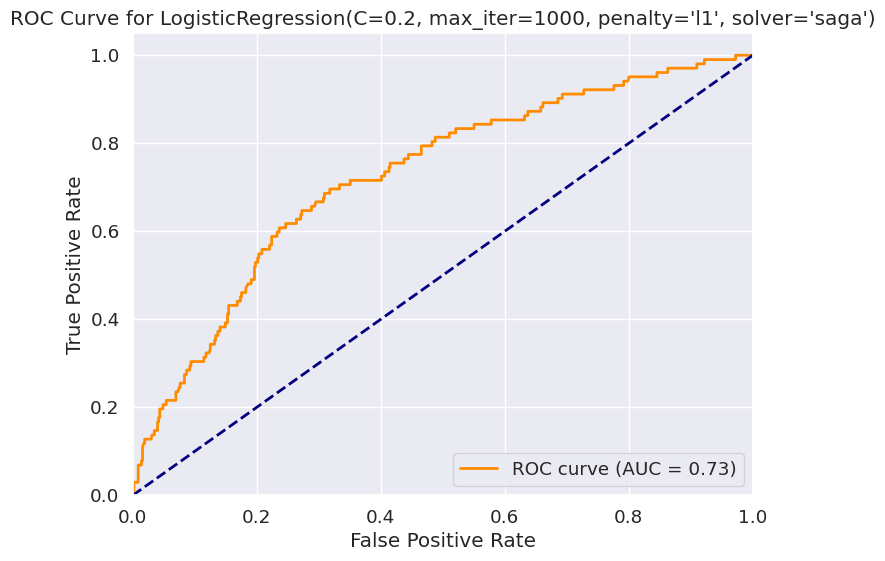

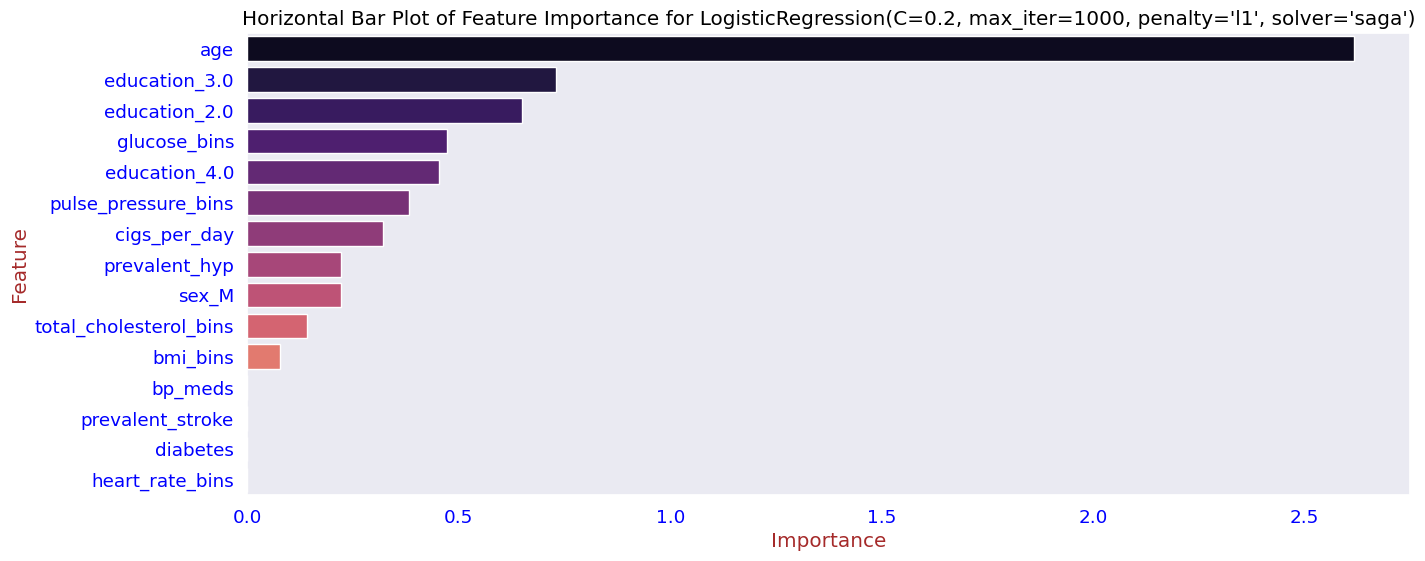

Model  train_accuracy  \
1  LogisticRegression(C=0.2, max_iter=1000, penal...            0.67   

   test_accuracy  precision  recall  f1_score  Train_ROC_AUC  Test_ROC_AUC  
1           0.71       0.29    0.65       0.4           0.67          0.69

In [110]:
#getting metrics for Logistic regression
get_matrics(lor_model,X_smote,y_smote,X_test,y_test)

### **Decision Tree**

In [111]:
#making an object for decision tree
Decision_model = DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=10, min_impurity_decrease=0.005,random_state=0)
#0.005

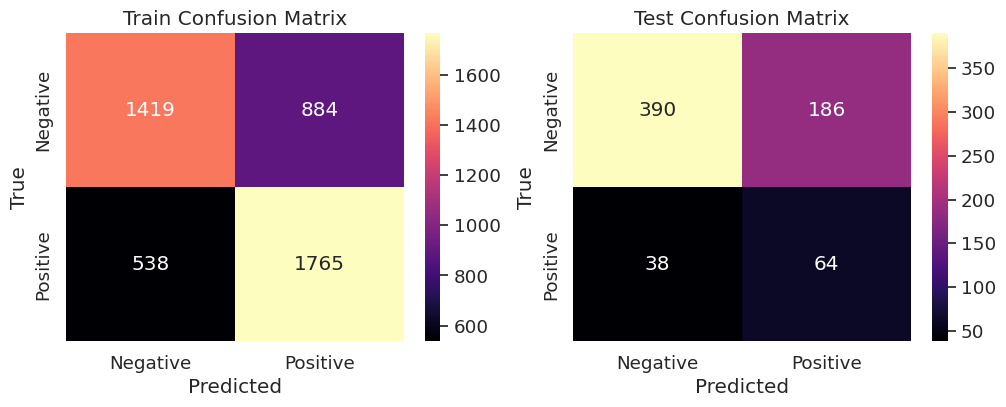

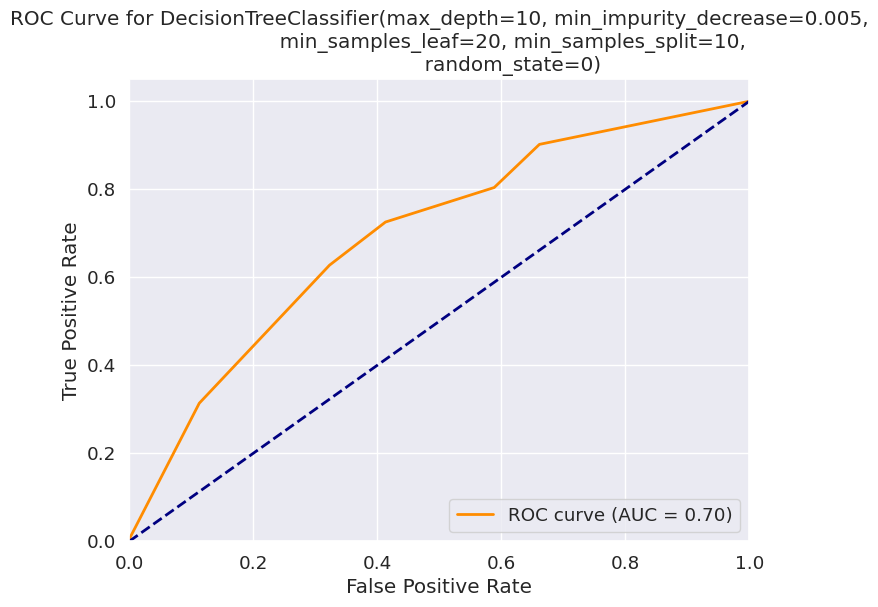

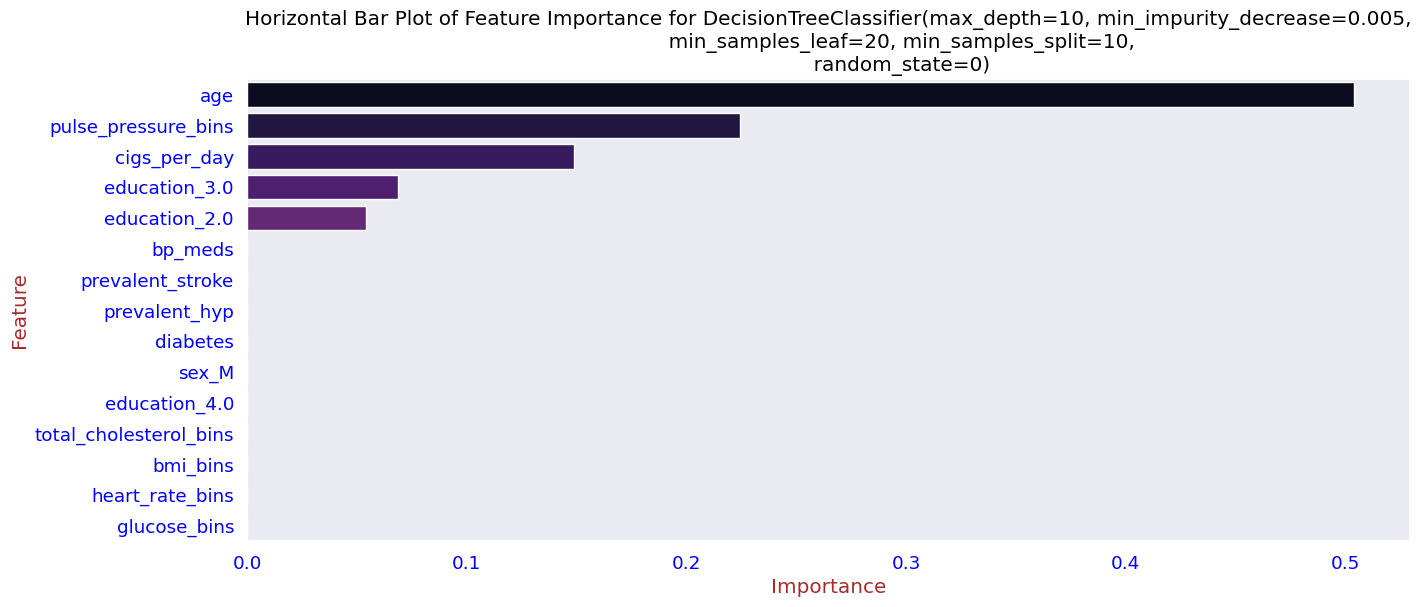

Model  train_accuracy  \
1  DecisionTreeClassifier(max_depth=10, min_impur...            0.69   

   test_accuracy  precision  recall  f1_score  Train_ROC_AUC  Test_ROC_AUC  
1           0.67       0.26    0.63      0.36           0.69          0.65

In [112]:
#getting metrics for decision tree
get_matrics(Decision_model,X_smote,y_smote,X_test,y_test)

### **K-Nearest Neighbor**

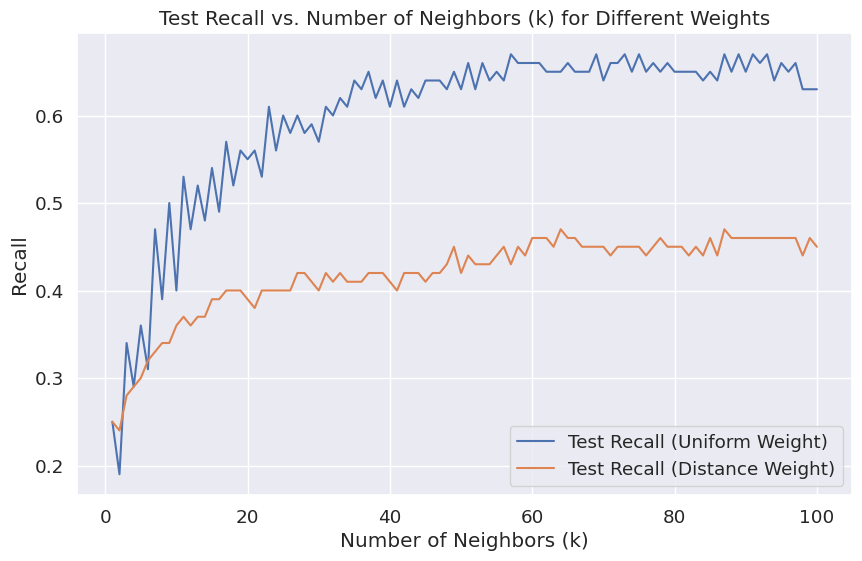

In [113]:
#definig empty lists for train and test recall for both weights
recall_uniform_train = []
recall_uniform_test = []
recall_distance_train = []
recall_distance_test = []

# lists for both weights
weights = ['uniform','distance']

#lists for k values
k_values = list(range(1,101))

for k in range(1,101):
  for weight in weights:
    model = KNeighborsClassifier(n_neighbors=k,weights=weight)
    model.fit(X_smote,y_smote)
    y_train_pred = model.predict(X_smote)
    y_test_pred = model.predict(X_test)


    recall_train = round(recall_score(y_smote,y_train_pred),2)
    recall_test = round(recall_score(y_test,y_test_pred),2)

    if weight == 'uniform':
          recall_uniform_train.append(recall_train)
          recall_uniform_test.append(recall_test)
    else:
        recall_distance_train.append(recall_train)
        recall_distance_test.append(recall_test)

# Create a plot to visualize recall values for both weights
plt.figure(figsize=(10, 6))
plt.plot(k_values, recall_uniform_test, label='Test Recall (Uniform Weight)')
plt.plot(k_values, recall_distance_test, label='Test Recall (Distance Weight)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Recall')
plt.title('Test Recall vs. Number of Neighbors (k) for Different Weights')
plt.legend()
plt.grid(True)
plt.show()




In [114]:
#checking max value of recall for both weight
print(max(recall_uniform_test))
print(max(recall_distance_test))

0.67
0.47


In [115]:
#index of max recall will be our best k
best_k = recall_uniform_test.index(max(recall_uniform_test))+1
best_k

57

**Conclusion:**

*   **Recall is maximum for 'uniform' weight**
*   **best value of k for maximum recall is 57**

In [116]:
#making an object for knn
knn= KNeighborsClassifier(n_neighbors=best_k,weights='uniform')   #35,60 uniform

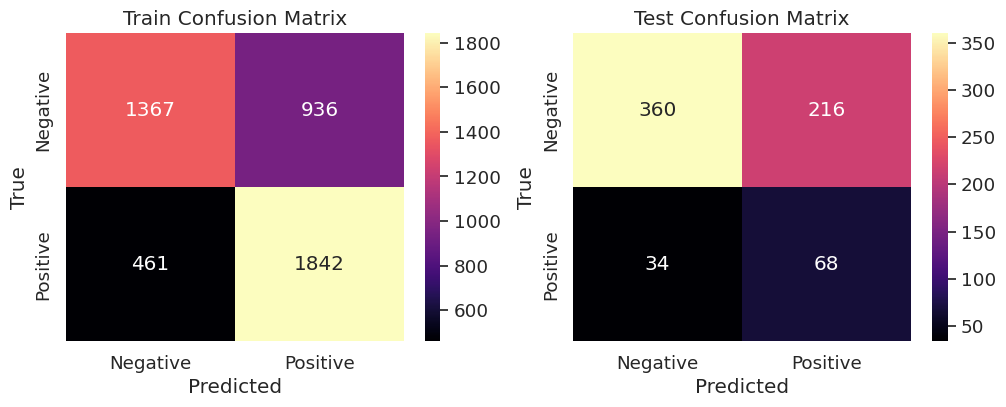

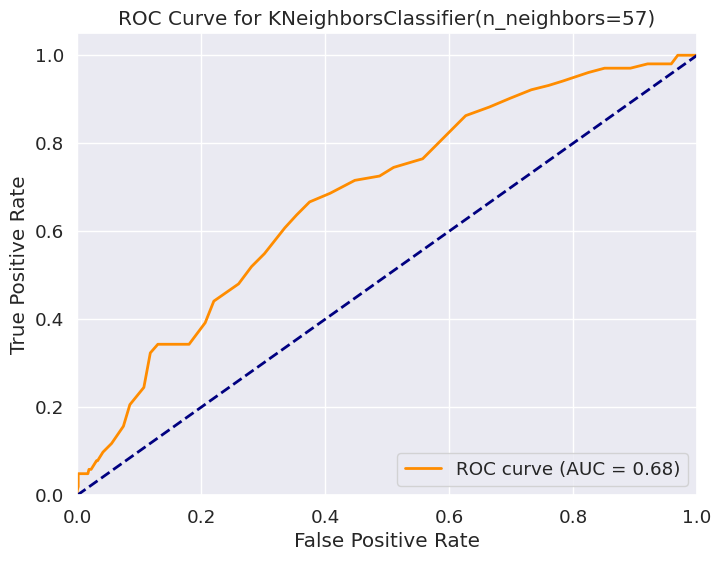

Error while getting feature importance 'KNeighborsClassifier' object has no attribute 'coef_'


Model  train_accuracy  test_accuracy  \
1  KNeighborsClassifier(n_neighbors=57)             0.7           0.63   

   precision  recall  f1_score  Train_ROC_AUC  Test_ROC_AUC  
1       0.24    0.67      0.35            0.7          0.65

In [117]:
#getting metrics for knn classifier
get_matrics(knn,X_smote,y_smote,X_test,y_test)

### **Random Forest**

In [118]:
#making an object
rf= RandomForestClassifier(n_estimators = 200 ,criterion='entropy',min_impurity_decrease=0.004,random_state=0) #0.004

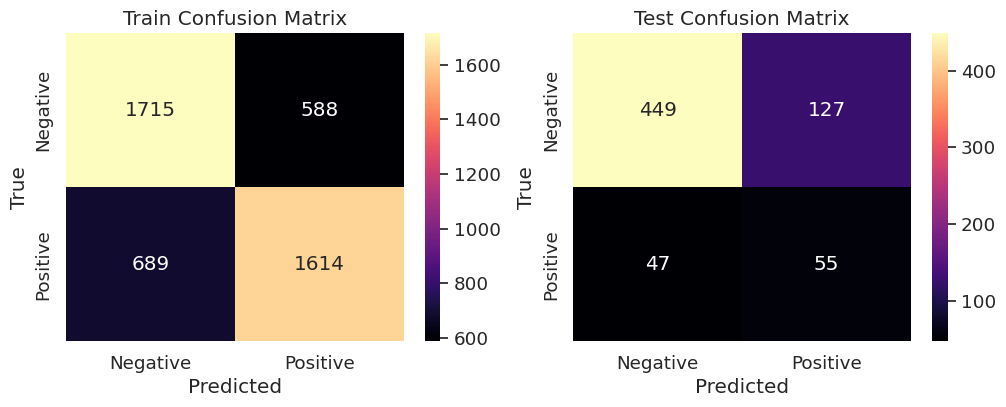

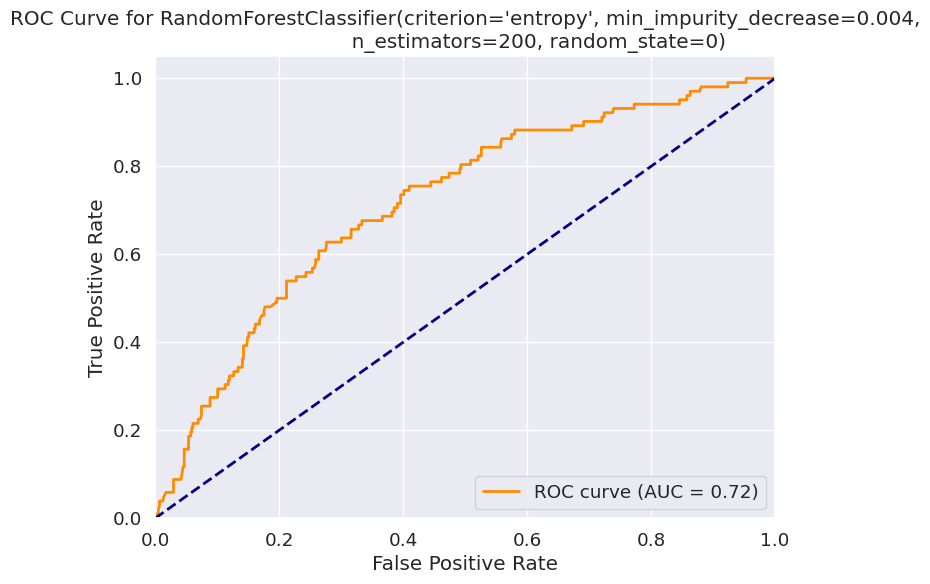

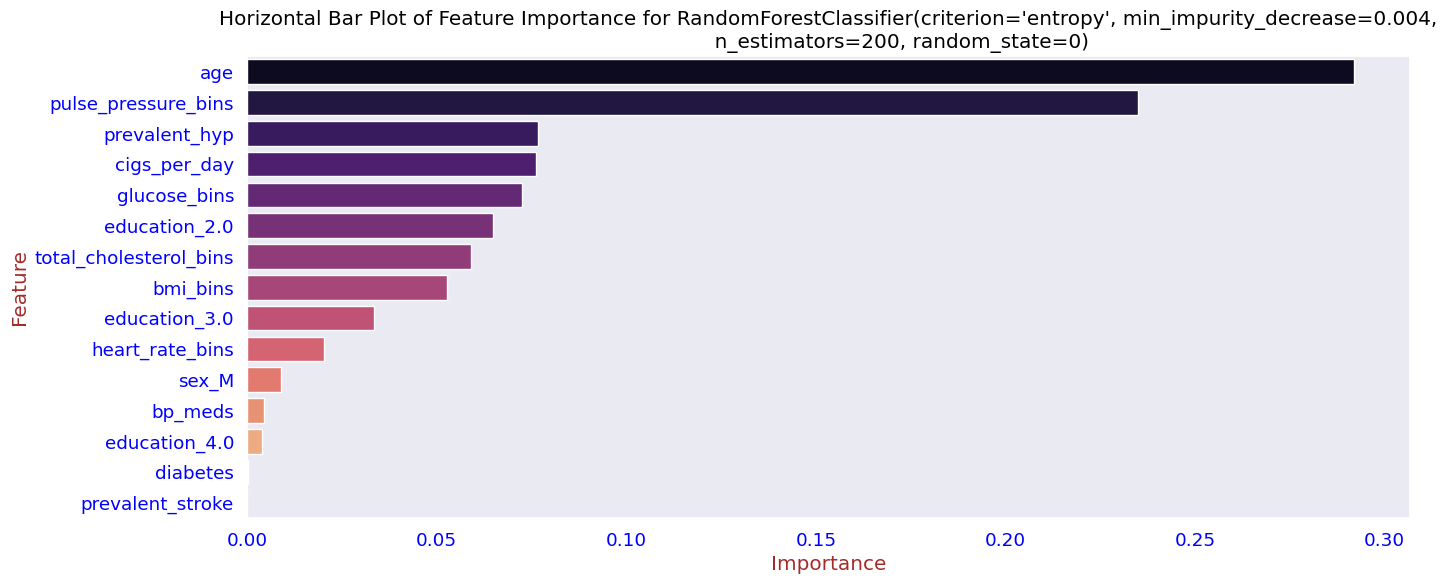

Model  train_accuracy  \
1  RandomForestClassifier(criterion='entropy', mi...            0.72   

   test_accuracy  precision  recall  f1_score  Train_ROC_AUC  Test_ROC_AUC  
1           0.74        0.3    0.54      0.39           0.72          0.66

In [119]:
#getting metrics for random forest classifier
get_matrics(rf,X_smote,y_smote,X_test,y_test)

### **Support Vector Machine**

In [120]:
#making an object of svm classifier
svc = SVC(kernel ='linear',C=0.3,probability=True,random_state=42)  #0.1      0.3(170,33)

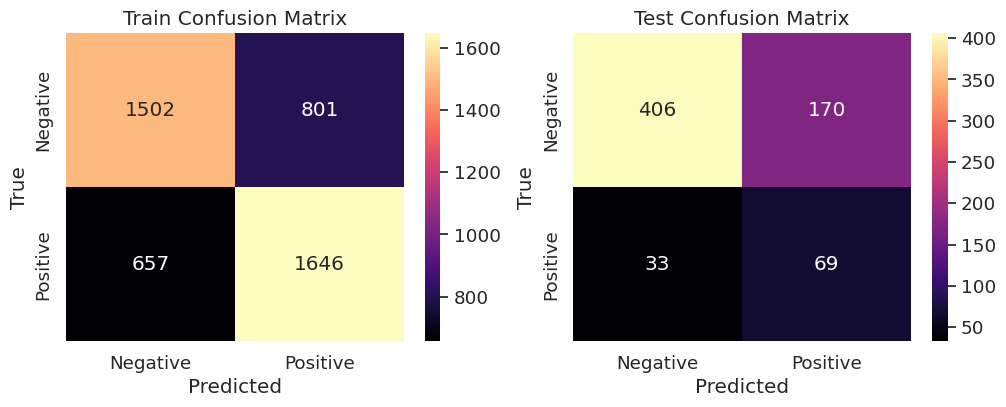

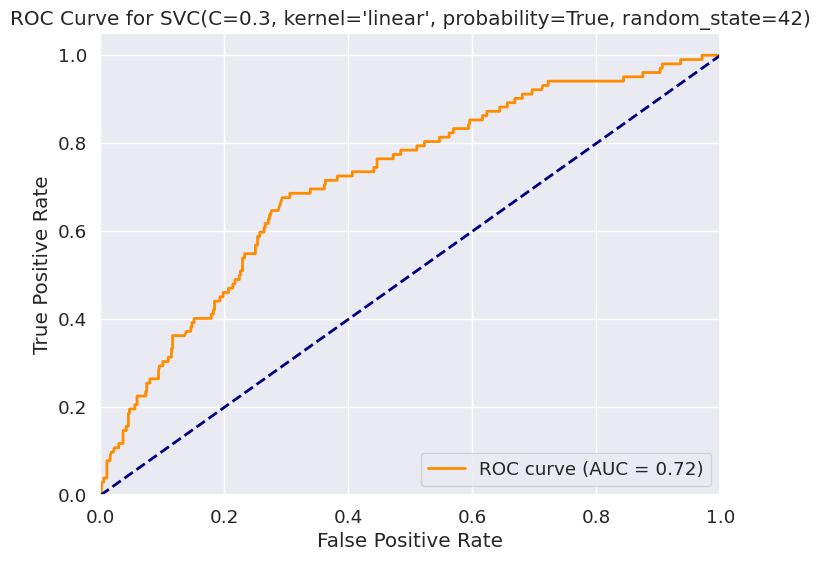

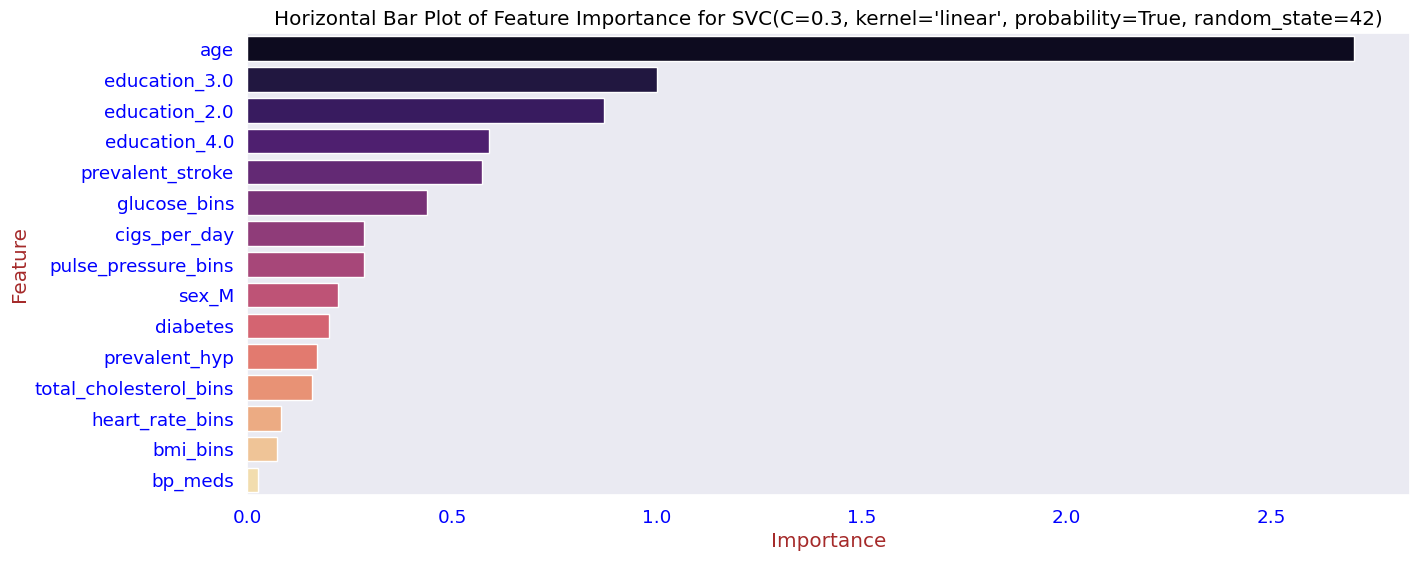

Model  train_accuracy  \
1  SVC(C=0.3, kernel='linear', probability=True, ...            0.68   

   test_accuracy  precision  recall  f1_score  Train_ROC_AUC  Test_ROC_AUC  
1            0.7       0.29    0.68       0.4           0.68          0.69

In [121]:
#getting metrics for svm classifier
get_matrics(svc,X_smote,y_smote,X_test,y_test)

### **Naive-Bayes**

In [122]:
#making an object of naivebayes Classifier
naive_bayes = GaussianNB(var_smoothing = 0.04)  #0.3 #0.04(173,43)

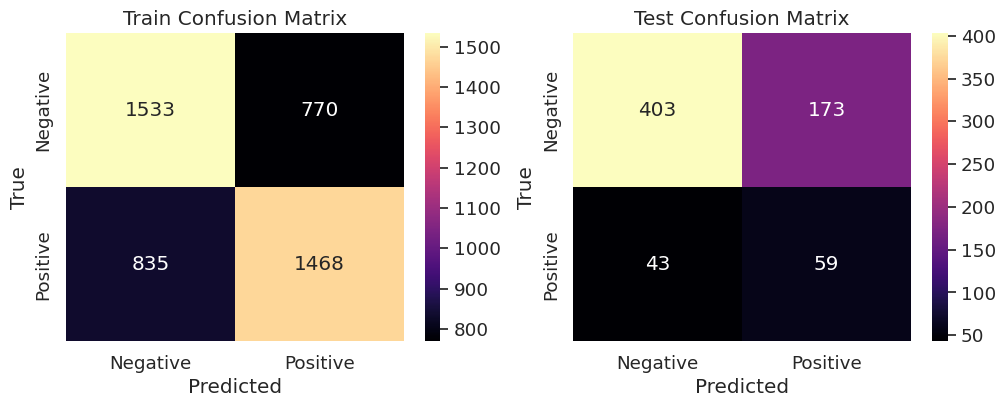

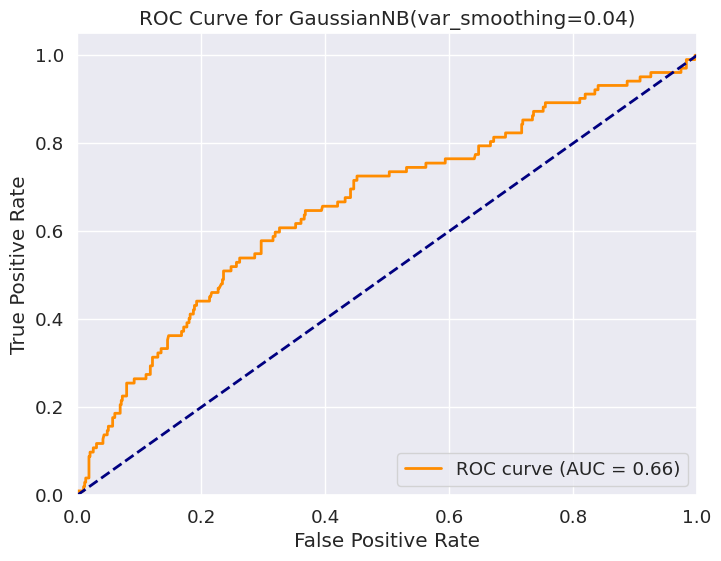

Error while getting feature importance 'GaussianNB' object has no attribute 'coef_'


Model  train_accuracy  test_accuracy  precision  \
1  GaussianNB(var_smoothing=0.04)            0.65           0.68       0.25   

   recall  f1_score  Train_ROC_AUC  Test_ROC_AUC  
1    0.58      0.35           0.65          0.64

In [123]:
#getting metrics for naive algorithm
get_matrics(naive_bayes,X_smote,y_smote,X_test,y_test)

### **Adaboost Classifier**

In [124]:
#making an object of AdaBoostClassifier
base_model = DecisionTreeClassifier(max_depth=1)
adboost = AdaBoostClassifier(estimator=base_model,n_estimators=200,learning_rate=0.1,algorithm='SAMME',random_state=42) #0.1 #0.2

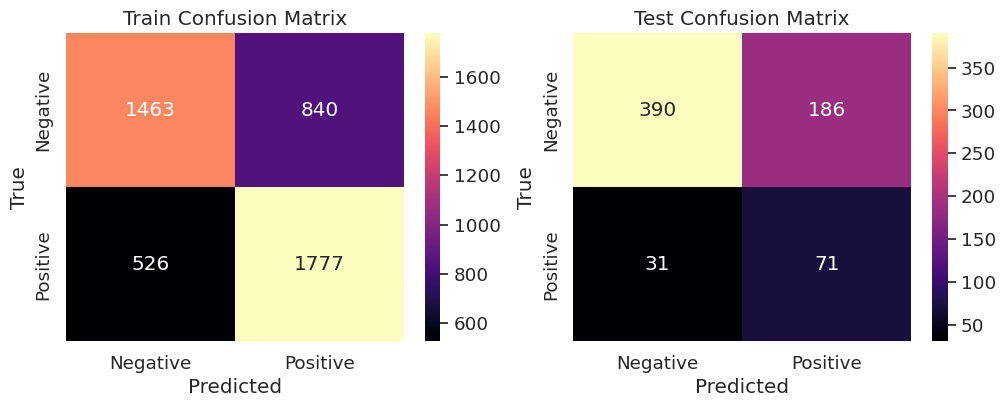

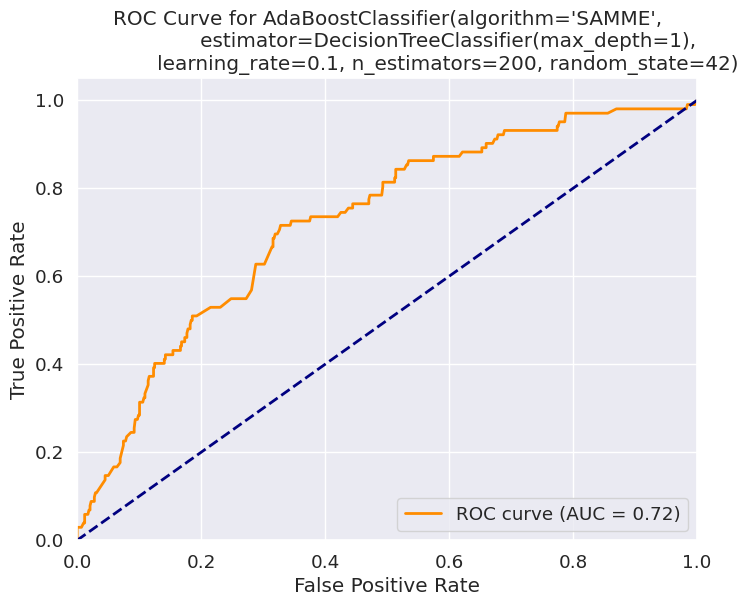

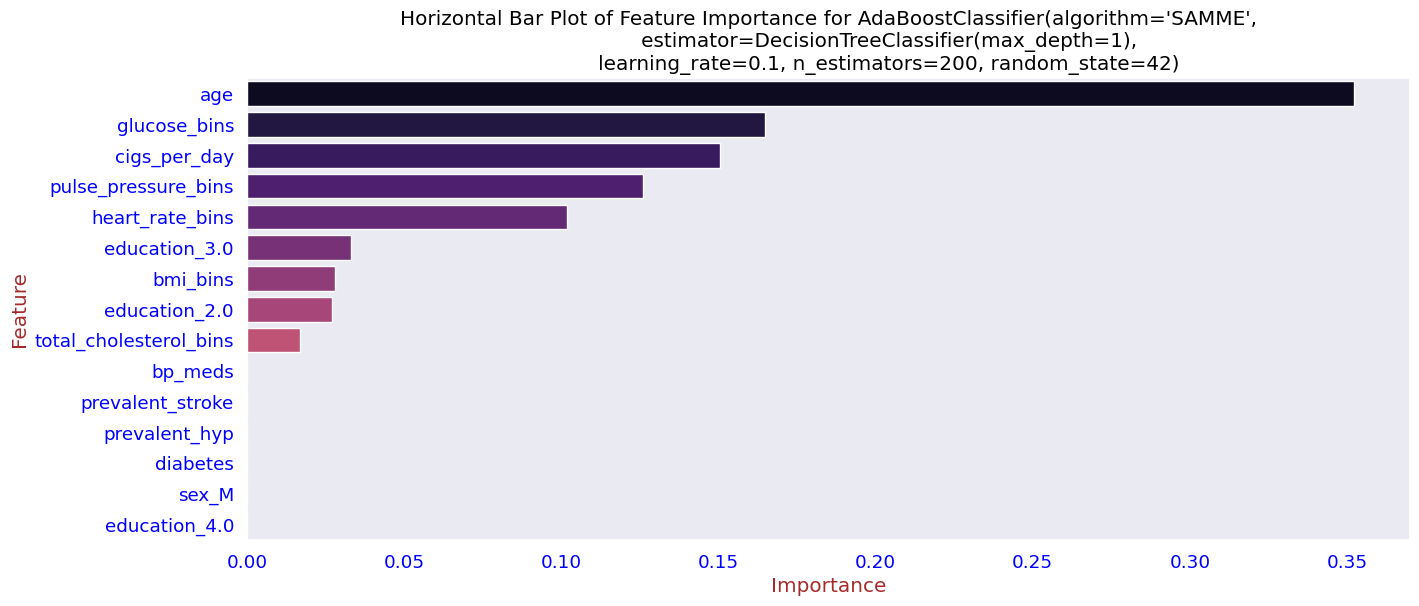

Model  train_accuracy  \
1  AdaBoostClassifier(algorithm='SAMME',\n       ...             0.7   

   test_accuracy  precision  recall  f1_score  Train_ROC_AUC  Test_ROC_AUC  
1           0.68       0.28     0.7       0.4            0.7          0.69

In [125]:
#getting metrics for AdaBoosttBoost algorithm
get_matrics(adboost,X_smote,y_smote,X_test,y_test)

### **Gradientboost**

In [126]:
#making an object of GradientBoostingClassifier
gb_boost = GradientBoostingClassifier(n_estimators=30,learning_rate=0.003,min_samples_leaf=10,max_depth=5,random_state=42)

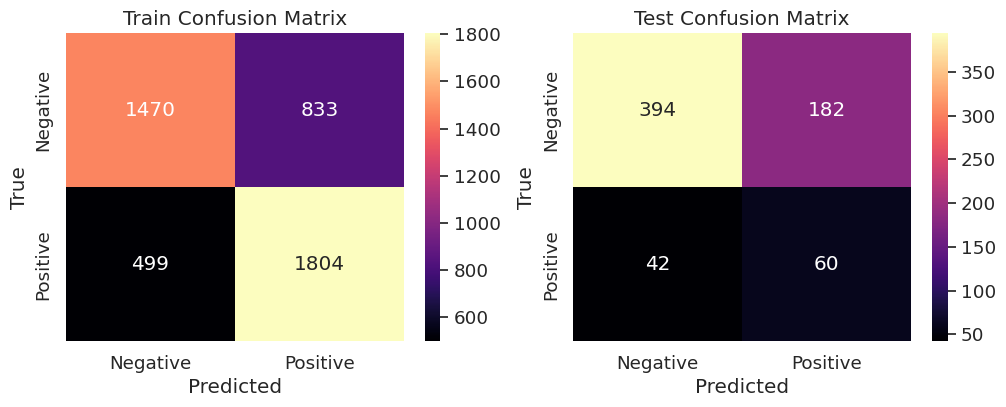

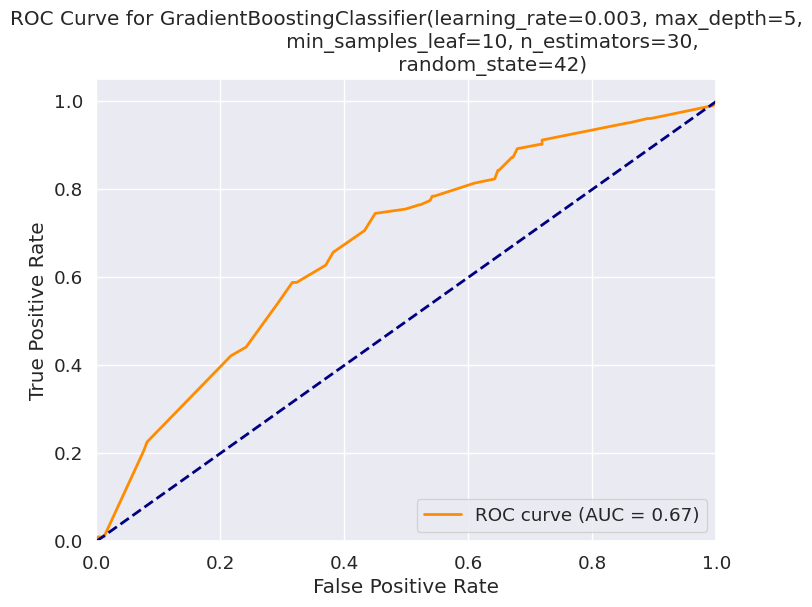

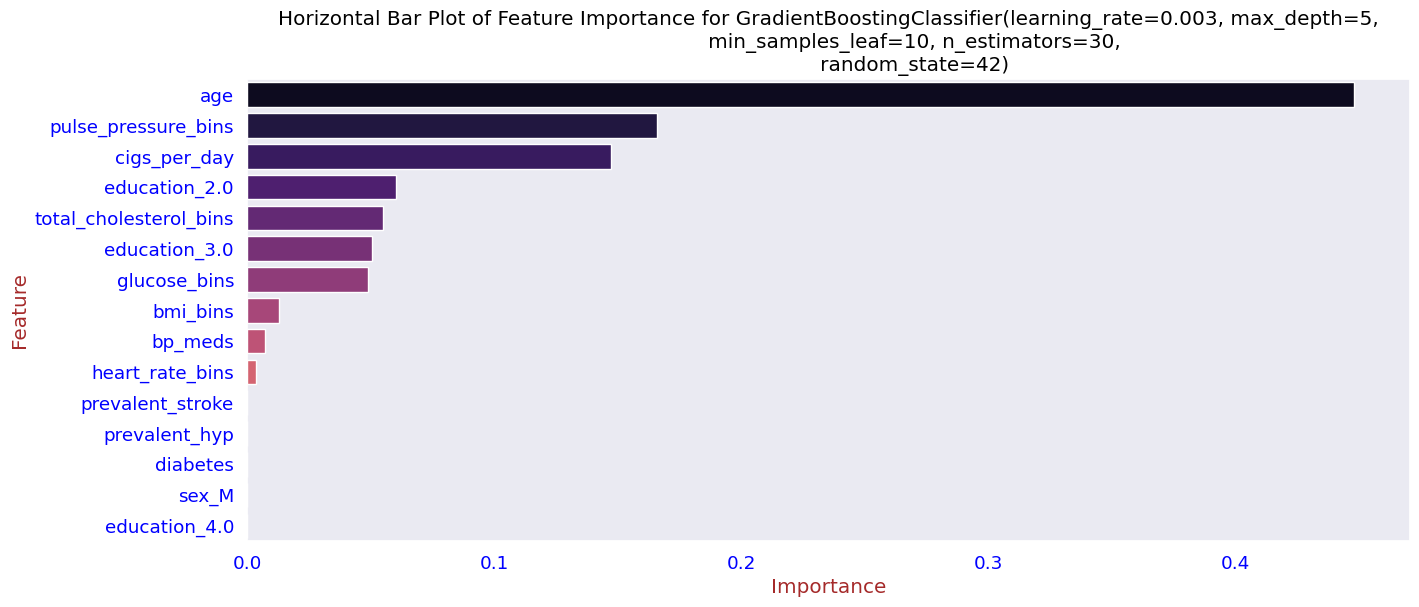

Model  train_accuracy  \
1  GradientBoostingClassifier(learning_rate=0.003...            0.71   

   test_accuracy  precision  recall  f1_score  Train_ROC_AUC  Test_ROC_AUC  
1           0.67       0.25    0.59      0.35           0.71          0.64

In [127]:
#getting metrics for GradientBoost algorithm
get_matrics(gb_boost,X_smote,y_smote,X_test,y_test)

### **XGBoost**

In [128]:
#importing XGboost
import xgboost as xgb

In [129]:
from xgboost import XGBClassifier

#making an object of XGBClassifier
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.0055,
    max_depth=3,  # 3
    random_state=42
)


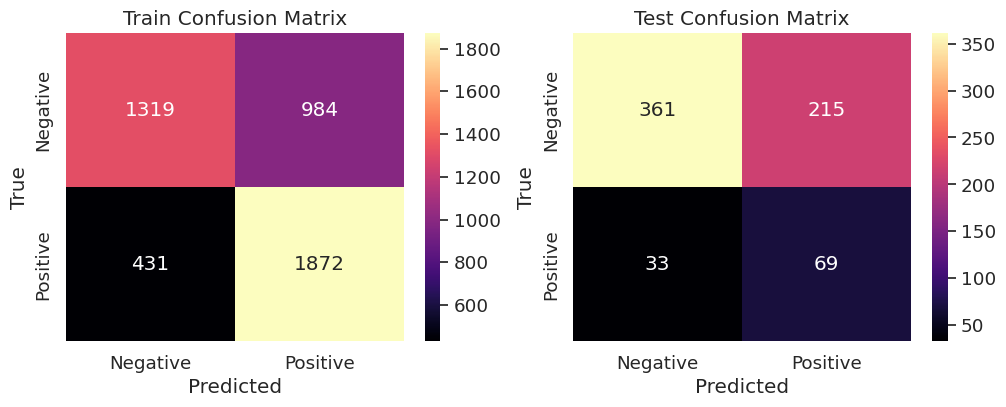

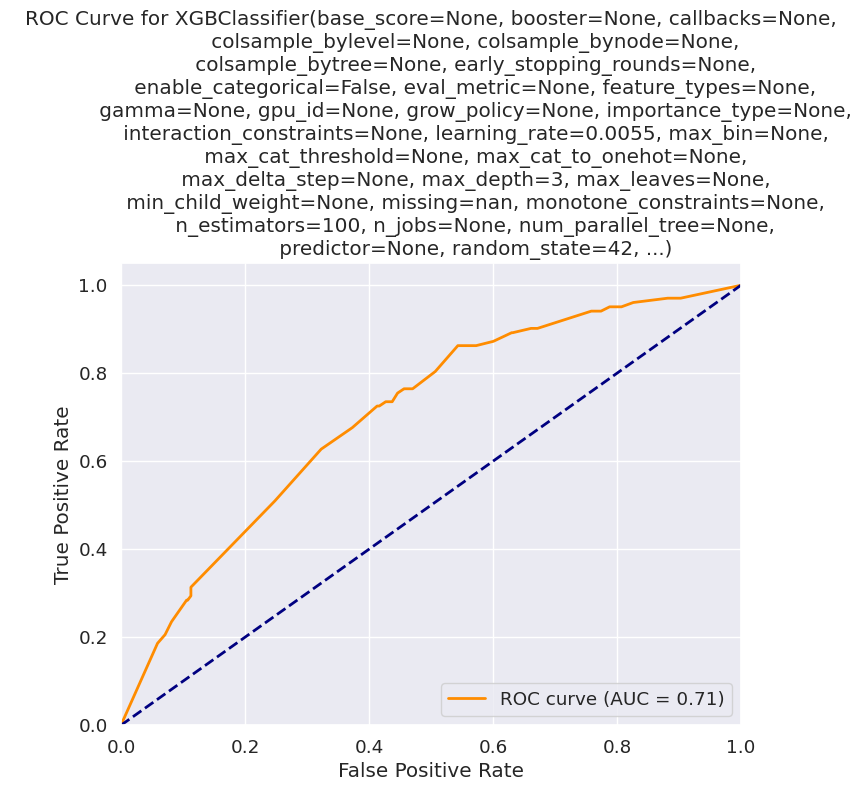

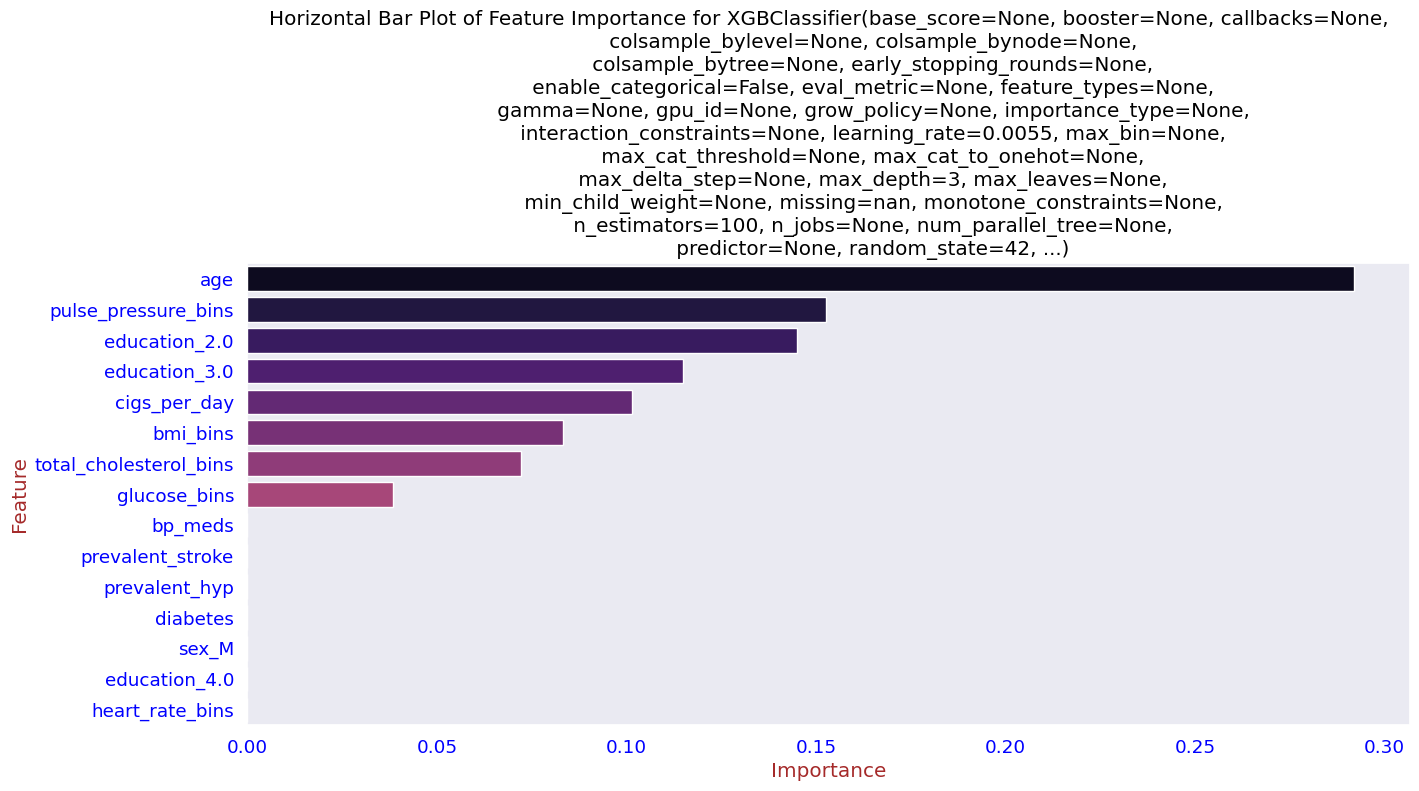

Model  train_accuracy  \
1  XGBClassifier(base_score=None, booster=None, c...            0.69   

   test_accuracy  precision  recall  f1_score  Train_ROC_AUC  Test_ROC_AUC  
1           0.63       0.24    0.68      0.36           0.69          0.65

In [130]:
#getting metrics for XGBoost algorithm
get_matrics(xgb_model,X_smote,y_smote,X_test,y_test)

### **Voting Ensemble**

In [131]:
#making base models for voting classifier
model1 = lor_model

rf2 = RandomForestClassifier(n_estimators = 300 ,criterion='entropy',min_impurity_decrease=0.05,random_state=0)
model2 = rf2

model3 = svc

model4 = xgb_model

model5 = adboost
estimators = [('lr',model1),('rf',model2),('svc',model3),('xgb',model4),('adb',model5)]

voting_new = VotingClassifier(estimators=estimators,voting='hard')

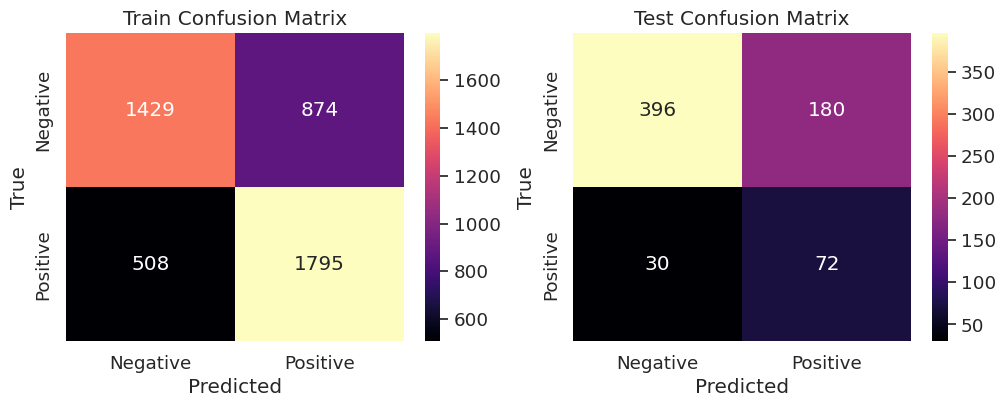

Error while getting Roc Auc curve predict_proba is not available when voting='hard'
Error while getting feature importance 'VotingClassifier' object has no attribute 'coef_'


Model  train_accuracy  \
1  VotingClassifier(estimators=[('lr',\n         ...             0.7   

   test_accuracy  precision  recall  f1_score  Train_ROC_AUC  Test_ROC_AUC  
1           0.69       0.29    0.71      0.41            0.7           0.7

In [132]:
#getting metrics for votingclassifier algorithm
get_matrics(voting_new,X_smote,y_smote,X_test,y_test)

## **Cross Validation and Hyper Parameter Tuning**

### **AdaBoost Classifier Cross validation and Hyper Parameter Tuning**

In [133]:
#defing adaboost classifier
adboost_classifier = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),random_state=True)

# Define a grid of hyperparameters to search
param_grid = {'n_estimators':[10,50,100,200,500],
              'learning_rate':[0.001,0.1,1],
              'algorithm':['SAMME', 'SAMME.R']

              }
# Create a GridSearchCV object with the AdaBoost classifier and parameter grid
grid_search = GridSearchCV(estimator = adboost_classifier,param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=-1)

#fitting on X_smote and y_smote
grid_search.fit(X_smote,y_smote)


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                          random_state=True),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.1, 1],
                         'n_estimators': [10, 50, 100, 200, 500]},
             scoring='accuracy')

In [134]:
print(f' Best Parameters for Adaboost Classifier : {grid_search.best_params_}')
best_classifier = grid_search.best_estimator_
print(f' Accuracy : {best_classifier.score(X_test,y_test)}')

 Best Parameters for Adaboost Classifier : {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 500}
 Accuracy : 0.7890855457227138


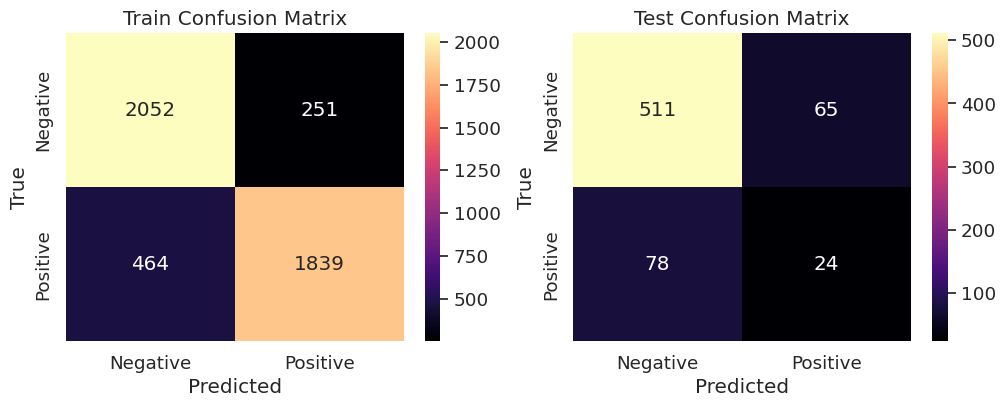

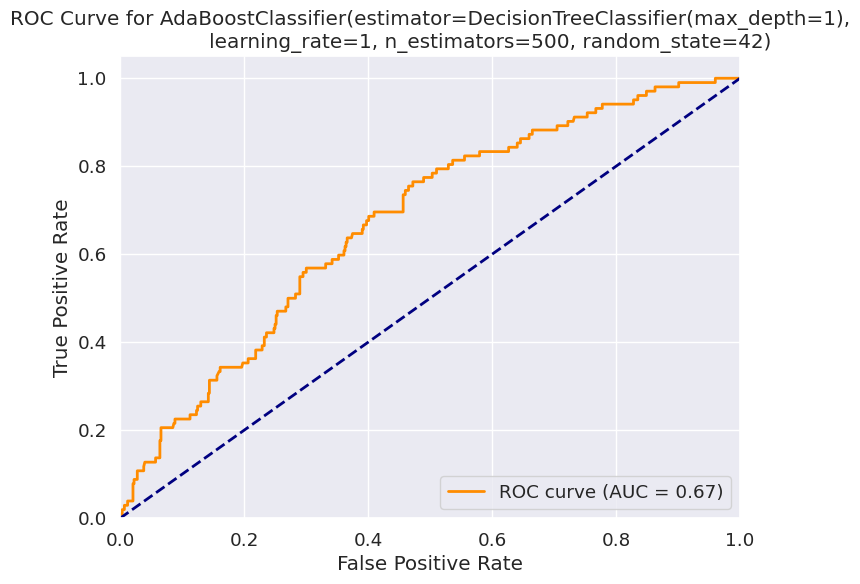

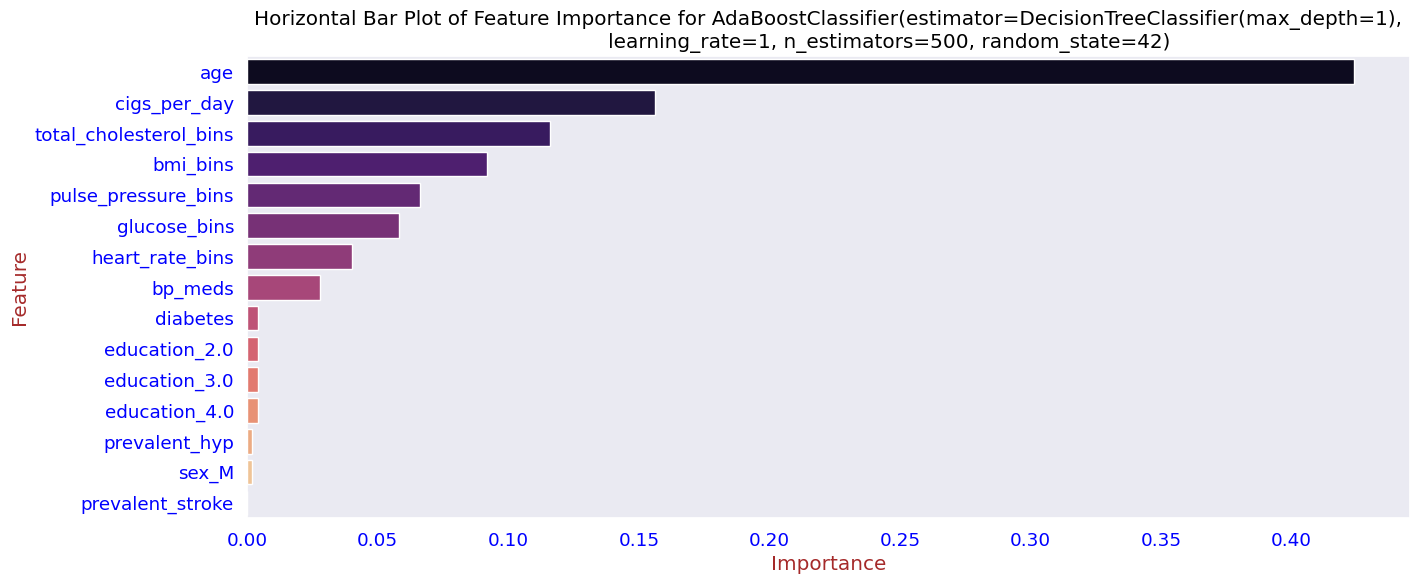

Model  train_accuracy  \
1  AdaBoostClassifier(estimator=DecisionTreeClass...            0.84   

   test_accuracy  precision  recall  f1_score  Train_ROC_AUC  Test_ROC_AUC  
1           0.79       0.27    0.24      0.25           0.84          0.56

In [135]:
base_model= DecisionTreeClassifier(max_depth=1)
adboost_tuned = AdaBoostClassifier(estimator=base_model,n_estimators=500,learning_rate=1,algorithm='SAMME.R',random_state=42)
get_matrics(adboost_tuned,X_smote,y_smote,X_test,y_test)

### **Random Forest Cross validation and Hyper Parameter Tuning**

In [136]:
#defing RandomForestClassifier classifier
random_classifier = RandomForestClassifier()

# Define a grid of hyperparameters to search
param_dist = {'n_estimators':[10,20,50,100,500],
              'criterion':['entropy','gini'],
              'max_depth': [8, 9, 10, 11, 12,13, 14, 15],
              'min_samples_split': [2, 3, 4, 5],
              'min_impurity_decrease' : [0.001,0.005,0.01,0.05,0.1,0]
              }

# Create a RandomizedSearchCV object with the RandomForestClassifier and parameter grid
random_search = RandomizedSearchCV(estimator = random_classifier,param_distributions =param_dist ,cv=5,scoring='accuracy',n_jobs=-1)

#fitting on X_smote and y_smote
random_search.fit(X_smote,y_smote)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [8, 9, 10, 11, 12, 13, 14,
                                                      15],
                                        'min_impurity_decrease': [0.001, 0.005,
                                                                  0.01, 0.05,
                                                                  0.1, 0],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [10, 20, 50, 100, 500]},
                   scoring='accuracy')

In [137]:
print(f' Best Parameters for Random Forest Classifier : {random_search.best_params_}')
best_classifier = random_search.best_estimator_
print(f' Accuracy : {random_search.score(X_test,y_test)}')

 Best Parameters for Random Forest Classifier : {'n_estimators': 20, 'min_samples_split': 3, 'min_impurity_decrease': 0.001, 'max_depth': 13, 'criterion': 'gini'}
 Accuracy : 0.7197640117994101


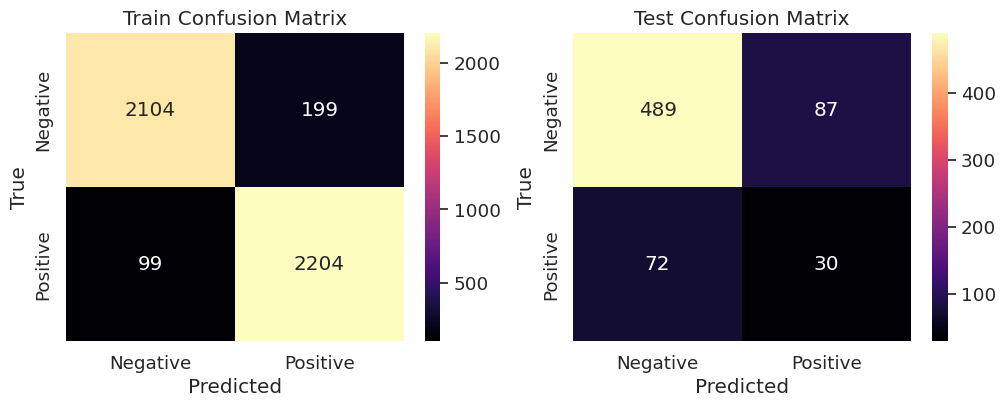

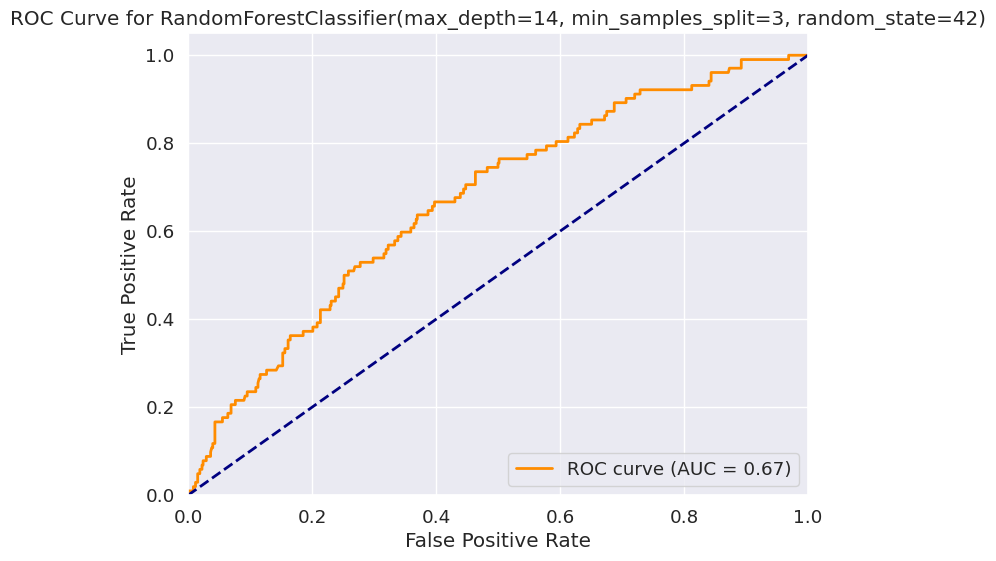

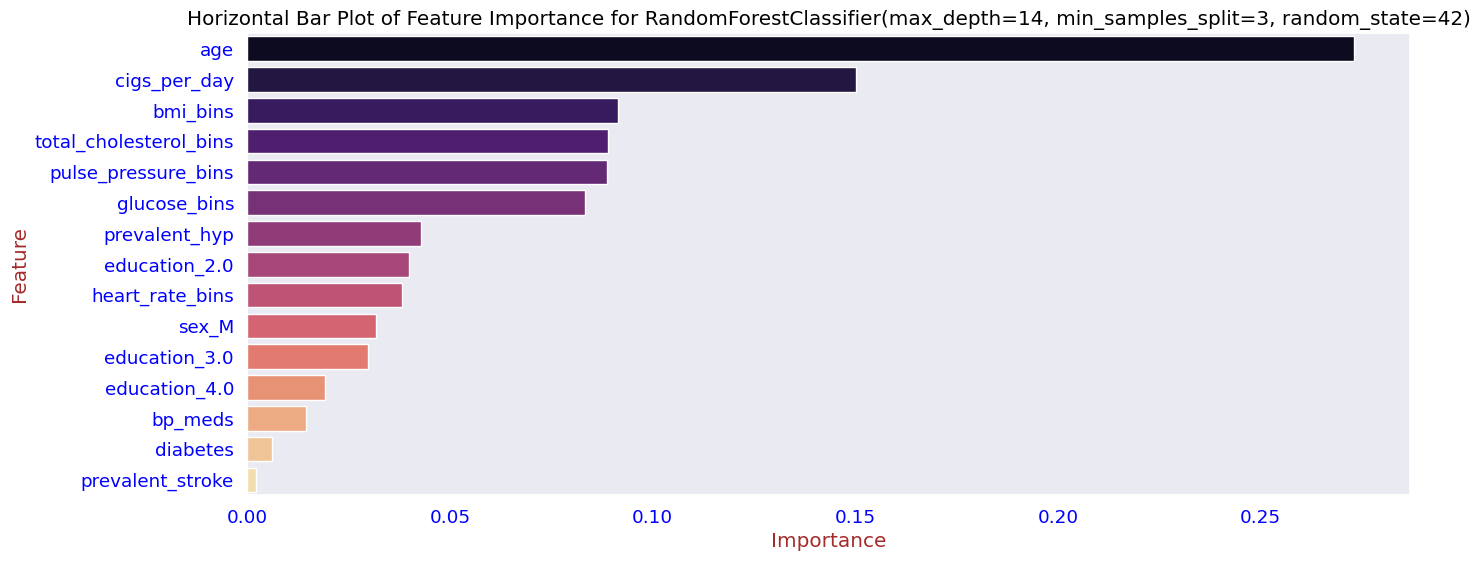

Model  train_accuracy  \
1  RandomForestClassifier(max_depth=14, min_sampl...            0.94   

   test_accuracy  precision  recall  f1_score  Train_ROC_AUC  Test_ROC_AUC  
1           0.77       0.26    0.29      0.27           0.94          0.57

In [138]:
random_forest_tuned = RandomForestClassifier(n_estimators = 100 ,criterion='gini',max_depth=14,min_samples_split=3,
                                             min_impurity_decrease=0.0,random_state=42)
get_matrics(random_forest_tuned,X_smote,y_smote,X_test,y_test)

**Conclusion:**
*  **We have performed hyperparameter tuning on Adaboost andRandom forest classifier but results are not good as accuracy increases but recall decreases.**

## **Evaluation Dataframe**

In [139]:
#defining function to get metrics dataframe
def get_matrics_dataframe(model,model_name,X_train,y_train,X_test,y_test):
  model.fit(X_train,y_train)
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  train_accuracy = accuracy_score(y_train,y_train_pred)
  test_accuracy = accuracy_score(y_test,y_test_pred)
  precision = precision_score(y_test,y_test_pred)
  recall = recall_score(y_test,y_test_pred)
  f1 = f1_score(y_test,y_test_pred)
  train_ROC_AUC = roc_auc_score(y_train,y_train_pred)
  test_ROC_AUC = roc_auc_score(y_test,y_test_pred)

  evaluation_dict_ = {'Model':model_name,
                     'Train_Accuracy':round(train_accuracy,2),'Test_Accuracy':round(test_accuracy,2),'precision':round(precision,2),
                     'Recall':round(recall,2),'F1_score':round(f1,2),'Train_ROC_AUC':round(train_ROC_AUC,2),'Test_ROC_AUC':round(test_ROC_AUC,2)
                     }
  result_df =  pd.DataFrame([evaluation_dict_])

  return result_df


In [140]:
#storing each model's metrics in dataframe
lor_df = get_matrics_dataframe(lor_model,'LogisticRegression',X_smote,y_smote,X_test,y_test)
dt_df = get_matrics_dataframe(Decision_model,'DecisionTreeClassifier',X_smote,y_smote,X_test,y_test)
knn_df = get_matrics_dataframe(knn,'KNeighborsClassifier',X_smote,y_smote,X_test,y_test)
rf_df = get_matrics_dataframe(rf,'RandomForestClassifier',X_smote,y_smote,X_test,y_test)
svm_df = get_matrics_dataframe(svc,'Support Vector machine',X_smote,y_smote,X_test,y_test)
naive_df = get_matrics_dataframe(naive_bayes,'Naive-Bayes',X_smote,y_smote,X_test,y_test)
voting_df = get_matrics_dataframe(voting_new,'VotingClassifier',X_smote,y_smote,X_test,y_test)
adaboost_df = get_matrics_dataframe(adboost,'AdaBoostClassifier',X_smote,y_smote,X_test,y_test)
gradient_boost_df = get_matrics_dataframe(gb_boost,'GradientBoostingClassifier',X_smote,y_smote,X_test,y_test)
xgb_df = get_matrics_dataframe(xgb_model,'XGBClassifier',X_smote,y_smote,X_test,y_test)
adaboost_tuned_df = get_matrics_dataframe(adboost_tuned,'AdaBoost Tuned',X_smote,y_smote,X_test,y_test)
rf_tuned_df = get_matrics_dataframe(random_forest_tuned,'Random Forest Tuned',X_smote,y_smote,X_test,y_test)


In [141]:
#defining list of metrics dataframe
conclusion_list = [lor_df,dt_df,knn_df,rf_df,svm_df,naive_df,voting_df,adaboost_df,gradient_boost_df,xgb_df,adaboost_tuned_df,rf_tuned_df]

In [142]:
#concatinaating all dataframe
conclusion_dataframe = pd.concat(conclusion_list,ignore_index=True)
conclusion_dataframe

Model  Train_Accuracy  Test_Accuracy  precision  \
0           LogisticRegression            0.67           0.71       0.29   
1       DecisionTreeClassifier            0.69           0.67       0.26   
2         KNeighborsClassifier            0.70           0.63       0.24   
3       RandomForestClassifier            0.72           0.74       0.30   
4       Support Vector machine            0.68           0.70       0.29   
5                  Naive-Bayes            0.65           0.68       0.25   
6             VotingClassifier            0.70           0.69       0.29   
7           AdaBoostClassifier            0.70           0.68       0.28   
8   GradientBoostingClassifier            0.71           0.67       0.25   
9                XGBClassifier            0.69           0.63       0.24   
10              AdaBoost Tuned            0.84           0.79       0.27   
11         Random Forest Tuned            0.94           0.77       0.26   

    Recall  F1_score  Train_ROC_AUC  Test_ROC_AUC  
0     0.65      0.40           0.67          0.69  
1     0.63      0.36           0.69          0.65  
2     0.67      0.35           0.70          0.65  
3     0.54      0.39           0.72          0.66  
4     0.68      0.40           0.68          0.69  
5     0.58      0.35           0.65          0.64  
6     0.71      0.41           0.70          0.70  
7     0.70      0.40           0.70          0.69  
8     0.59      0.35           0.71          0.64  
9     0.68      0.36           0.69          0.65  
10    0.24      0.25           0.84          0.56  
11    0.29      0.27           0.94          0.57

**Observation:**
*   **As we know recall is our main evaluation metric.**
*   **Voting Classifier is the best performing among all the models.**
*   **Voting Classifier has also highest test_ROC_AUC.**
*   **Naive-Bayes,Logistic regression and Gradientboost classifier also performoing very well in terms of recall and ROC_AUC.**

## **Finding Best model**

### **Test Accuracy plot**

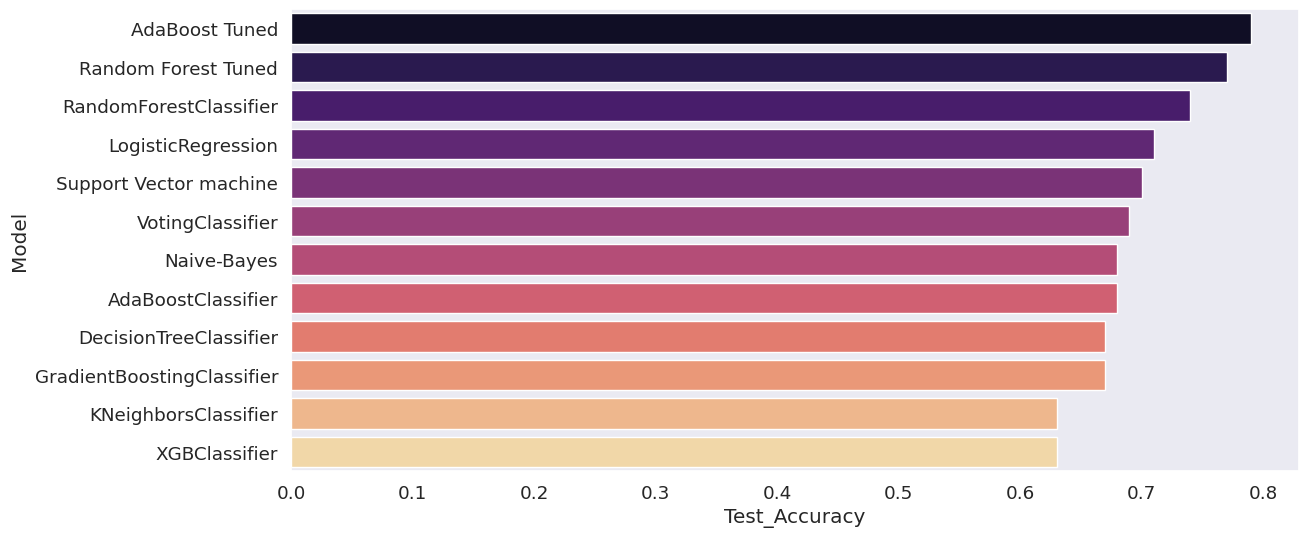

In [143]:
#test accuracy barplot
plt.figure(figsize=(13,6))
sns.barplot(data=conclusion_dataframe.sort_values(by=['Test_Accuracy'],ascending=False),y='Model',x='Test_Accuracy',palette='magma')
plt.show()

**Observation:**
*    **Adaboost tuned classifier has highest accuracy following ,random forest tuned,random forest and logistic regression.**

### **Test Recall Plot**

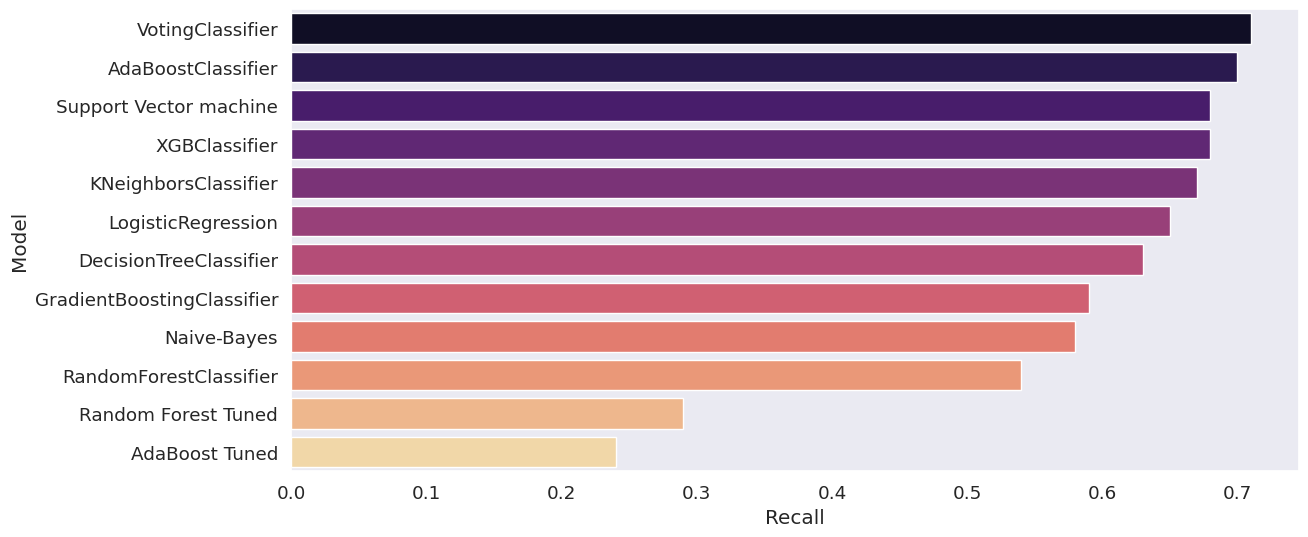

In [144]:
#test recall barplot
plt.figure(figsize=(13,6))
sns.barplot(data=conclusion_dataframe.sort_values(by='Recall',ascending=False),y='Model',x='Recall',palette='magma')
plt.show()

**Observation:**
*   **votingclassifier has highest test recall following Adaboost, support vecor machine and XGB classifier.**

### **F1-Score Plot**

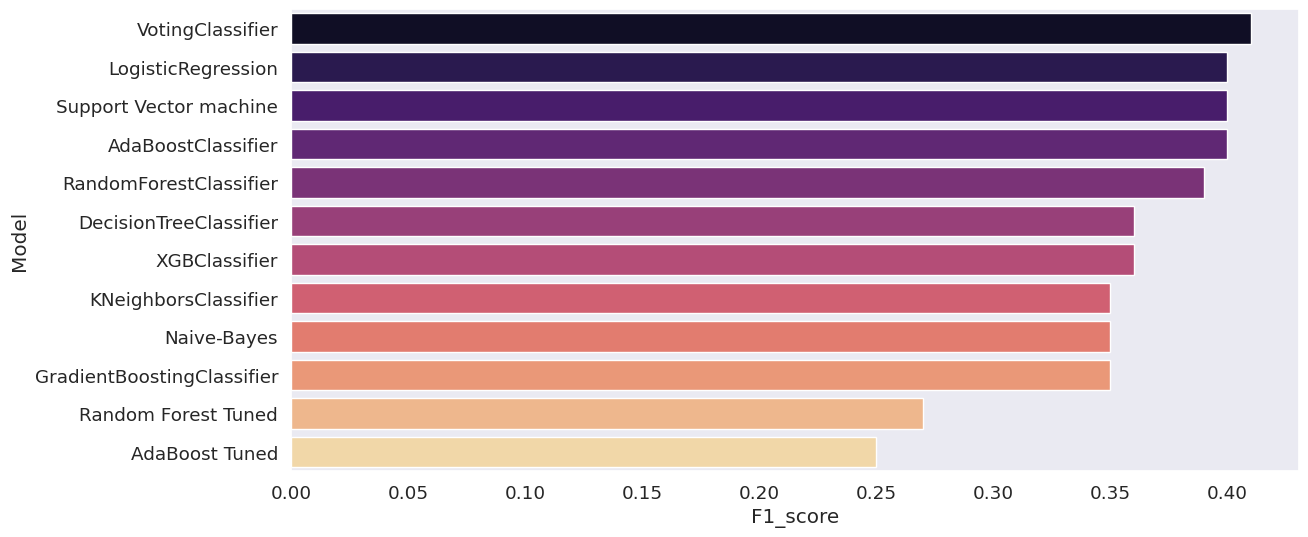

In [145]:
#plotting barplot of f1-score
plt.figure(figsize=(13,6))
sns.barplot(data=conclusion_dataframe.sort_values(by='F1_score',ascending=False),y='Model',x='F1_score',palette='magma')
plt.show()

**Observation:**
*    **Votingclassifier has highest test F1-score following Logistic regression classifier,support vector machine and Adaboost classifier.**

### **Test ROC_AUC plot**

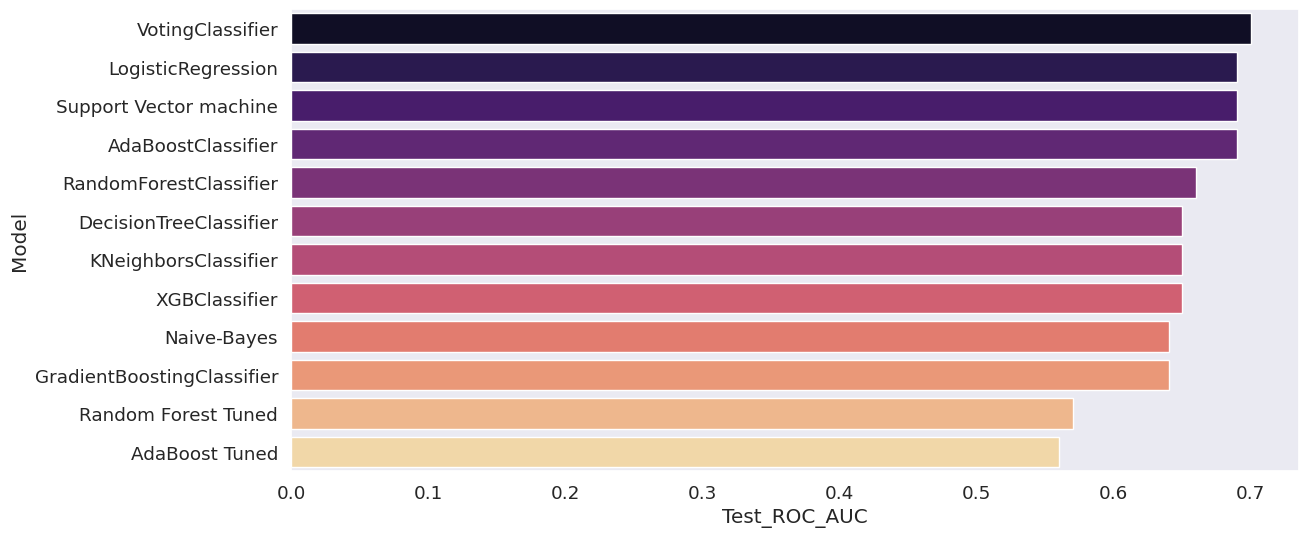

In [146]:
#plotting ROC_AUC plot
plt.figure(figsize=(13,6))
sns.barplot(data=conclusion_dataframe.sort_values(by='Test_ROC_AUC',ascending=False),y='Model',x='Test_ROC_AUC',palette='magma')
plt.show()

**Observation:**
*   **Votingclassifier has highest test ROC_AUC following Logistic regression classifier,support vector machine,Adaboost Classifier and random Forest Classifier.**

## **Model Interpretation**

In [147]:
! pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 6.7 MB/s eta 0:00:00


In [148]:
#importing shap
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [150]:
def voting_classifier(X):
    return voting_new.predict(X)

# Create a SHAP explainer for the custom wrapper function and your X_test data
explainer = shap.Explainer(voting_classifier, X_test)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)


Permutation explainer: 679it [23:01,  2.04s/it]


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


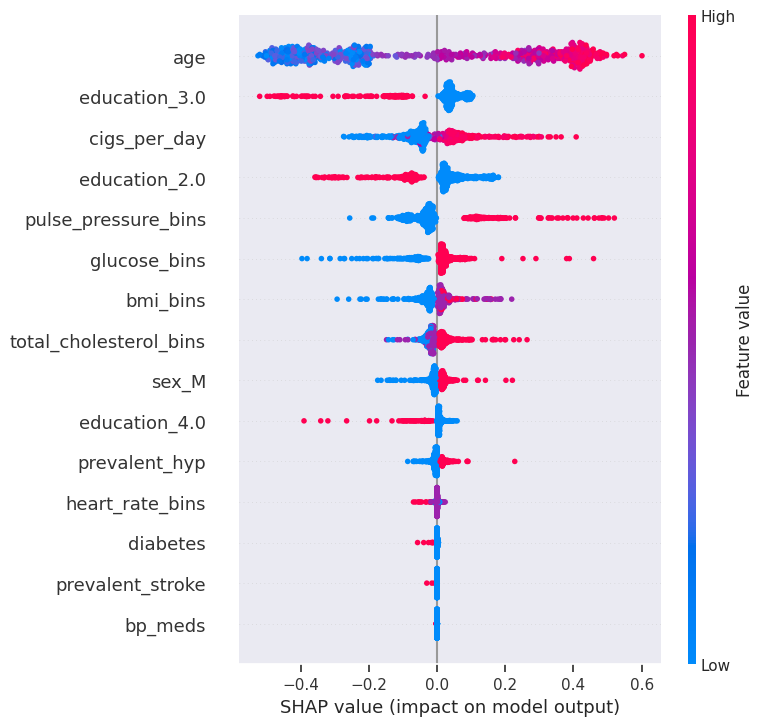

In [153]:
shap.summary_plot(shap_values,X_test)

**conclusion:**
*   **the most important features are age,education 3.0,cigs_per_day,education 2.0,pulse pressure,glucose,BMI,Total cholesterol,sex_M and education 4.0.**
*   **Prevalent_hype,heart rate,diabetes,prevalent stroke and bp_meds are very less important features.**
*   **Higher value of age has postive impact on model output.**
*   **Higher values of cig_per_day,pulse pressure,glucose,total cholesterol has postive ,sex_M and prevelant_hyp impact on model output.**
*   **Lower value of all category education has postive impact on model output.**

# **Conclusion**

*   **In this cardiovascular risk prediction project, we applied a 10 machine learning approach to classify patients into  two different cardiovascular risk categories, considering the critical healthcare problem of imbalanced data.**

*   **Our primary focus was on maximizing recall, a crucial metric in healthcare, to minimize false negatives and ensure that individuals at risk of cardiovascular diseases are accurately identified.**

*   **Among the ten supervised machine learning classification algorithms evaluated, the Voting Classifier emerged as the top-performing model for our specific problem. It achieved an impressive recall of 0.71 and a test ROC-AUC of 0.70. This indicates its ability to effectively identify individuals at risk of cardio.The Adaboost classifier also demonstrated strong performance with a recall of 0.70 and a test ROC-AUC of 0.69. This algorithm's simplicity and effectiveness make it a noteworthy choice, particularly for scenarios where computational efficiency is a priority.vascular diseases, making it a valuable tool for healthcare practitioners.**

*   **Addressing the class imbalance in our dataset was crucial for model performance. We employed the Synthetic Minority Over-sampling Technique (SMOTE) to generate synthetic samples of the minority class, enhancing the classifier's ability to recognize individuals at higher risk. This strategy significantly contributed to the improved recall scores achieved by both the Voting Classifier and Adaboost classifier.**